In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Dataset: UCI Heart Failure Clinical Records

In [ ]:
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/df.csv"

# Load the DataFrame
df = pd.read_csv(load_path)

# Preview
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define x and y
x = df.drop(['death_event'], axis=1)
y = df['death_event']

# 80-20 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Load the DataFrame
x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/x_train_updated.csv")
y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/y_train_updated.csv")
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/x_test_cleaned.csv")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/y_test_cleaned.csv")

In [ ]:
# Data
x_train.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  58.0        1                       400         0                 40   
1  53.0        0                        63         1                 60   
2  75.0        0                       582         0                 20   
3  64.0        0                       143         0                 25   
4  45.0        0                       582         0                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   164000.0               1.0           139    0   
1                    0   368000.0               0.8           135    1   
2                    1   265000.0               1.9           130    1   
3                    0   246000.0               2.4           135    1   
4                    1   126000.0               1.6           135    1   

   smoking  time  
0        0    91  
1        0    22  
2        0     4  
3        0   214  
4        0   180

In [ ]:
y_train.head()

death_event
0            0
1            0
2            1
3            0
4            1

In [ ]:
# Train Shape
x_train.shape

(249, 12)

In [ ]:
# Train Label Shape
y_train.shape

(249, 1)

In [ ]:
# Train Count
print(y_train.value_counts())

death_event
0              162
1               87
Name: count, dtype: int64


In [ ]:
# Test shape
x_test.shape

(50, 12)

In [ ]:
# Test Label shape
y_test.shape

(50, 1)

In [ ]:
# Test Count
print(y_test.value_counts())

death_event
0              41
1               9
Name: count, dtype: int64


# Synthetic Data Generation Methods

### CTGAN for Synthetic Data Generation

### TVAE (Tabular Variational Autoencoder)

### Gaussian Copula (via SDV's CopulaGAN)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

# Ensure y_train is a 1D array (if it's a DataFrame, extract the column)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure the shape of y_train is correct
print("Shape of y_train:", y_train.shape)

# Define categorical features
categorical_features = [1, 3, 5, 9, 10]  # For Heart Failure Clinical Records

# Convert x_train to NumPy array if needed
if isinstance(x_train, pd.DataFrame):
    x_train_array = x_train.values
else:
    x_train_array = x_train

# Print original distribution
print("Before SMOTE-NC:", Counter(y_train))

# Get class counts
counter = Counter(y_train)
class_0_count = counter[0]
class_1_target = class_0_count + 200

# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy={1: class_1_target}, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x_train_array, y_train)

# Convert back to DataFrame
x_resampled_df = pd.DataFrame(x_resampled, columns=x_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# Print new class distribution
print("After SMOTE-NC:", Counter(y_resampled))

# Separate synthetic samples
num_original_samples = len(x_train_array)
synthetic_x_train = x_resampled_df.iloc[num_original_samples:].reset_index(drop=True)
synthetic_y_train = y_resampled_df.iloc[num_original_samples:].reset_index(drop=True)

Shape of y_train: (249,)
Before SMOTE-NC: Counter({np.int64(0): 162, np.int64(1): 87})
After SMOTE-NC: Counter({np.int64(1): 362, np.int64(0): 162})


In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/synthetic_y_train.csv"

# Save to CSV
synthetic_y_train.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/synthetic_y_train.csv


In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/x_resampled_df.csv")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/y_resampled_df.csv")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/synthetic_x_train.csv")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/synthetic_y_train.csv")

In [ ]:
synthetic_x_train.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  43.492148      1.0                224.073927       0.0          15.932593   
1  78.776746      1.0                165.696411       0.0          38.489302   
2  72.090733      0.0                115.226966       0.0          32.954465   
3  74.836535      0.0               1981.261969       0.0          28.224356   
4  67.950237      1.0                218.473920       1.0          34.917061   

   high_blood_pressure      platelets  serum_creatinine  serum_sodium  sex  \
0                  0.0  212440.444469          1.411911    136.186519  1.0   
1                  1.0  149163.100566          1.846992    143.592249  0.0   
2                  1.0  388409.107057          6.168054    134.227321  1.0   
3                  1.0  238934.613829          1.000000    137.420515  0.0   
4                  1.0  289132.702631          0.911611    139.933649  1.0   

   smoking       time  
0      0.0  54.181926  
1      0.0  29.075496  
2      0.0  75.866236  
3      0.0  33.378831  
4      0.0  20.000000

In [ ]:
x_resampled_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  58.0      1.0                     400.0       0.0               40.0   
1  53.0      0.0                      63.0       1.0               60.0   
2  75.0      0.0                     582.0       0.0               20.0   
3  64.0      0.0                     143.0       0.0               25.0   
4  45.0      0.0                     582.0       0.0               20.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  0.0   164000.0               1.0         139.0  0.0   
1                  0.0   368000.0               0.8         135.0  1.0   
2                  1.0   265000.0               1.9         130.0  1.0   
3                  0.0   246000.0               2.4         135.0  1.0   
4                  1.0   126000.0               1.6         135.0  1.0   

   smoking   time  
0      0.0   91.0  
1      0.0   22.0  
2      0.0    4.0  
3      0.0  214.0  
4      0.0  180.0

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
60.000000    35
50.000000    28
70.000000    26
65.000000    23
45.000000    14
             ..
79.686680     1
51.583583     1
70.226870     1
75.555096     1
79.922717     1
Name: count, Length: 300, dtype: int64

Counts for anaemia:
anaemia
0.0    287
1.0    237
Name: count, dtype: int64

Counts for creatinine_phosphokinase:
creatinine_phosphokinase
582.0     51
168.0      9
66.0       4
129.0      3
69.0       3
          ..
855.0      1
972.0      1
1202.0     1
127.0      1
1610.0     1
Name: count, Length: 434, dtype: int64

Counts for diabetes:
diabetes
0.0    326
1.0    198
Name: count, dtype: int64

Counts for ejection_fraction:
ejection_fraction
35.000000    39
38.000000    37
25.000000    35
40.000000    32
30.000000    28
             ..
19.922717     1
33.149206     1
26.277034     1
36.151786     1
43.530095     1
Name: count, Length: 273, dtype: int64

Counts for high_blood_pressure:
high_blood_pressure
0.0    335
1.0    189
Name: count, dtype: int64

In [ ]:
x_resampled_df.shape

(524, 12)

In [ ]:
y_resampled_df.head()

target
0       0
1       0
2       1
3       0
4       1

In [ ]:
y_resampled_df.shape

(524, 1)

## Pipeline

In [ ]:
# Train/Test
x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

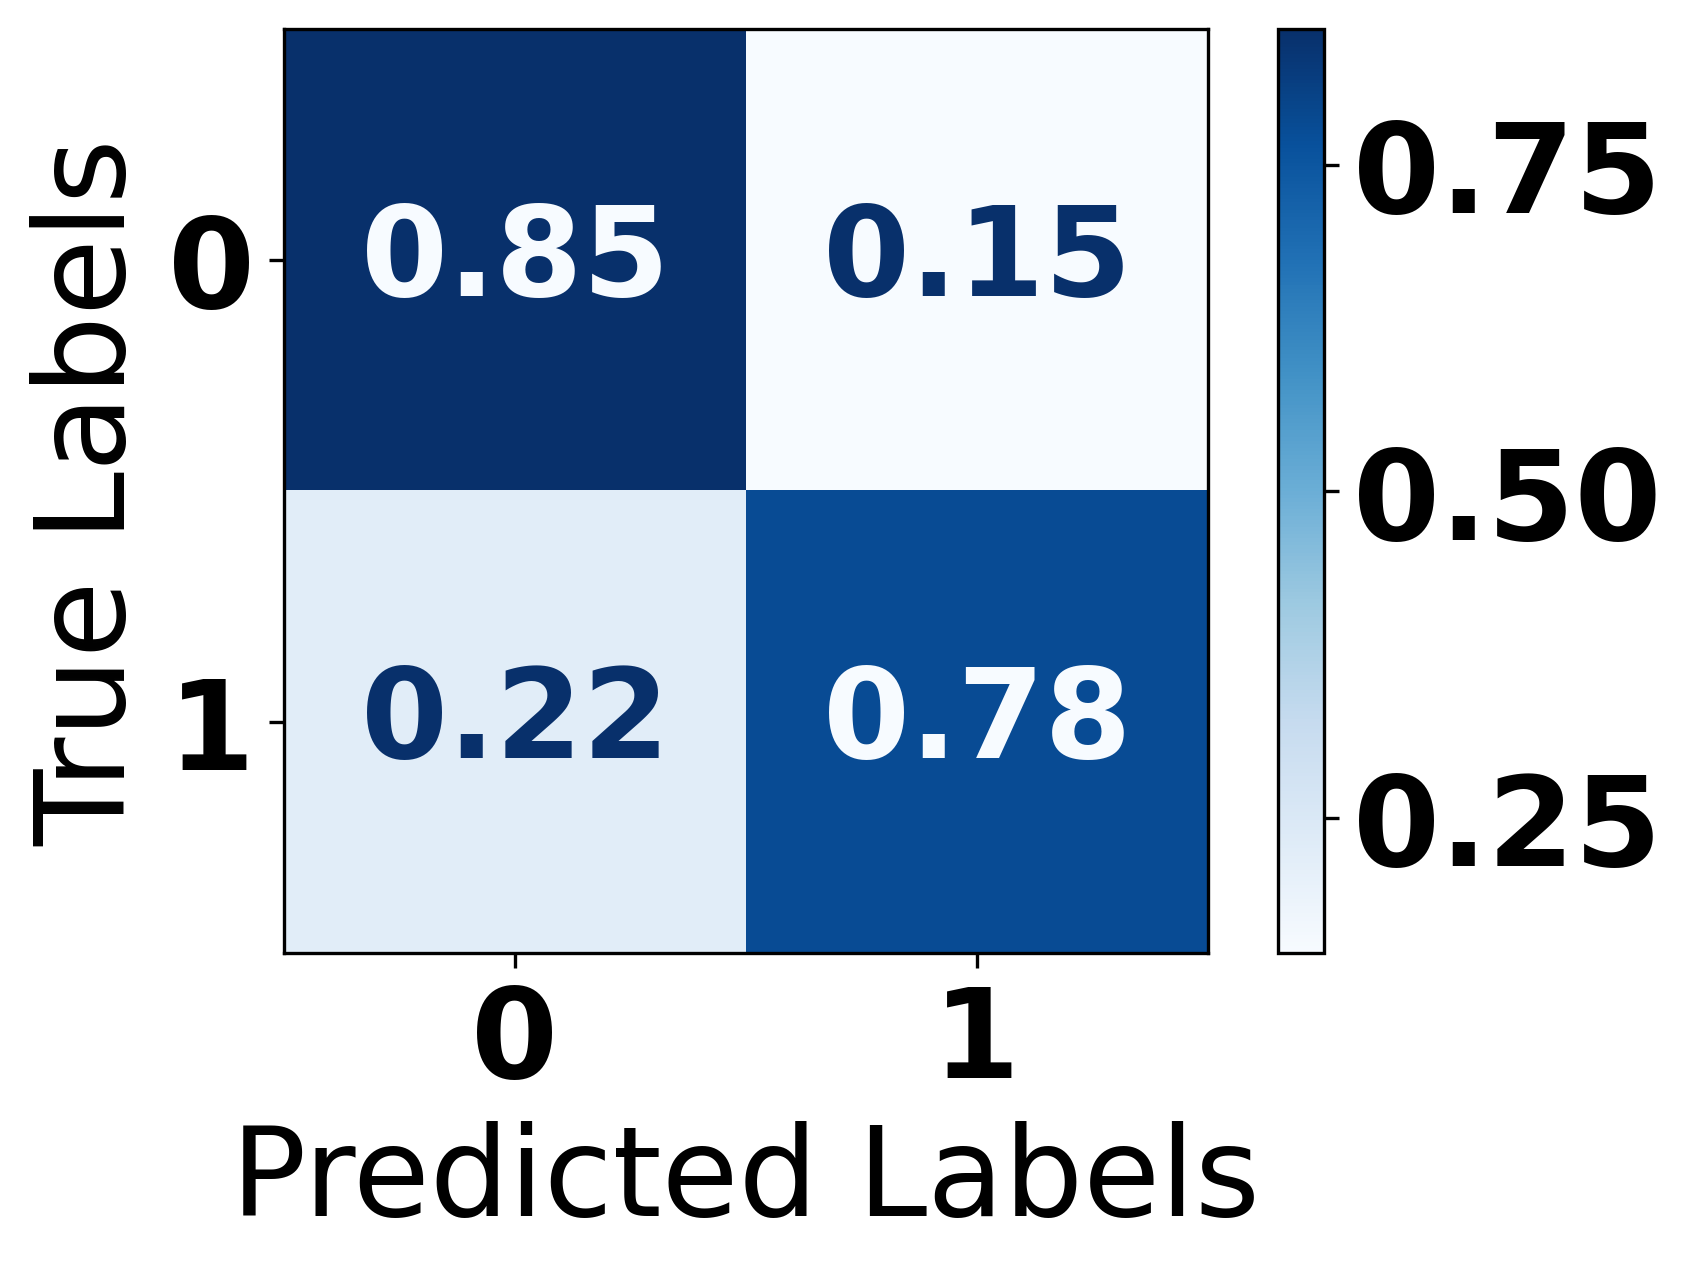

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.85      0.90        41
     Class 1       0.54      0.78      0.64         9

    accuracy                           0.84        50
   macro avg       0.74      0.82      0.77        50
weighted avg       0.87      0.84      0.85        50

Train Accuracy: 1.0
Test Accuracy: 0.84


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


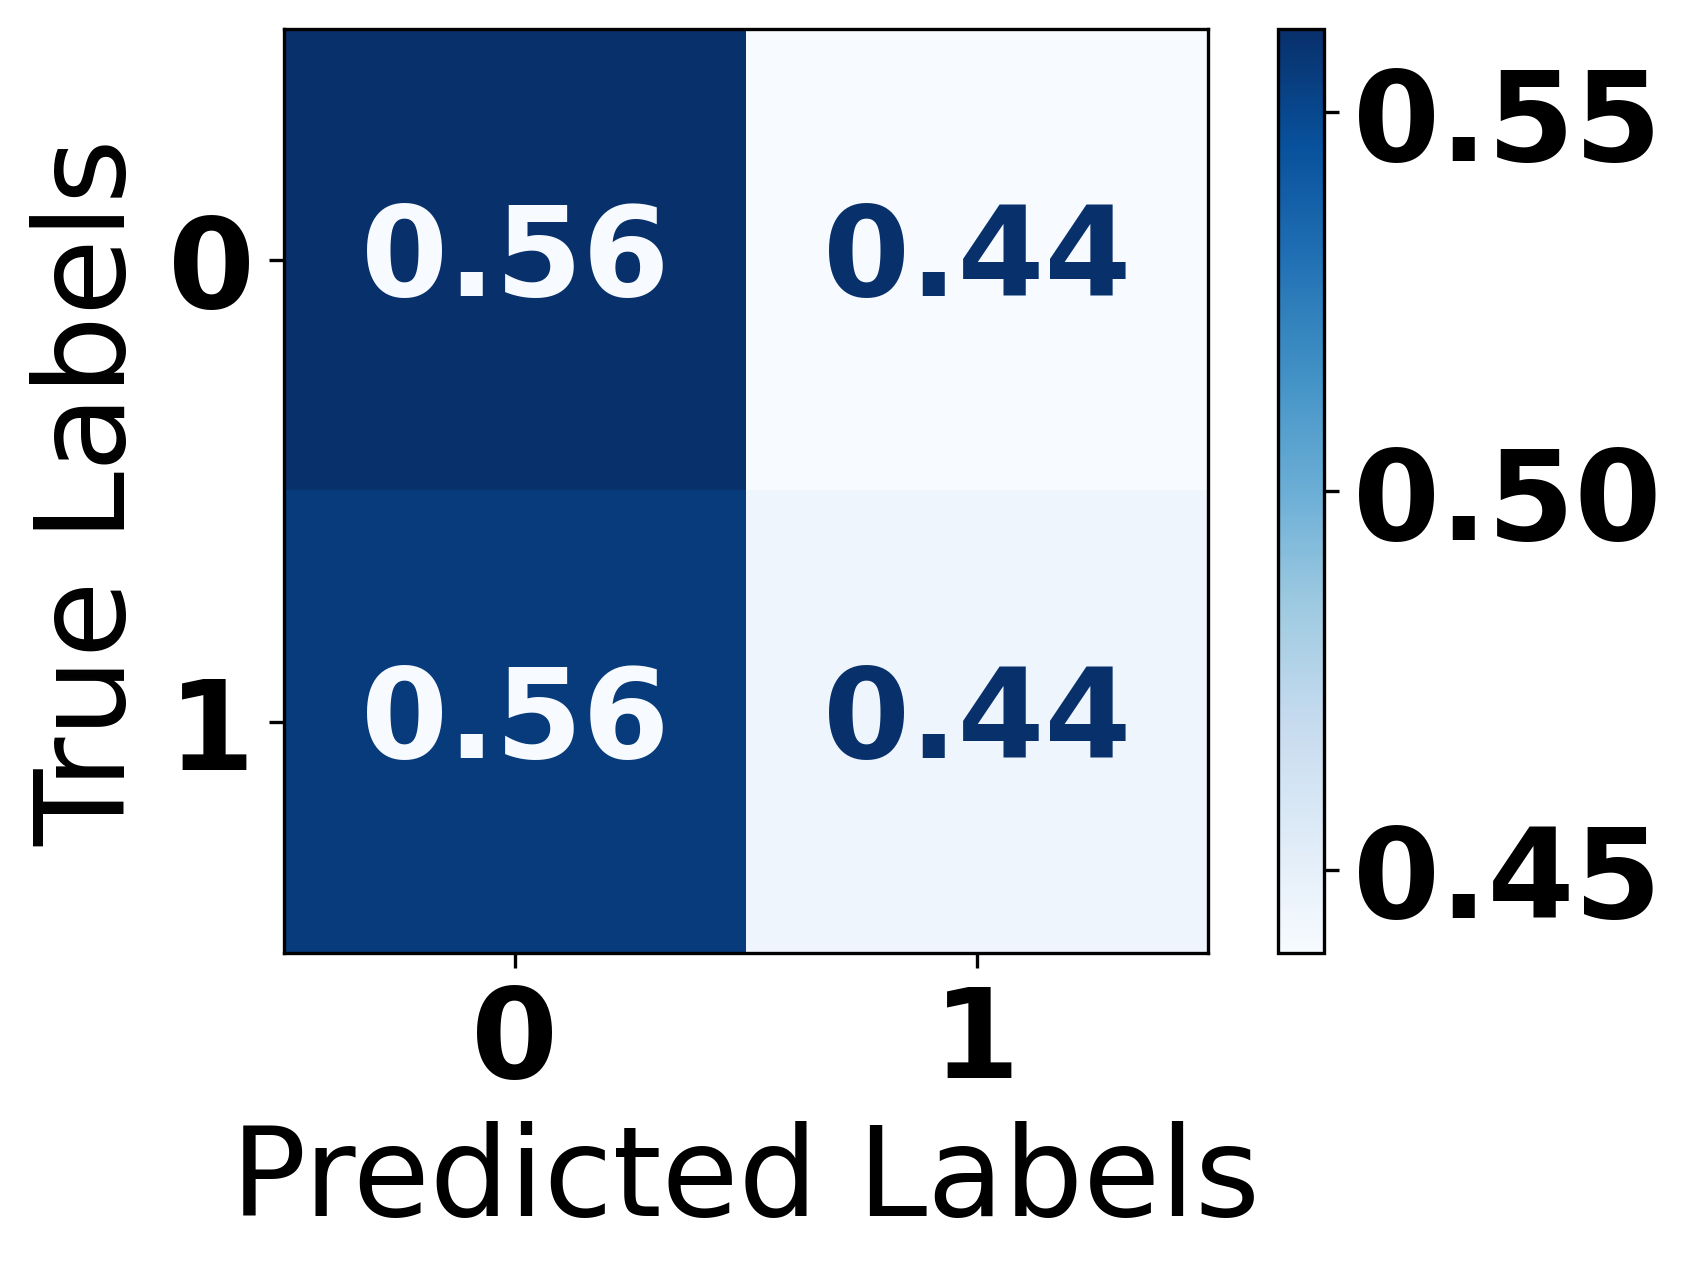

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.56      0.67        41
     Class 1       0.18      0.44      0.26         9

    accuracy                           0.54        50
   macro avg       0.50      0.50      0.46        50
weighted avg       0.71      0.54      0.59        50

Train Accuracy: 0.7519083969465649
Test Accuracy: 0.54


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


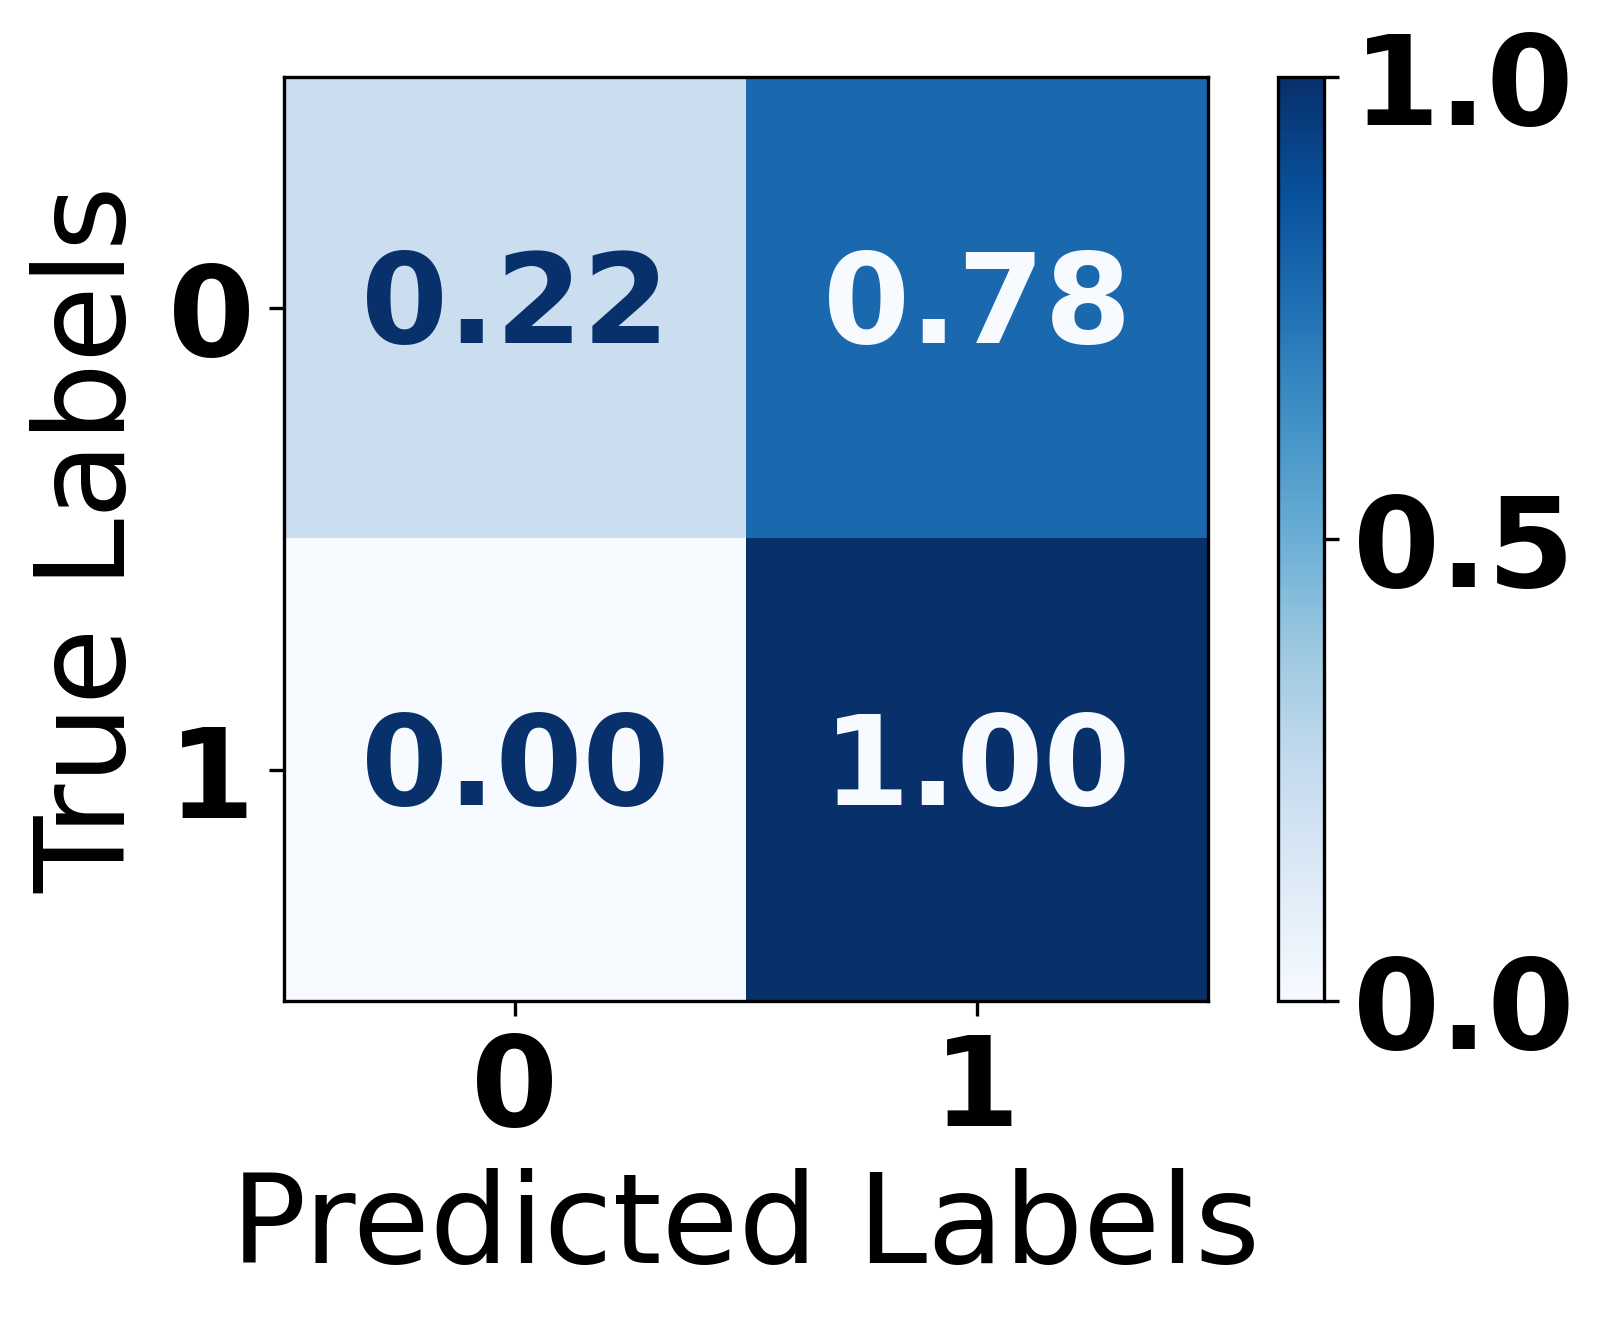

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.22      0.36        41
           1       0.22      1.00      0.36         9

    accuracy                           0.36        50
   macro avg       0.61      0.61      0.36        50
weighted avg       0.86      0.36      0.36        50

Train Accuracy: 0.7232824427480916
Test Accuracy: 0.36


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


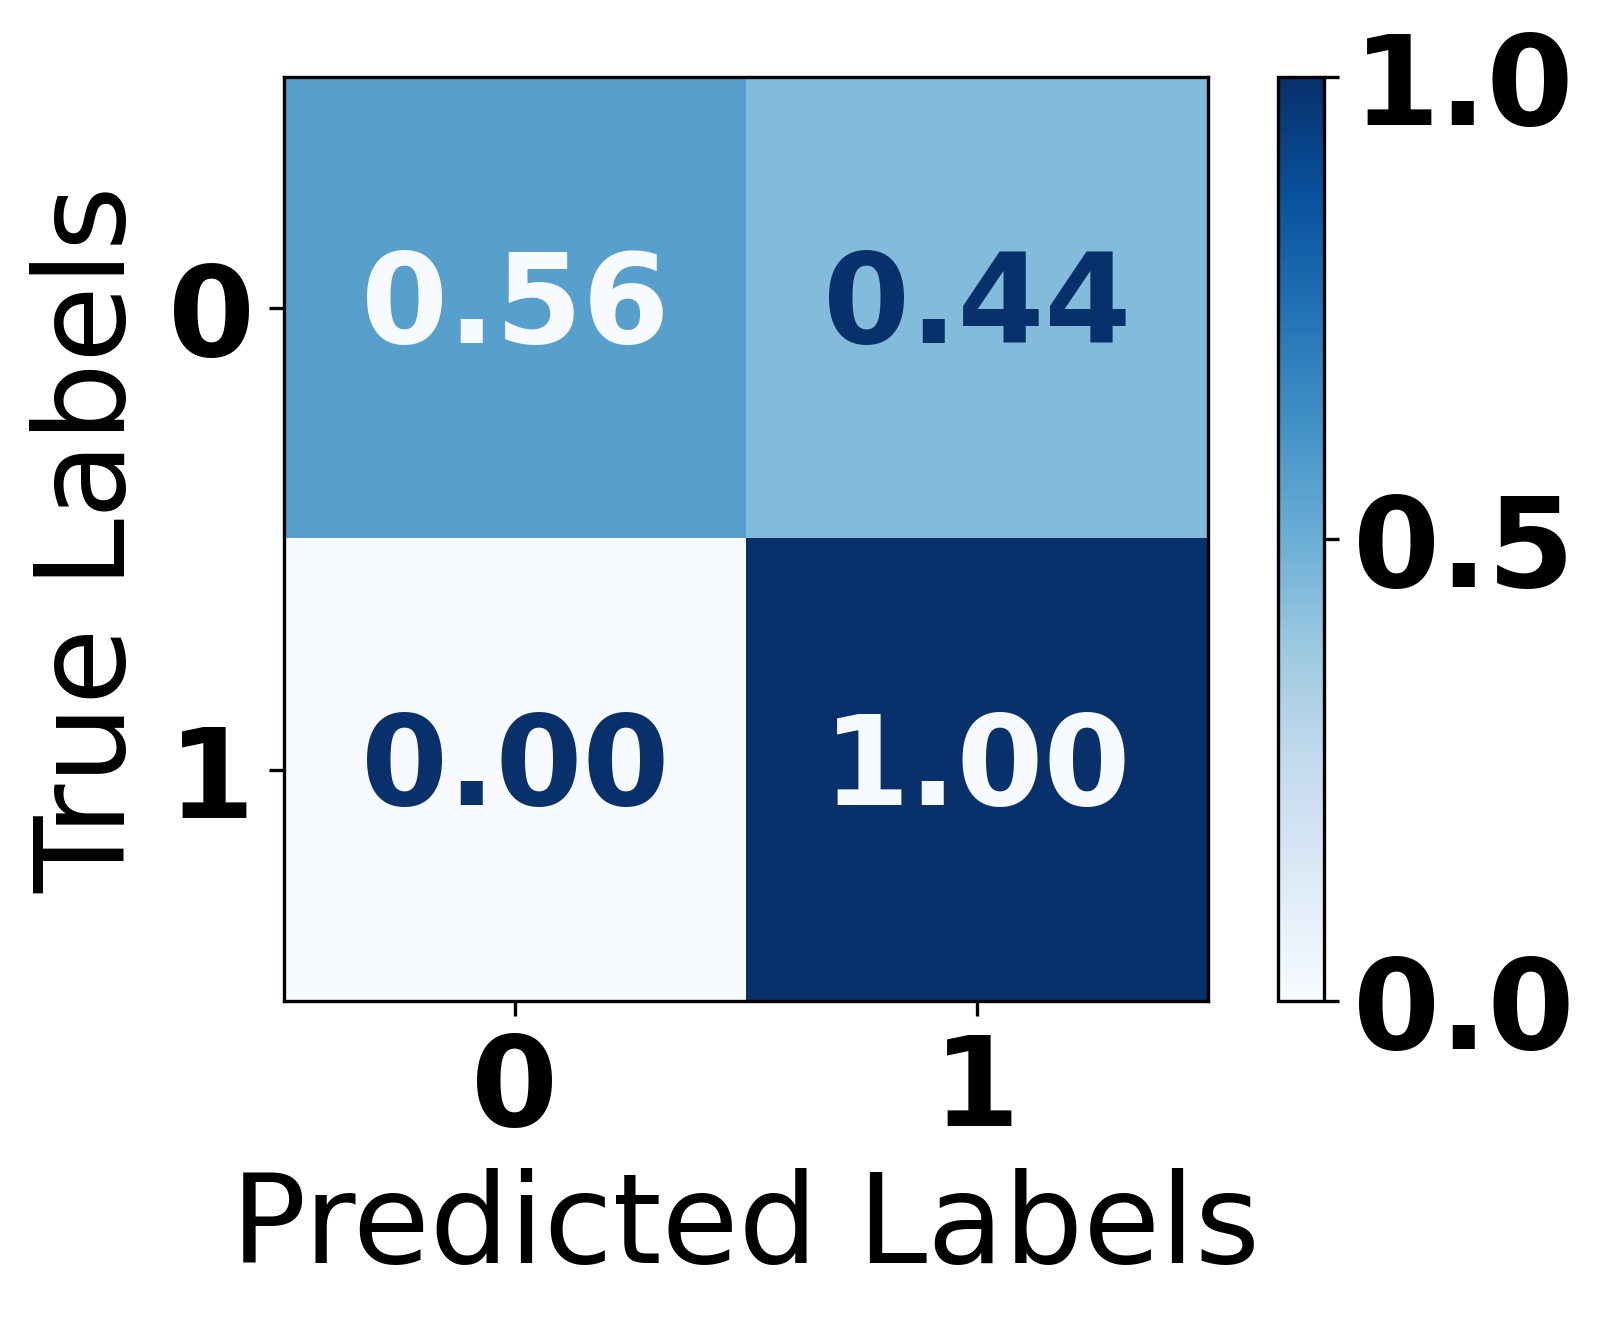

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        41
           1       0.33      1.00      0.50         9

    accuracy                           0.64        50
   macro avg       0.67      0.78      0.61        50
weighted avg       0.88      0.64      0.68        50

Train Accuracy: 0.7595419847328244
Test Accuracy: 0.64


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.0000002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


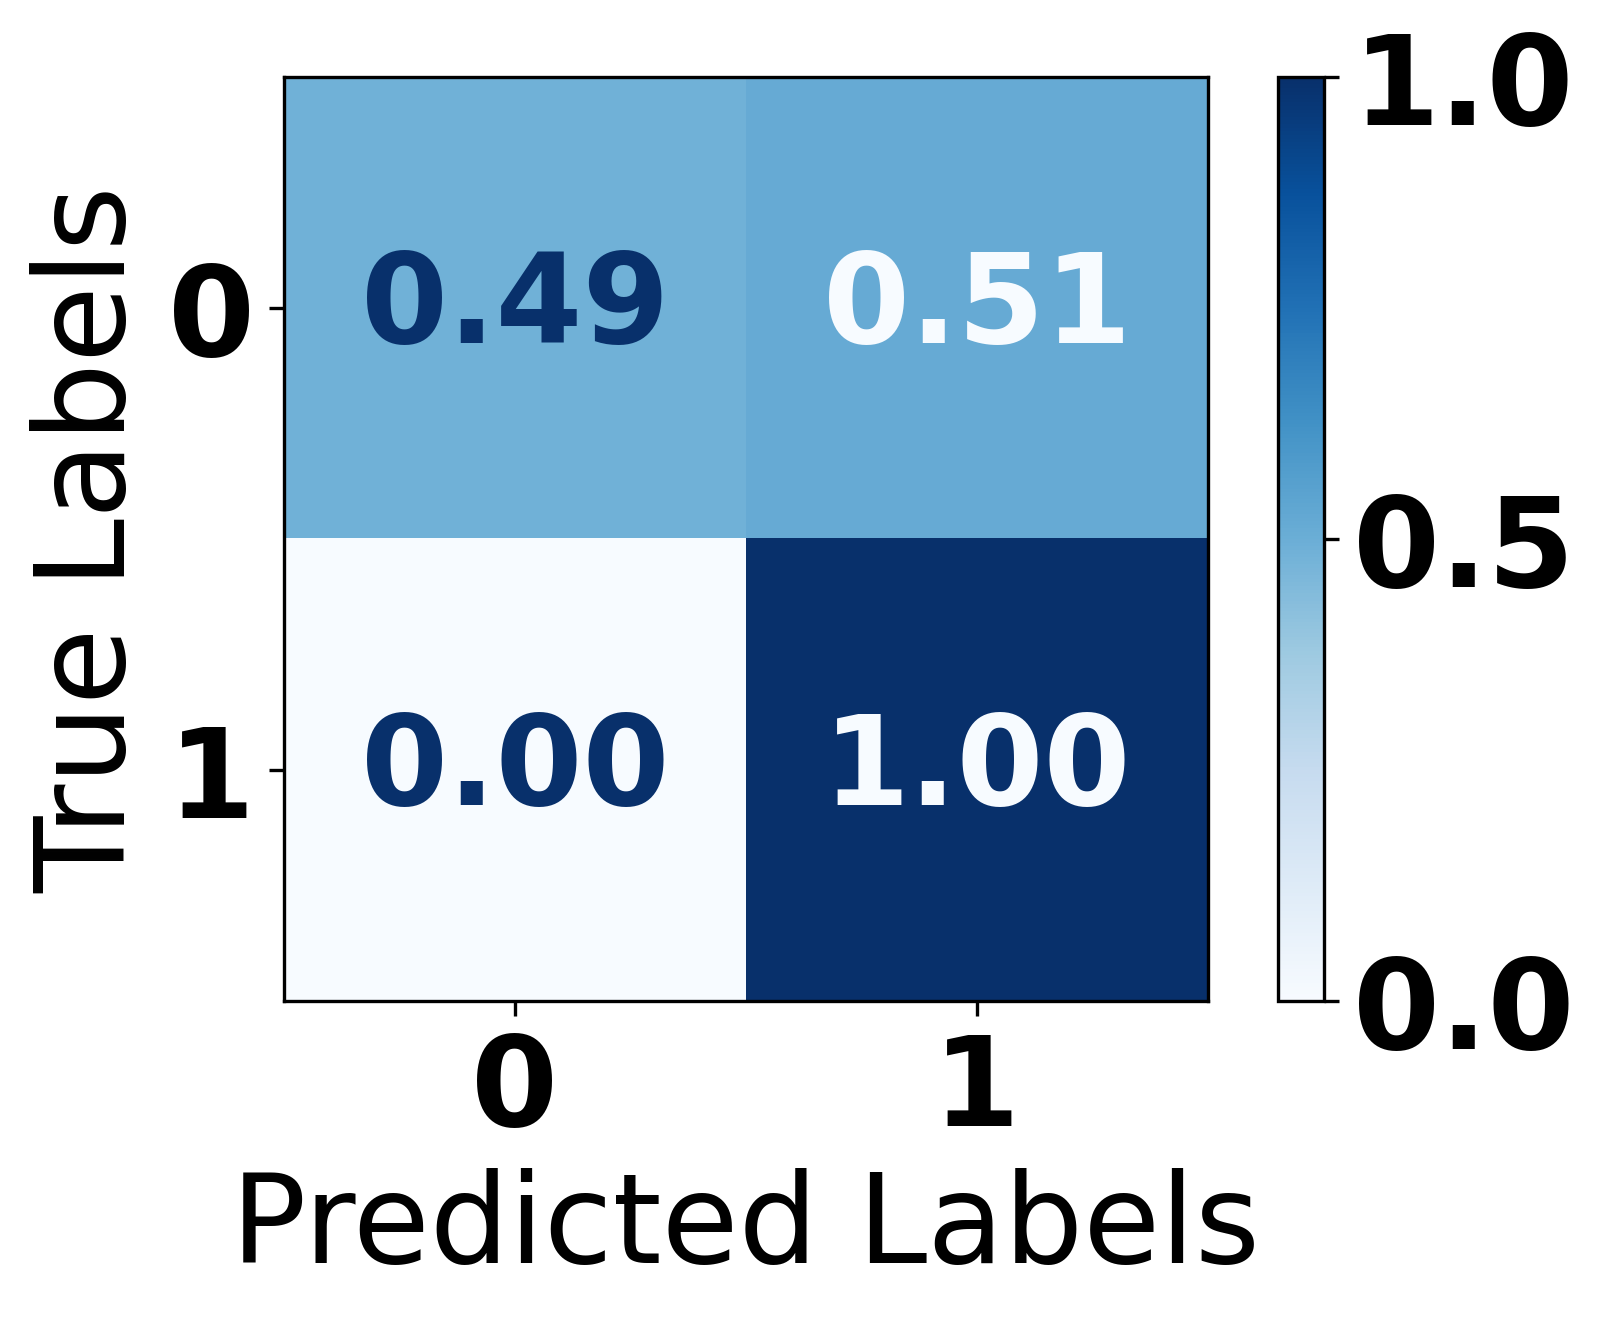

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.66        41
           1       0.30      1.00      0.46         9

    accuracy                           0.58        50
   macro avg       0.65      0.74      0.56        50
weighted avg       0.87      0.58      0.62        50

Train Accuracy: 0.8053435114503816
Test Accuracy: 0.58


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        41
     Class 1       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


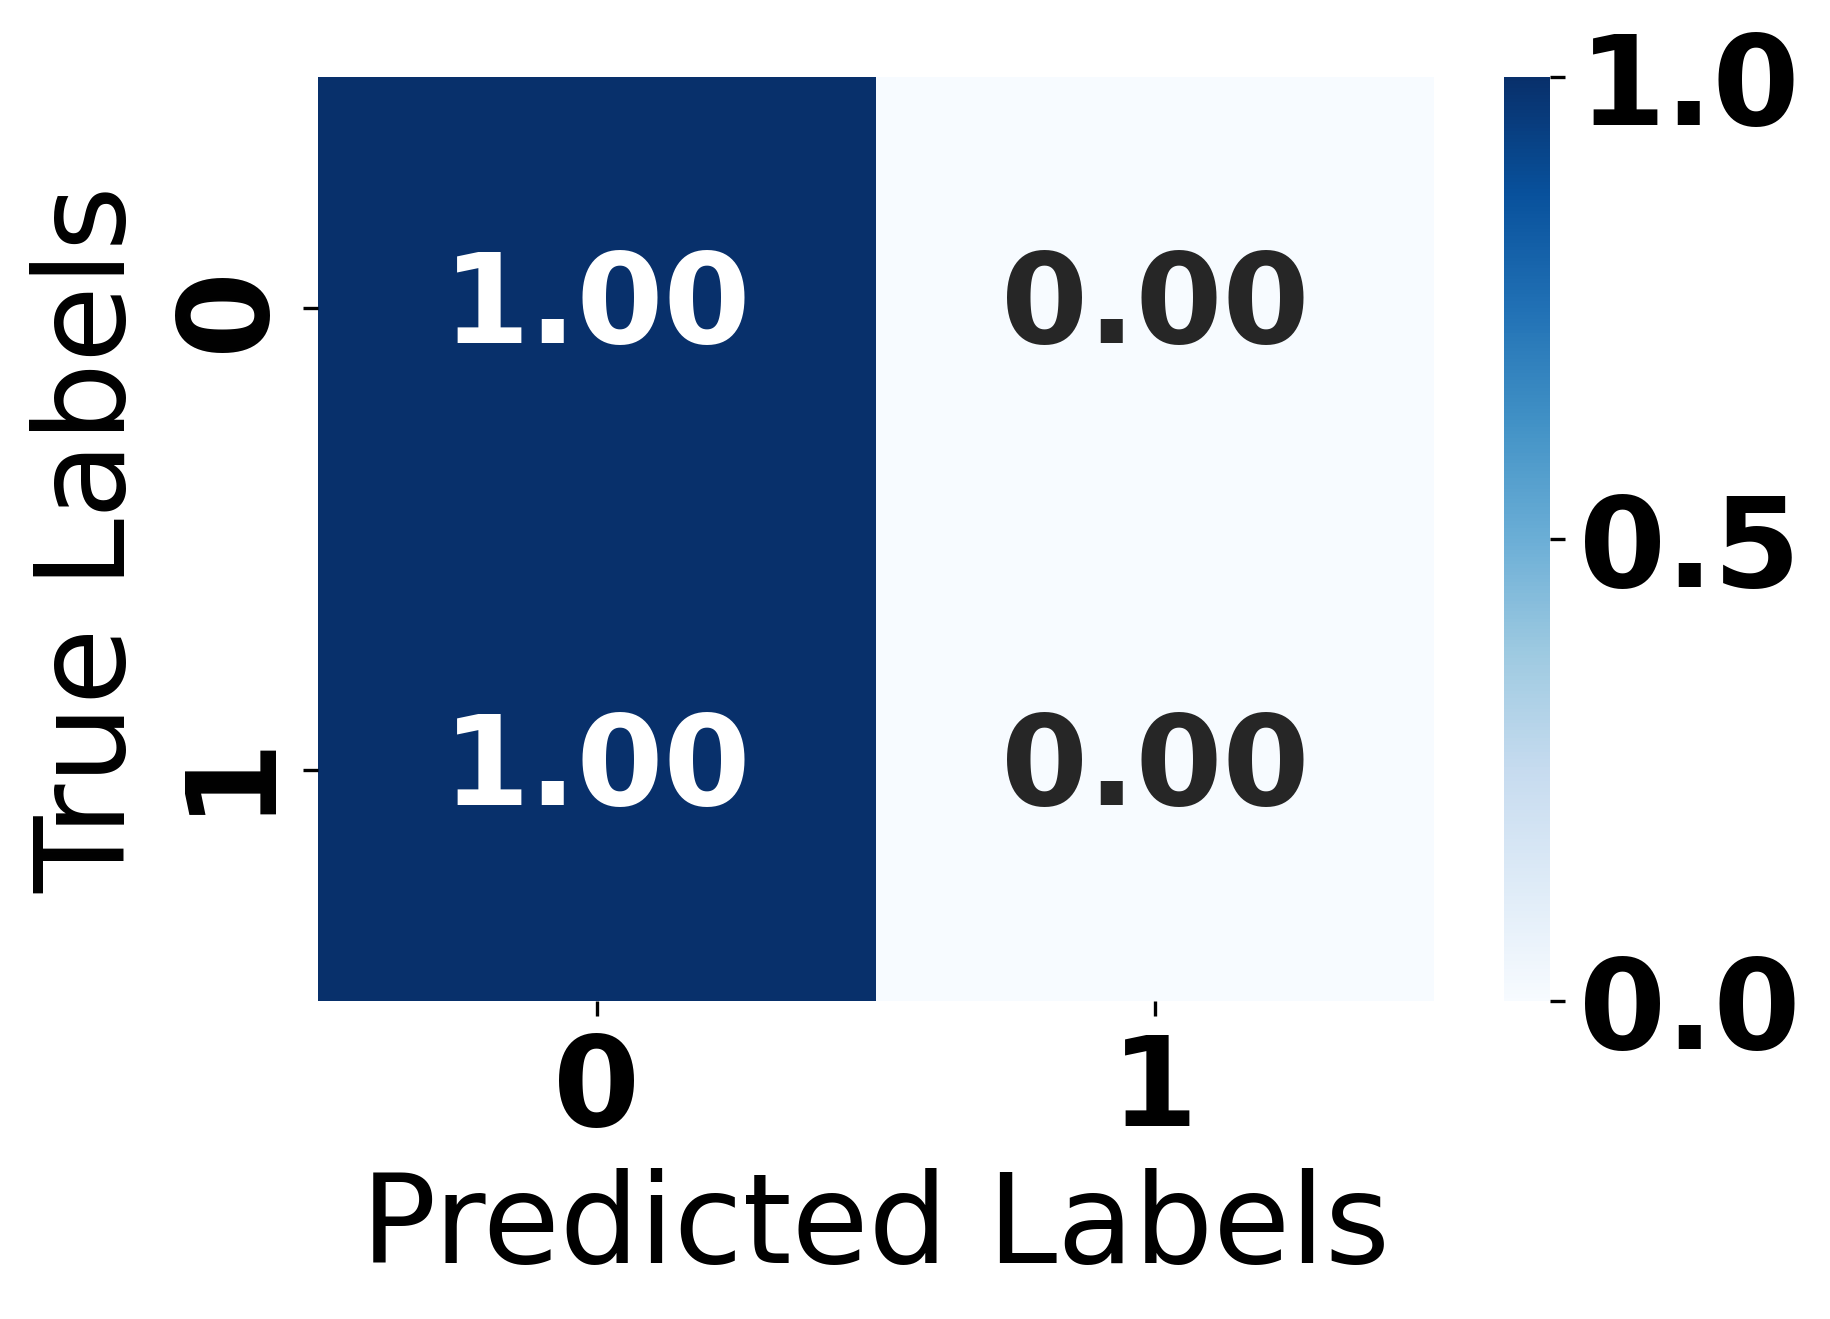

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.5724 - loss: 4810.3691 - val_accuracy: 0.1800 - val_loss: 12093.7148
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7092 - loss: 3508.9160 - val_accuracy: 0.8200 - val_loss: 569.4472
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3953 - loss: 1631.6685 - val_accuracy: 0.1800 - val_loss: 5609.1489
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6262 - loss: 1661.5781 - val_accuracy: 0.8200 - val_loss: 166.8426
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5403 - loss: 844.2021 - val_accuracy: 0.1800 - val_loss: 2698.0264
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6202 - loss: 622.5522 - val_accuracy: 0.1800 - val_loss: 341.6795
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6005 - loss: 183.2465 - val_accuracy: 0.8200 - val_loss: 283.5515
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3731 - loss: 855.0003 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        41
     Class 1       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


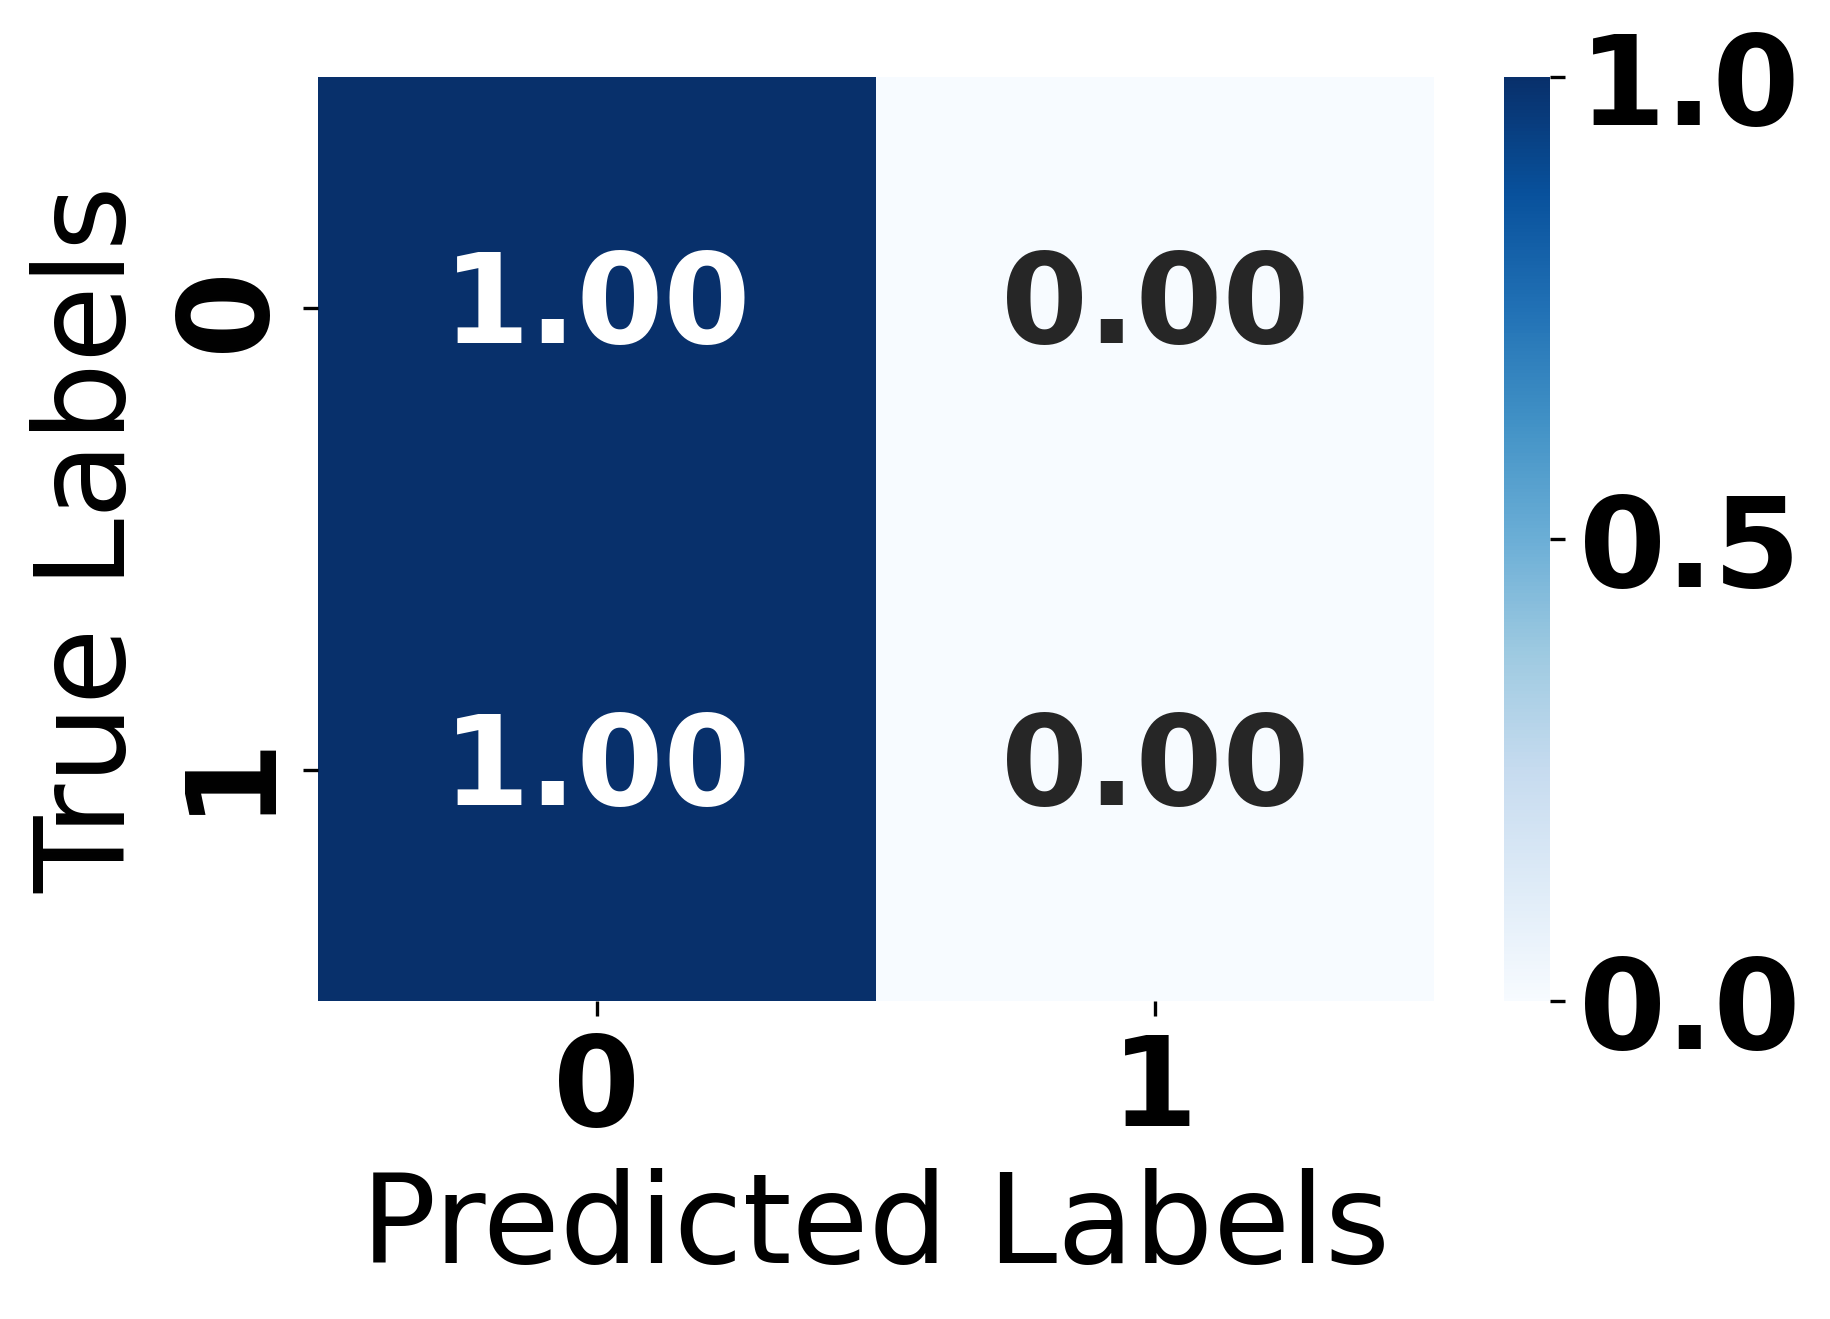

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4904 - loss: 0.8658 - val_accuracy: 0.1800 - val_loss: 2.4152
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4758 - loss: 0.8660 - val_accuracy: 0.8200 - val_loss: 0.6053
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4567 - loss: 0.8450 - val_accuracy: 0.8200 - val_loss: 0.5078
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4619 - loss: 0.8260 - val_accuracy: 0.8200 - val_loss: 0.5305
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4802 - loss: 0.7760 - val_accuracy: 0.8000 - val_loss: 0.6300
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5232 - loss: 0.7405 - val_accuracy: 0.7200 - val_loss: 0.6564
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5274 - loss: 0.7476 - val_accuracy: 0.7200 - val_loss: 0.6331
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5495 - loss: 0.7321 - val_accuracy: 0.7400 - val_loss: 0.6176

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Normalized Confusion Matrix:
[[0.2195122  0.7804878 ]
 [0.33333333 0.66666667]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.75      0.22      0.34        41
     Class 1       0.16      0.67      0.26         9

    accuracy                           0.30        50
   macro avg       0.45      0.44      0.30        50
weighted avg       0.64      0.30      0.32        50



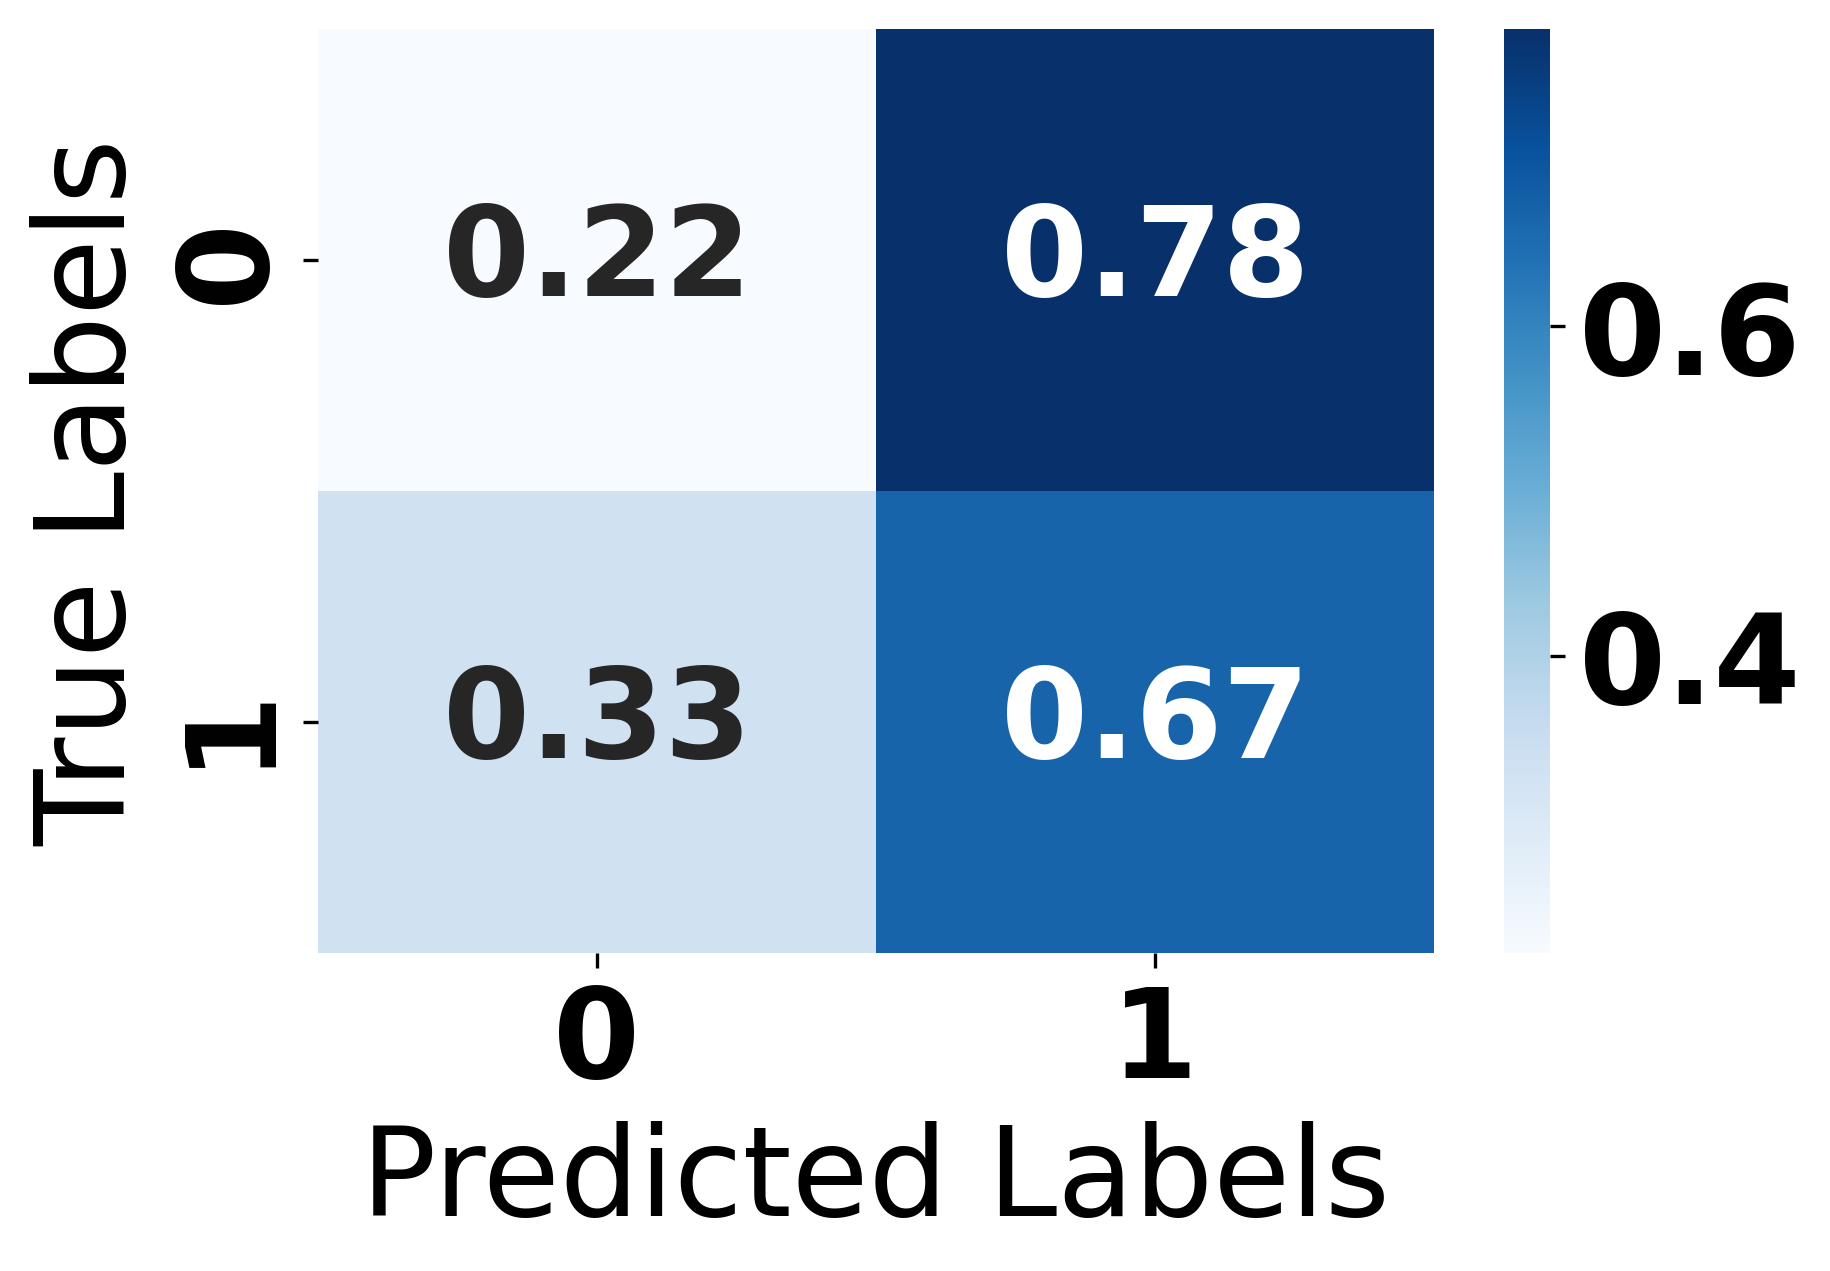

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time

# Dynamically determine input shape
input_shape = (x_train.shape[1],)  # Assuming x_train is already defined

# Dynamically determine vocab size from your data
vocab_size = int(np.max(x_train)) + 1  # Ensure embedding input covers all token indices
embed_dim = 128  # Embedding dimension
ff_dim = 128     # Feed-forward network dimension

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward block 1
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Feed-forward block 2
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model with time tracking
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time)

# Evaluate the model with time tracking
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 108800128 elements. This may consume a large amount of memory.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6376 - loss: 0.6515 - val_accuracy: 0.1800 - val_loss: 0.9444
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6903 - loss: 0.6231 - val_accuracy: 0.1800 - val_loss: 1.0204
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6714 - loss: 0.6258 - val_accuracy: 0.1800 - val_loss: 1.0243
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6820 - loss: 0.6118 - val_accuracy: 0.1800 - val_loss: 1.0222
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6950 - loss: 0.5994 - val_accuracy: 0.1800 - val_loss: 1.0376
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6950 - loss: 0.5870 - val_accuracy: 0.1800 - val_loss: 1.0540
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7069 - loss: 0.5700 - val_accuracy: 0.1800 - val_loss: 1.0711
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6935 - loss: 0.5947 - val_accuracy: 0.1800 - val_loss: 1.0404
Epoch 9/20
5/5 ━━━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Normalized Confusion Matrix:
[[0.26829268 0.73170732]
 [0.11111111 0.88888889]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.27      0.42        41
     Class 1       0.21      0.89      0.34         9

    accuracy                           0.38        50
   macro avg       0.56      0.58      0.38        50
weighted avg       0.79      0.38      0.40        50



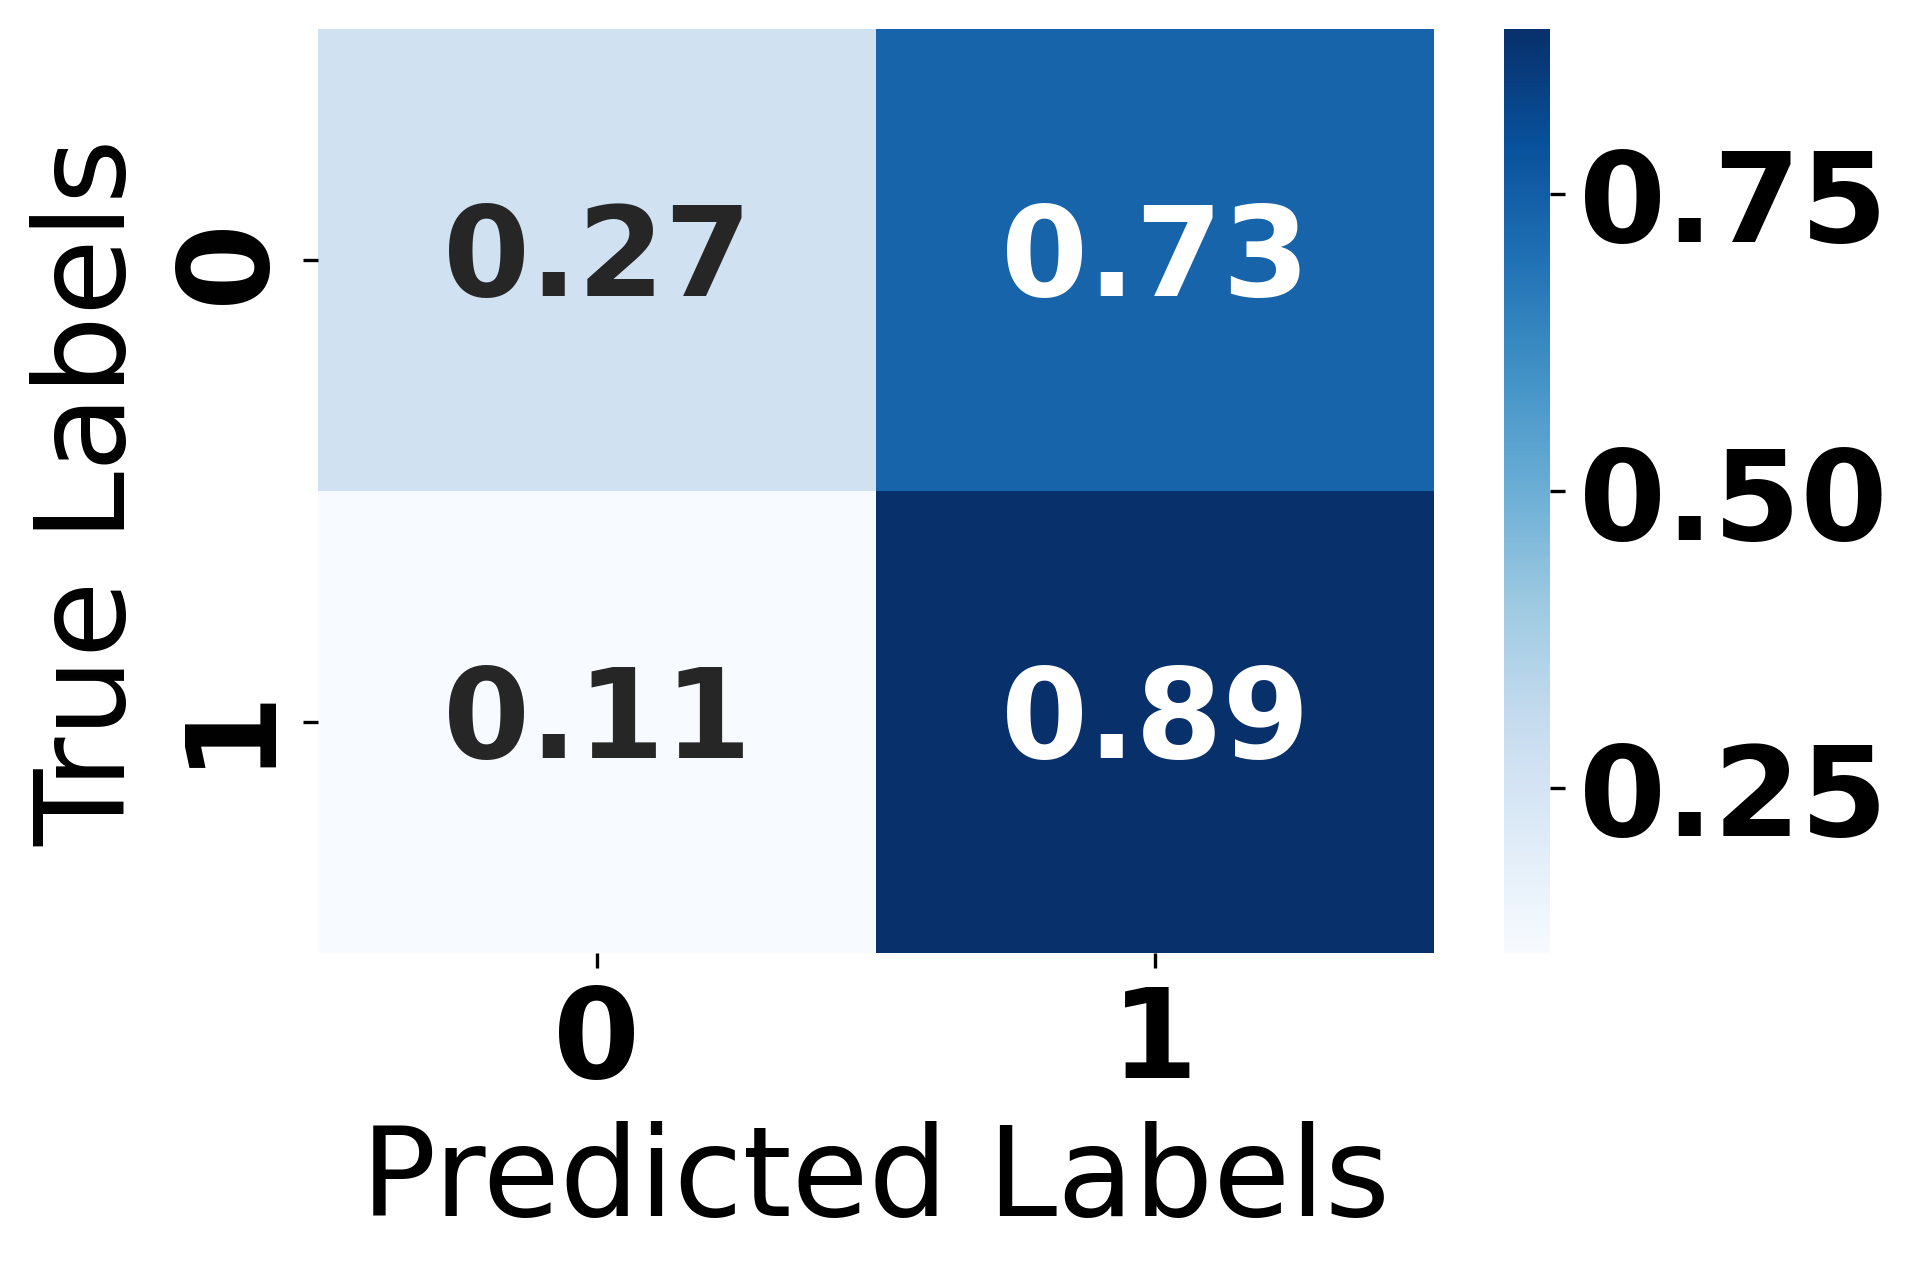

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/SMOTENC/Model/transformer_model.h5')

### GPT

In [ ]:
pip install --upgrade transformers

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sbakter48 (sbakter48-northern-university-bangladesh) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


TrainOutput(global_step=131, training_loss=0.5505777055980595, metrics={'train_runtime': 764.105, 'train_samples_per_second': 0.686, 'train_steps_per_second': 0.171, 'total_flos': 0.0, 'train_loss': 0.5505777055980595, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.8200    1.0000    0.9011        41
           1     0.0000    0.0000    0.0000         9

    accuracy                         0.8200        50
   macro avg     0.4100    0.5000    0.4505        50
weighted avg     0.6724    0.8200    0.7389        50

Confusion Matrix:
 [[41  0]
 [ 9  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### CTGAN for Synthetic Data Generation

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664

In [ ]:
!pip install sdv --upgrade

In [ ]:
!pip install sdv==0.16.0

ERROR: Ignored the following yanked versions: 1.13.0
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6,<3.9; 0.10.0.dev0 Requires-Python >=3.6,<3.9; 0.10.1 Requires-Python >=3.6,<3.9; 0.10.1.dev0 Requires-Python >=3.6,<3.9; 0.11.0 Requires-Python >=3.6,<3.9; 0.11.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0 Requires-Python >=3.6,<3.9; 0.12.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0.dev1 Requires-Python >=3.6,<3.9; 0.12.1 Requires-Python >=3.6,<3.9; 0.12.1.dev0 Requires-Python >=3.6,<3.9; 0.13.0 Requires-Python >=3.6,<3.10; 0.13.0.dev0 Requires-Python >=3.6,<3.10; 0.13.1 Requires-Python >=3.6,<3.10; 0.13.1.dev0 Requires-Python >=3.6,<3.10; 0.14.0 Requires-Python >=3.6,<3.10; 0.14.0.dev0 Requires-Python >=3.6,<3.10; 0.14.0.dev1 Requires-Python >=3.6,<3.10; 0.14.0.dev2 Requires-Python >=3.6,<3.10; 0.14.1 Requires-Python >=3.6,<3.10; 0.14.1.dev0 Requires-Python >=3.6,<3.10; 0.15.0 Requires-Python >=3.6,<3.10; 0.15.0.dev0 Requires-Python

In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 768.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

In [ ]:
from ctgan import CTGAN
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices
categorical_features = [1, 3, 5, 9, 10]  # For Heart Failure Clinical Records

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before CTGAN:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit CTGAN on minority class
ctgan = CTGAN(epochs=300)
ctgan.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = ctgan.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After CTGAN:", Counter(y_resampled_df))

Before CTGAN: Counter({np.int64(0): 162, np.int64(1): 87})
After CTGAN: Counter({1: 362, 0: 162})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
60.000000    28
50.000000    23
65.000000    23
70.000000    21
45.000000    14
             ..
81.714745     1
44.645809     1
46.886500     1
52.325415     1
87.514158     1
Name: count, Length: 319, dtype: int64

Counts for anaemia:
anaemia
0    287
1    237
Name: count, dtype: int64

Counts for creatinine_phosphokinase:
creatinine_phosphokinase
 582    36
 129     4
 66      4
 115     3
-189     3
        ..
-338     1
-426     1
-172     1
 568     1
-353     1
Name: count, Length: 413, dtype: int64

Counts for diabetes:
diabetes
0    299
1    225
Name: count, dtype: int64

Counts for ejection_fraction:
ejection_fraction
35    50
25    38
40    37
30    37
38    36
      ..
53     1
19     1
84     1
6      1
72     1
Name: count, Length: 69, dtype: int64

Counts for high_blood_pressure:
high_blood_pressure
0    303
1    221
Name: count, dtype: int64

Counts for platelets:
platelets
263358.030000    22
235000.000000     4
271000.000000     4
221000.000000     

In [ ]:
x_resampled_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  58.0        1                       400         0                 40   
1  53.0        0                        63         1                 60   
2  75.0        0                       582         0                 20   
3  64.0        0                       143         0                 25   
4  45.0        0                       582         0                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   164000.0               1.0           139    0   
1                    0   368000.0               0.8           135    1   
2                    1   265000.0               1.9           130    1   
3                    0   246000.0               2.4           135    1   
4                    1   126000.0               1.6           135    1   

   smoking  time  
0        0    91  
1        0    22  
2        0     4  
3        0   214  
4        0   180

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
60.000000    28
50.000000    23
65.000000    23
70.000000    21
45.000000    14
             ..
81.714745     1
44.645809     1
46.886500     1
52.325415     1
87.514158     1
Name: count, Length: 319, dtype: int64

Counts for anaemia:
anaemia
0    287
1    237
Name: count, dtype: int64

Counts for creatinine_phosphokinase:
creatinine_phosphokinase
 582    36
 129     4
 66      4
 115     3
-189     3
        ..
-338     1
-426     1
-172     1
 568     1
-353     1
Name: count, Length: 413, dtype: int64

Counts for diabetes:
diabetes
0    299
1    225
Name: count, dtype: int64

Counts for ejection_fraction:
ejection_fraction
35    50
25    38
40    37
30    37
38    36
      ..
53     1
19     1
84     1
6      1
72     1
Name: count, Length: 69, dtype: int64

Counts for high_blood_pressure:
high_blood_pressure
0    303
1    221
Name: count, dtype: int64

Counts for platelets:
platelets
263358.030000    22
235000.000000     4
271000.000000     4
221000.000000     

### Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/x_test_cleaned.csv")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/y_test_cleaned.csv")

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

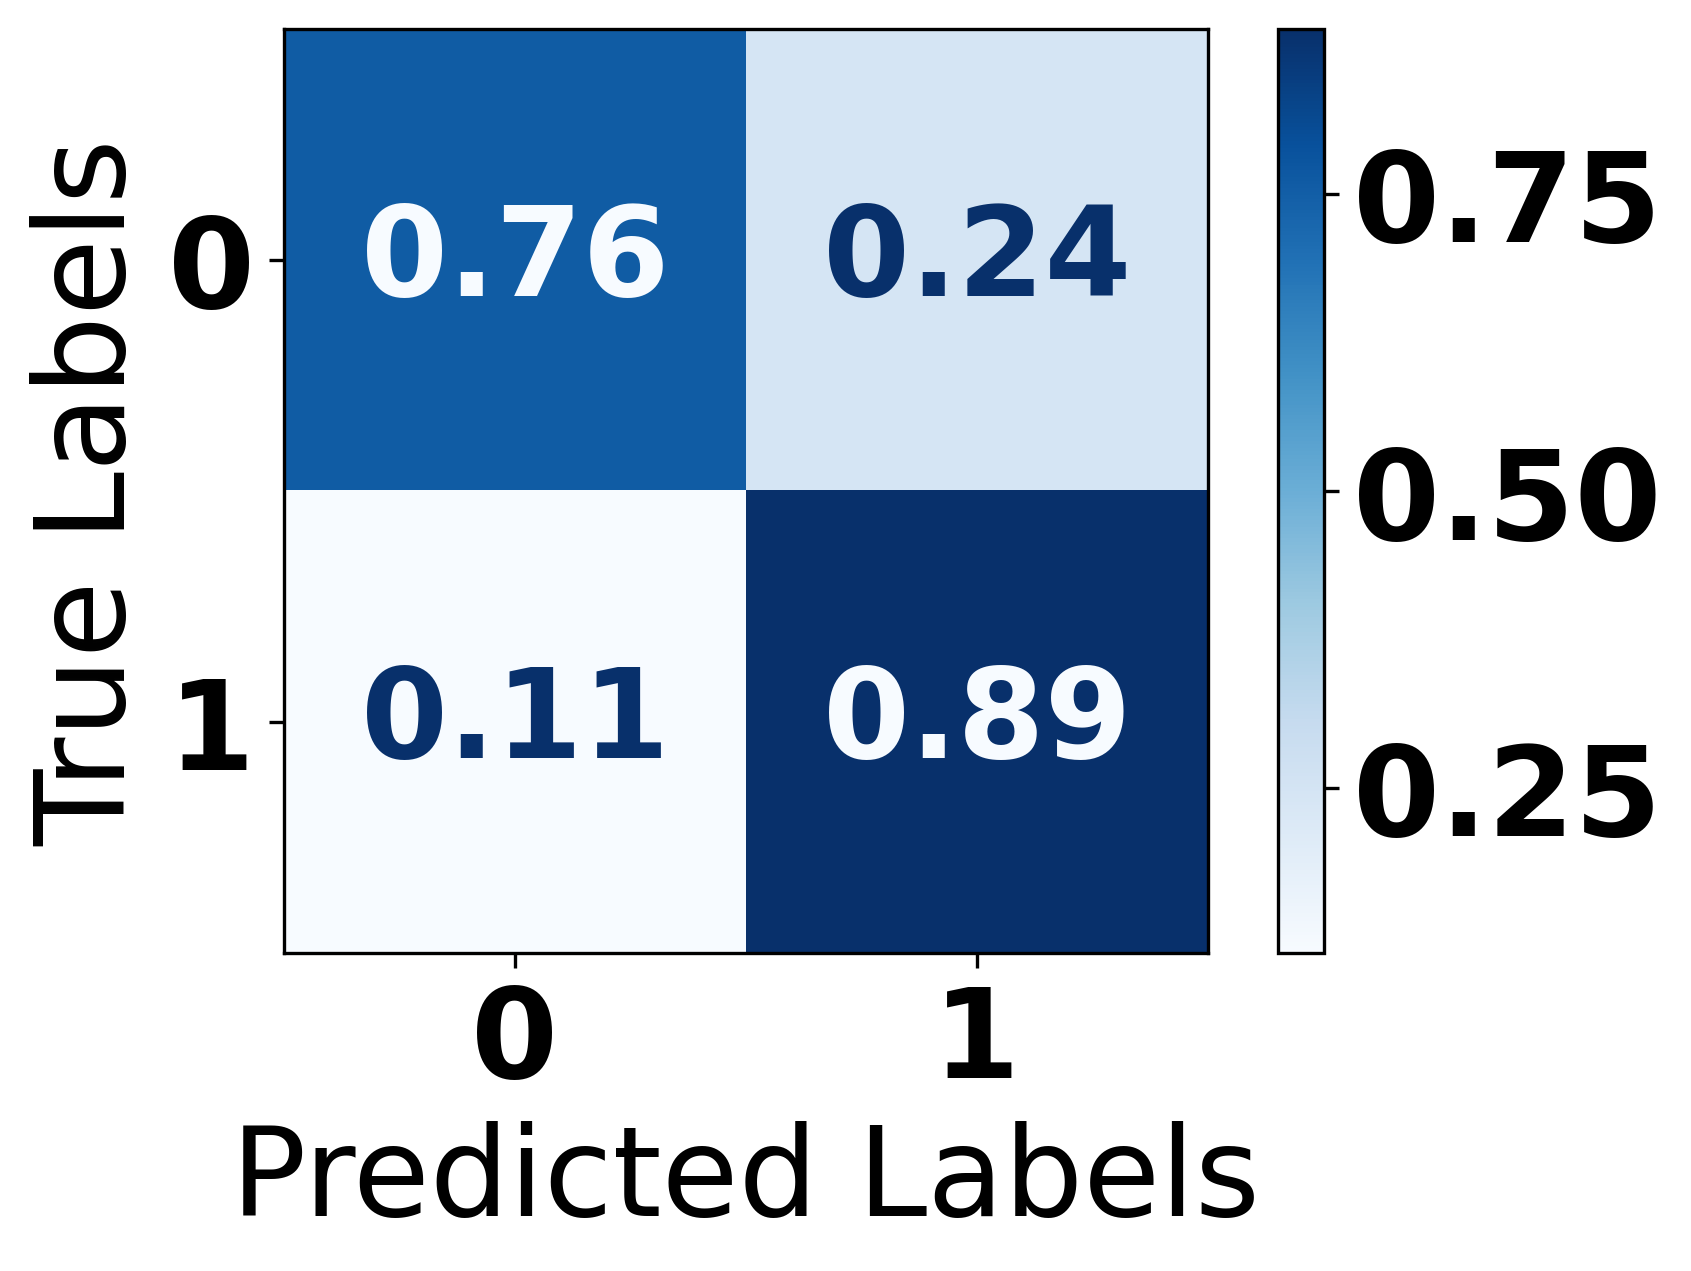

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.76      0.85        41
     Class 1       0.44      0.89      0.59         9

    accuracy                           0.78        50
   macro avg       0.71      0.82      0.72        50
weighted avg       0.87      0.78      0.80        50

Train Accuracy: 1.0
Test Accuracy: 0.78


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


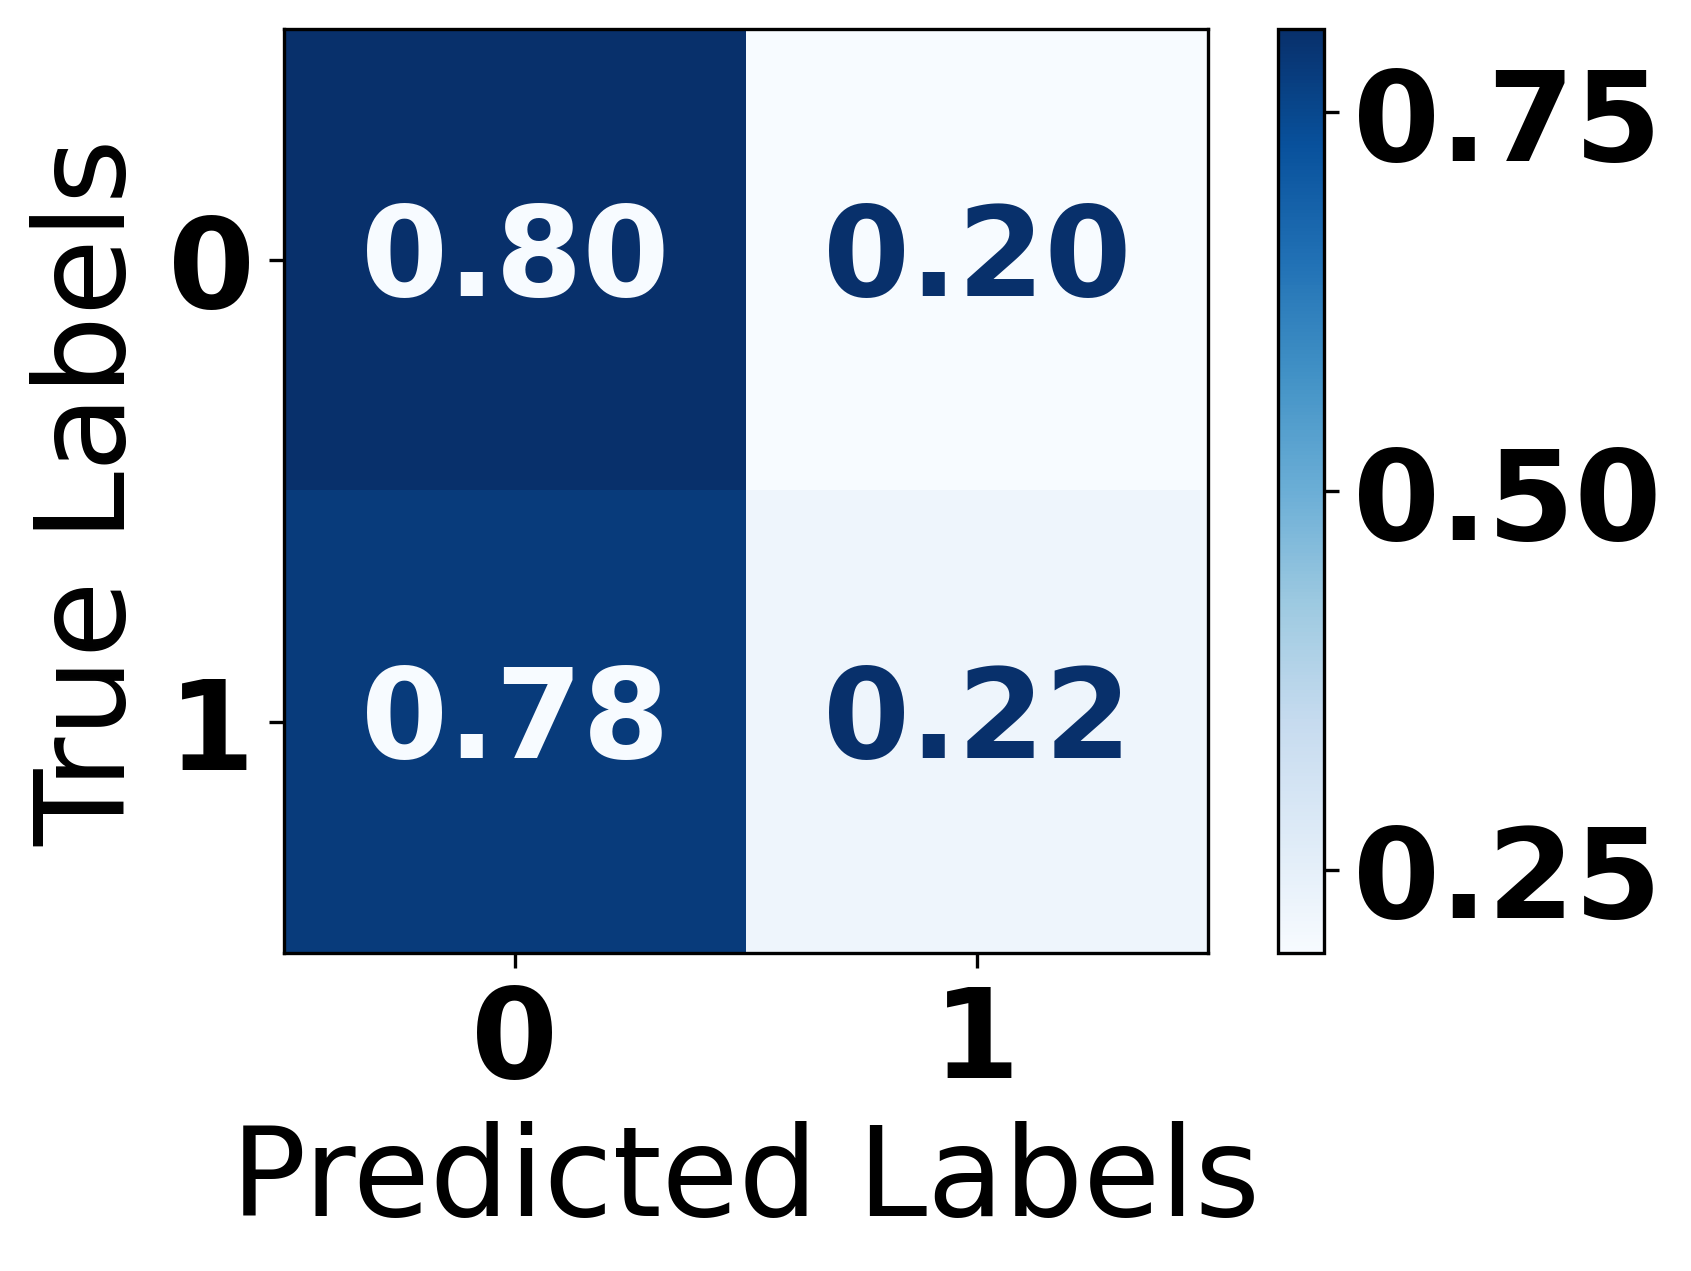

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.80      0.81        41
     Class 1       0.20      0.22      0.21         9

    accuracy                           0.70        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.71      0.70      0.71        50

Train Accuracy: 0.7309160305343512
Test Accuracy: 0.7


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


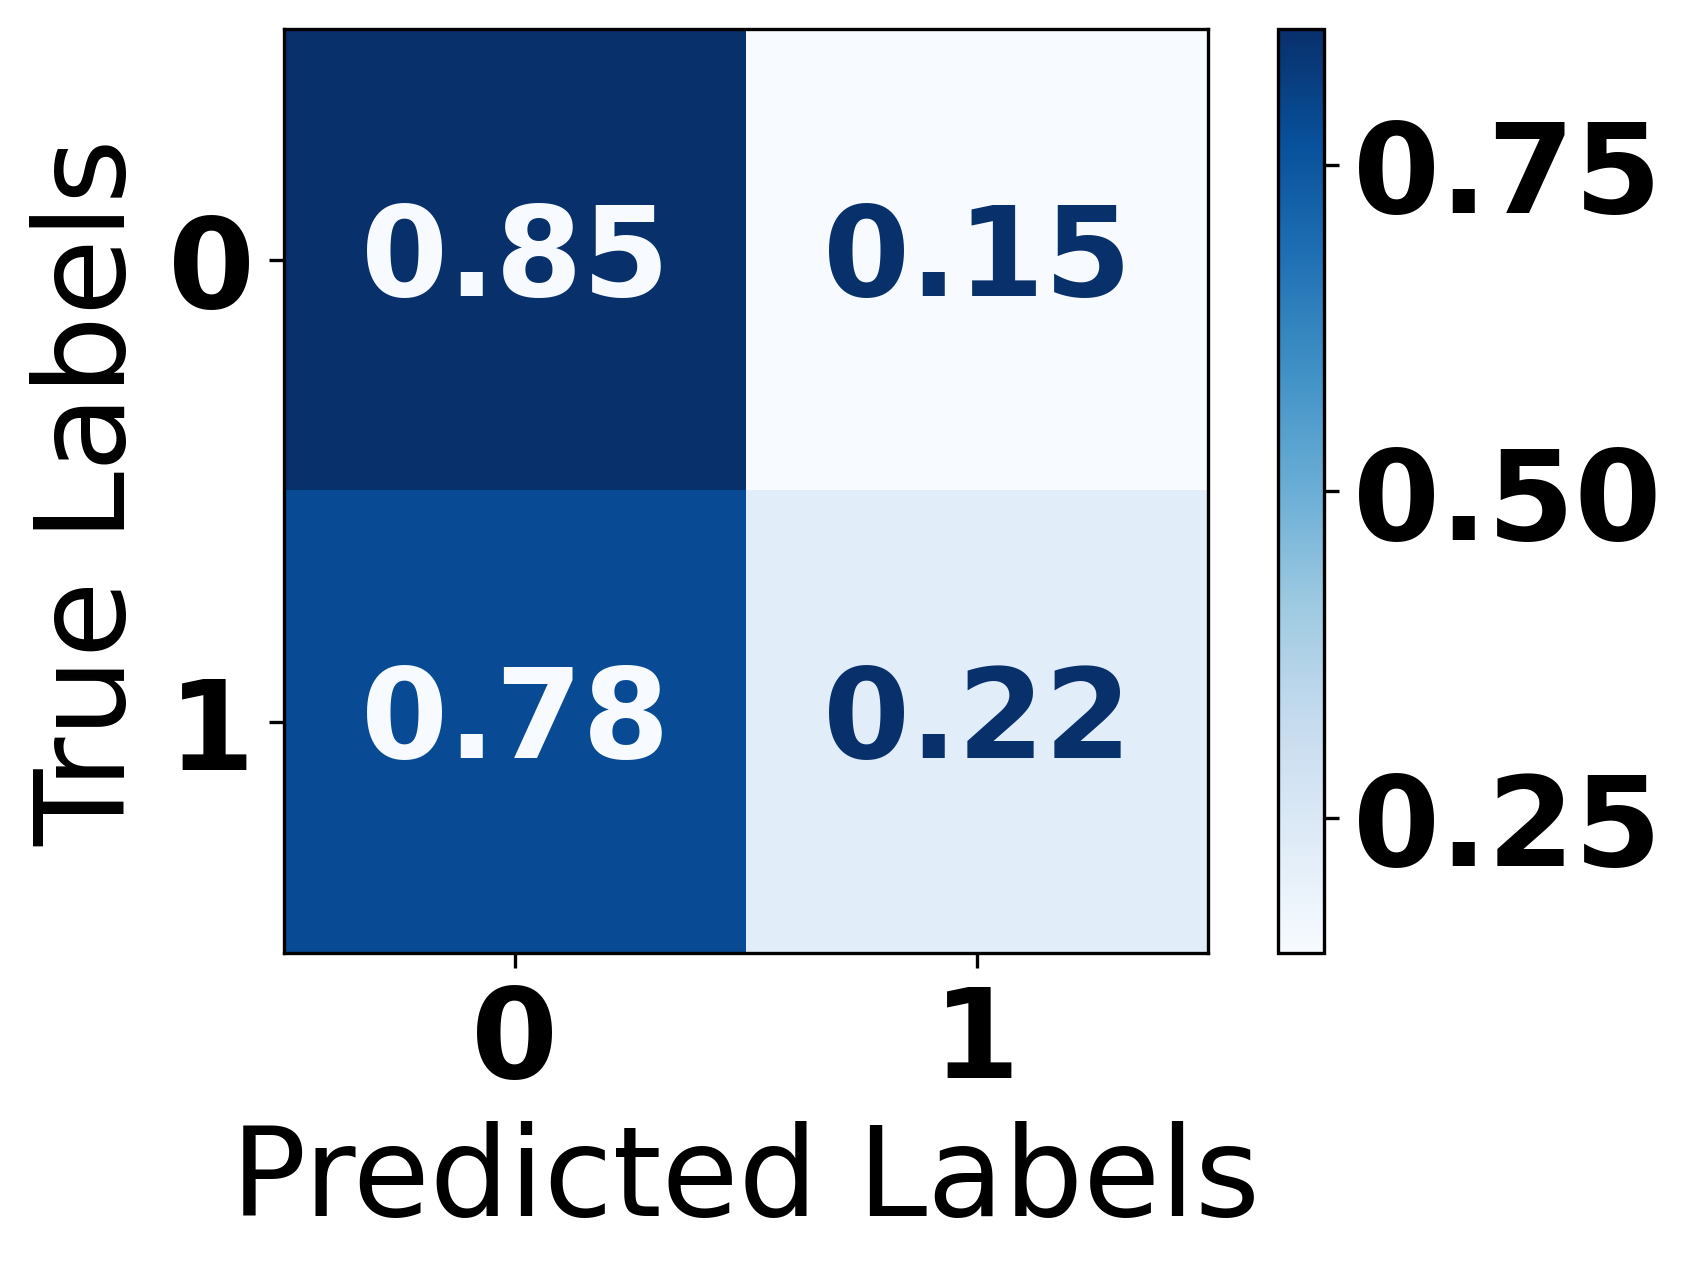

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.25      0.22      0.24         9

    accuracy                           0.74        50
   macro avg       0.54      0.54      0.54        50
weighted avg       0.73      0.74      0.73        50

Train Accuracy: 0.700381679389313
Test Accuracy: 0.74


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=1,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


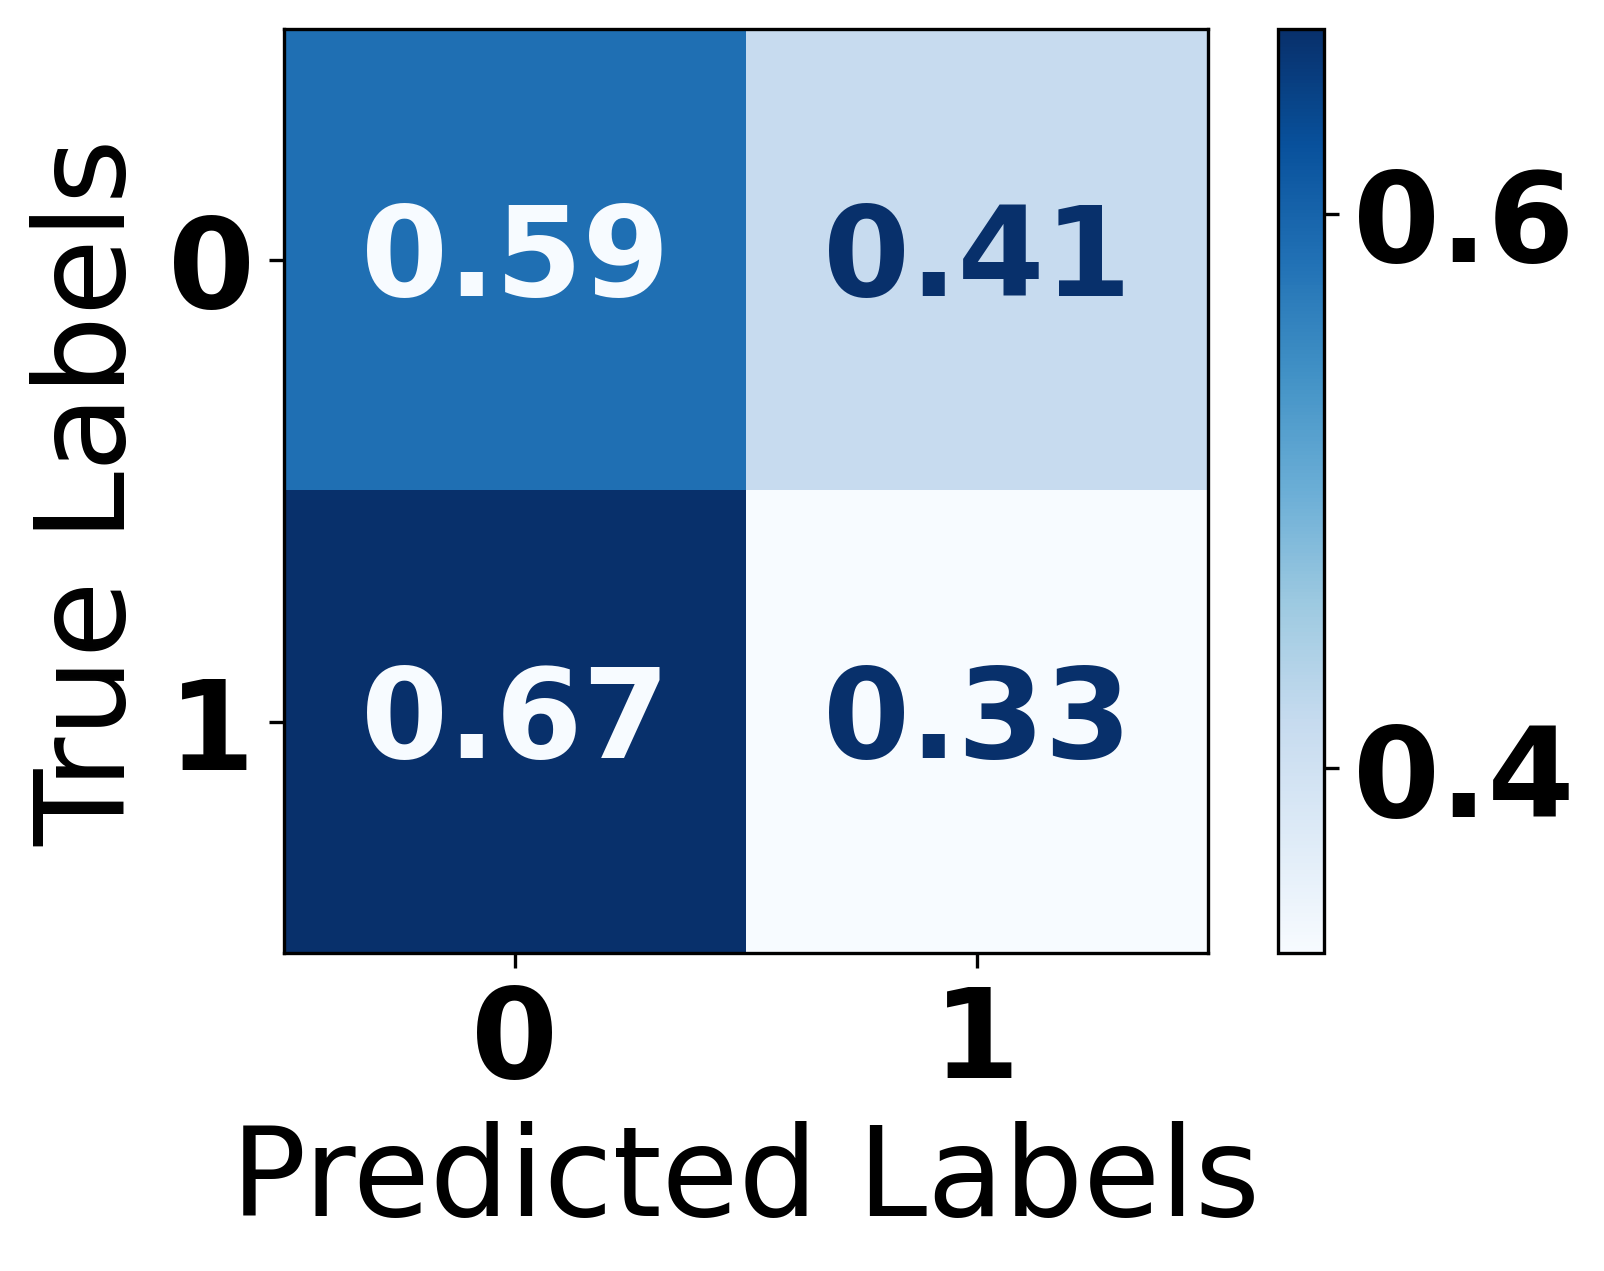

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        41
           1       0.15      0.33      0.21         9

    accuracy                           0.54        50
   macro avg       0.48      0.46      0.44        50
weighted avg       0.68      0.54      0.59        50

Train Accuracy: 0.7251908396946565
Test Accuracy: 0.54


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.00002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


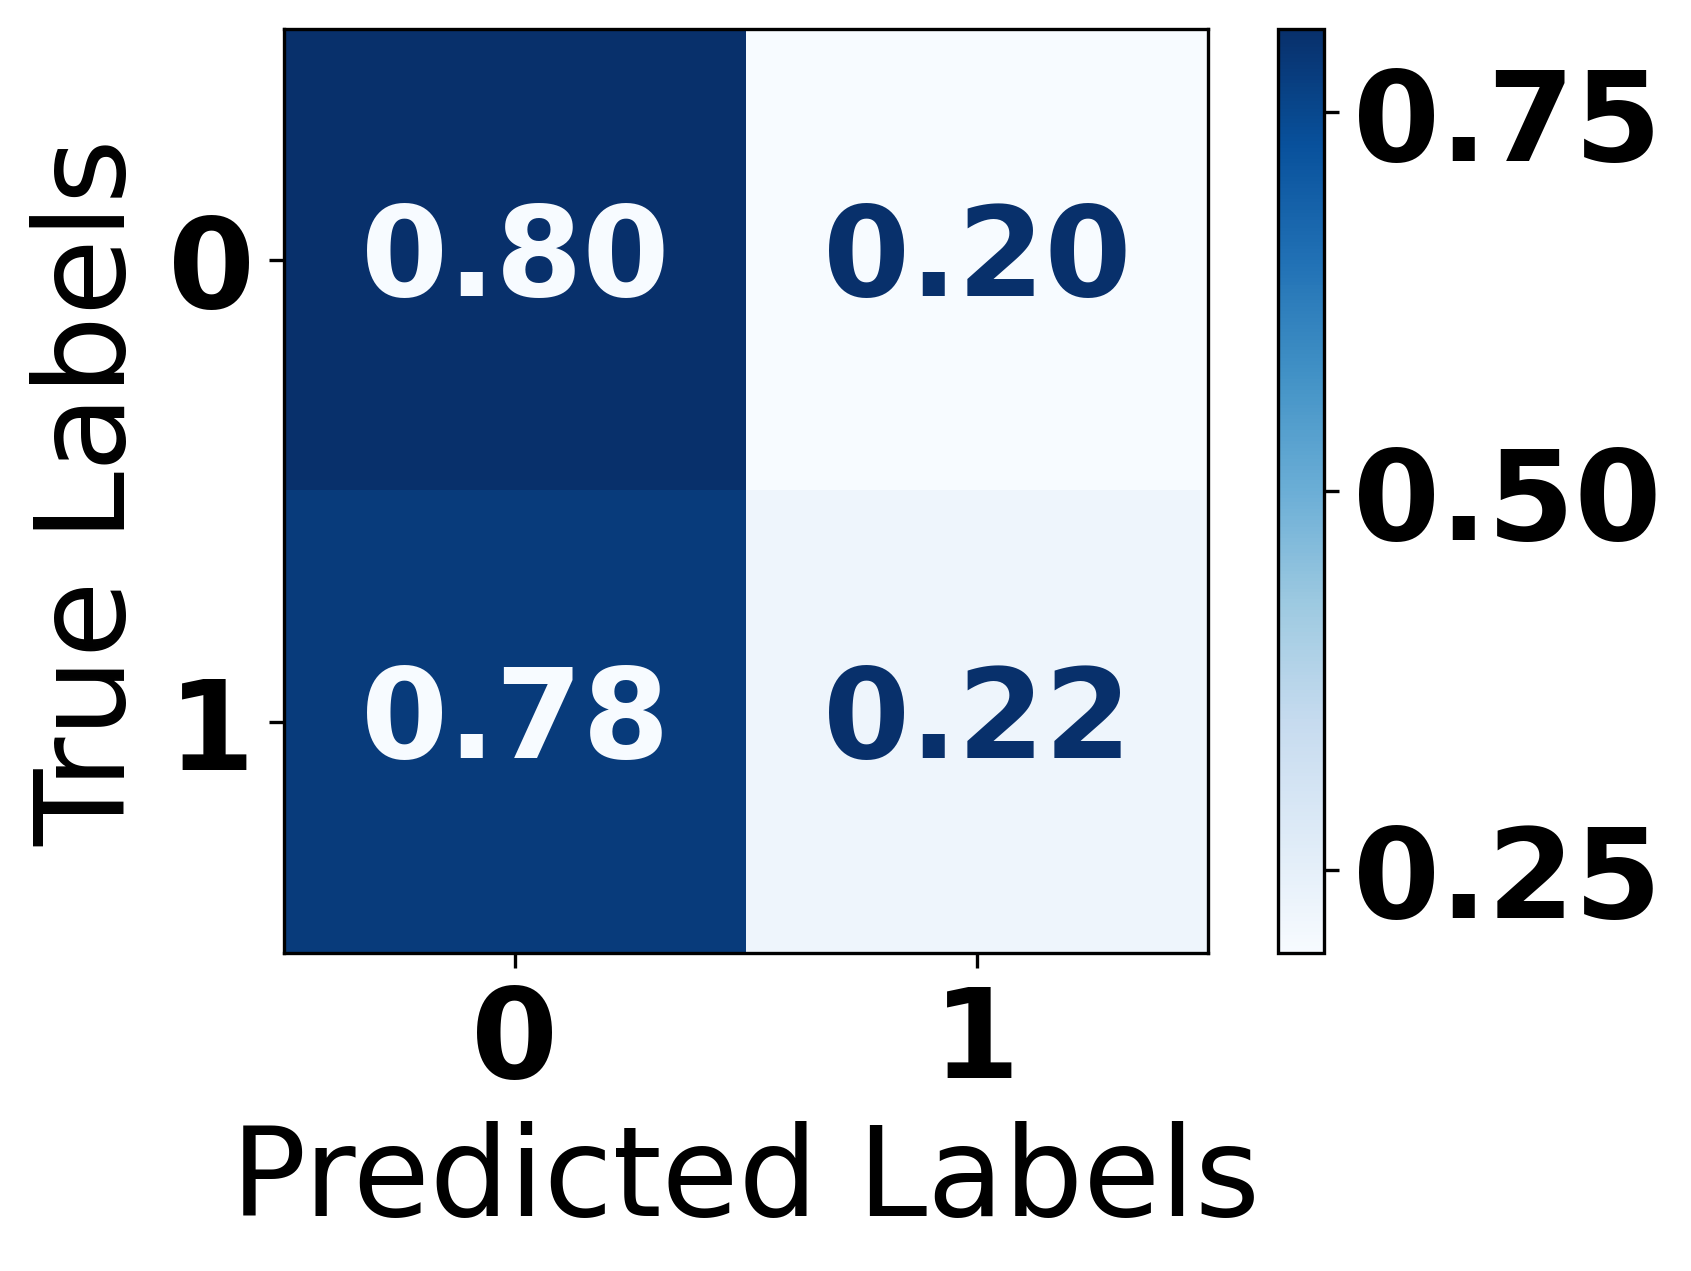

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.20      0.22      0.21         9

    accuracy                           0.70        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.71      0.70      0.71        50

Train Accuracy: 0.7309160305343512
Test Accuracy: 0.7


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        41
     Class 1       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


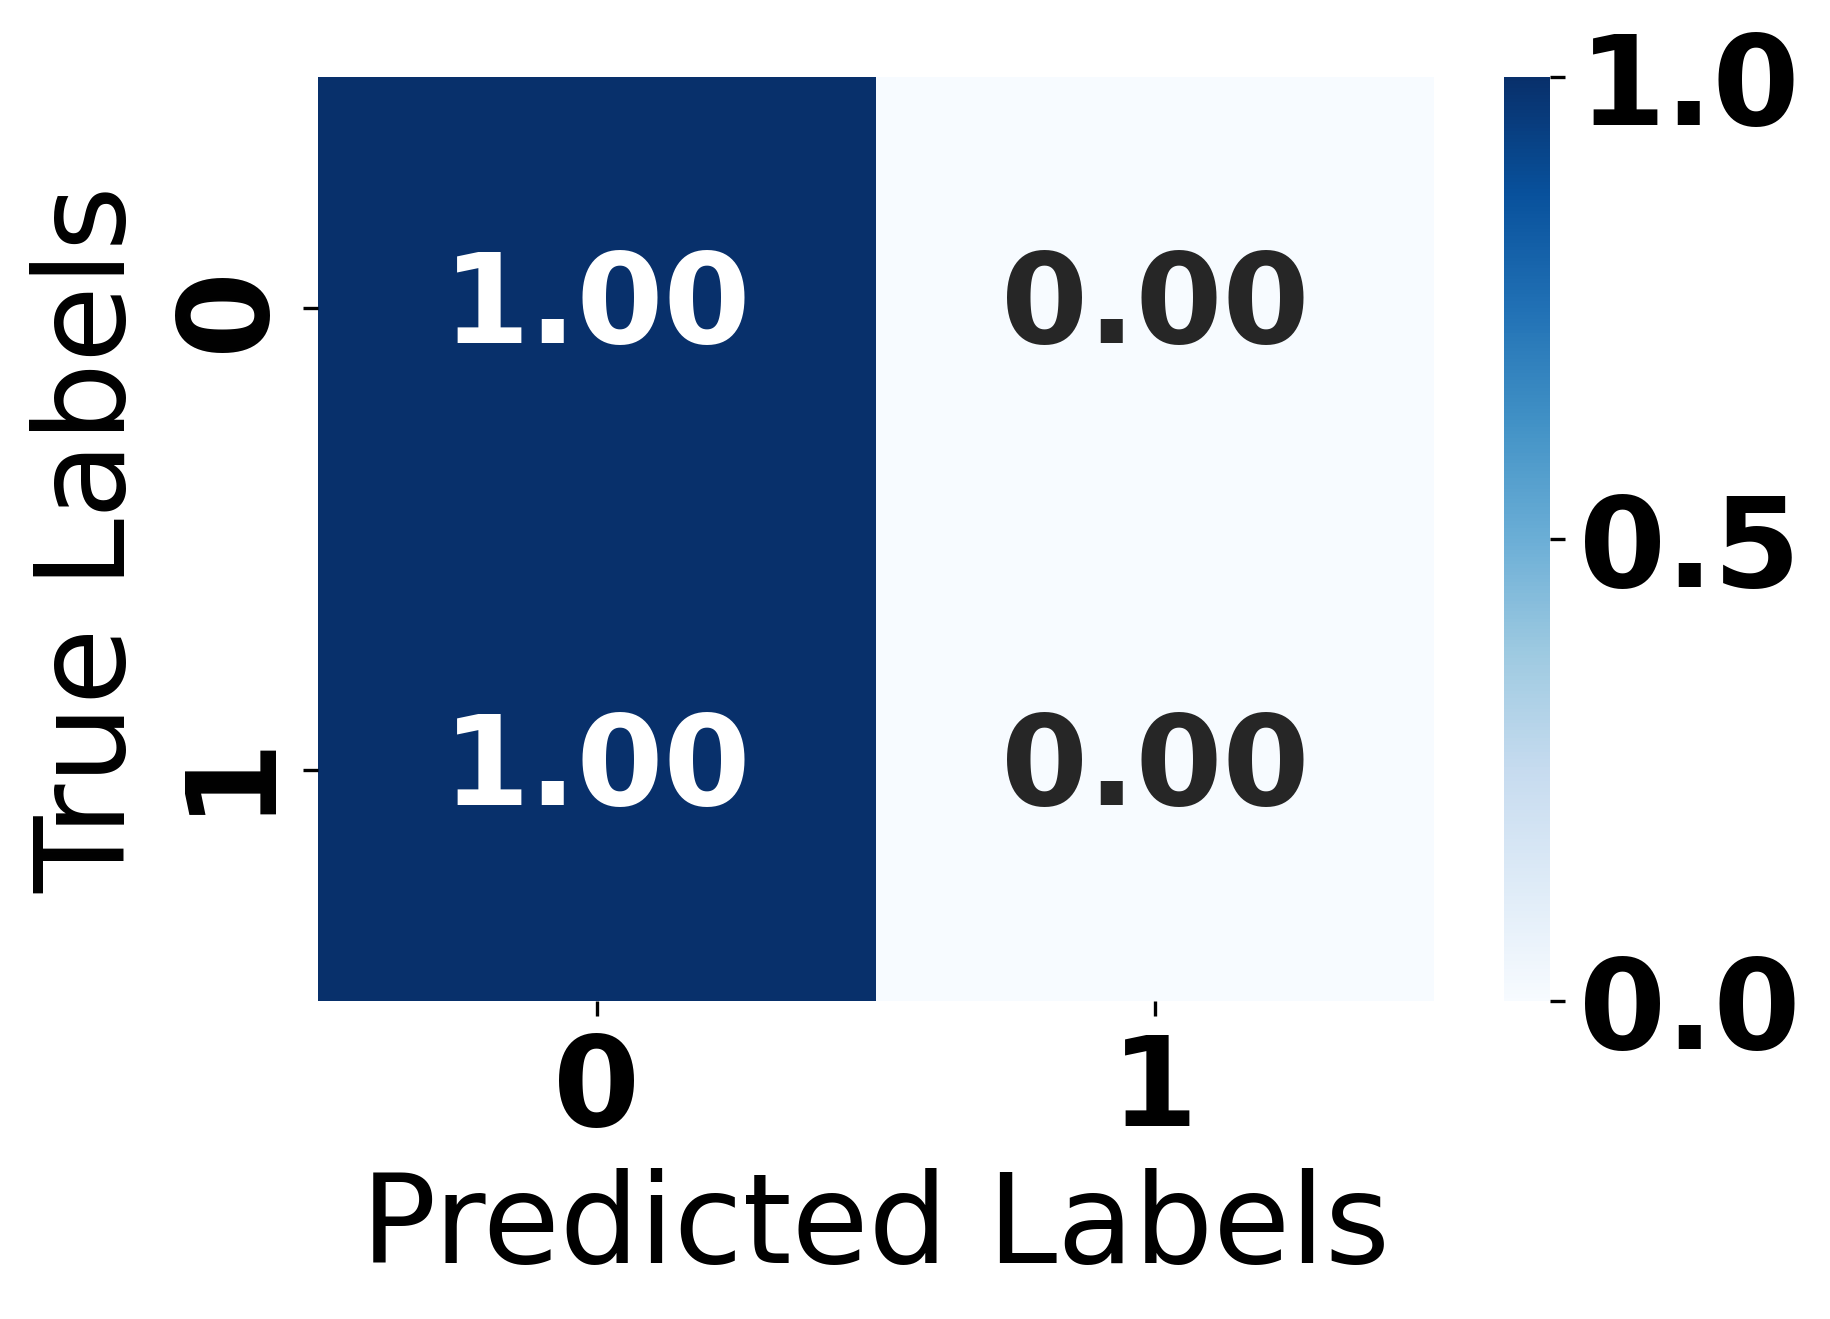

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/MLP.pkl')

In [ ]:
import numpy as np

# Convert to NumPy arrays if not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Reshape to (samples, timesteps, features=1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.5453 - loss: 4831.8813 - val_accuracy: 0.1800 - val_loss: 8516.0283
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6435 - loss: 2304.1707 - val_accuracy: 0.1800 - val_loss: 960.4380
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6259 - loss: 504.0222 - val_accuracy: 0.8200 - val_loss: 542.2103
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4363 - loss: 1706.7335 - val_accuracy: 0.1800 - val_loss: 3492.7502
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5737 - loss: 964.5740 - val_accuracy: 0.1800 - val_loss: 2380.8005
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6464 - loss: 736.9897 - val_accuracy: 0.8200 - val_loss: 118.7155
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5066 - loss: 437.7918 - val_accuracy: 0.1800 - val_loss: 434.8000
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6257 - loss: 230.9971 - val

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 447ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        41
     Class 1       0.18      1.00      0.31         9

    accuracy                           0.18        50
   macro avg       0.09      0.50      0.15        50
weighted avg       0.03      0.18      0.05        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


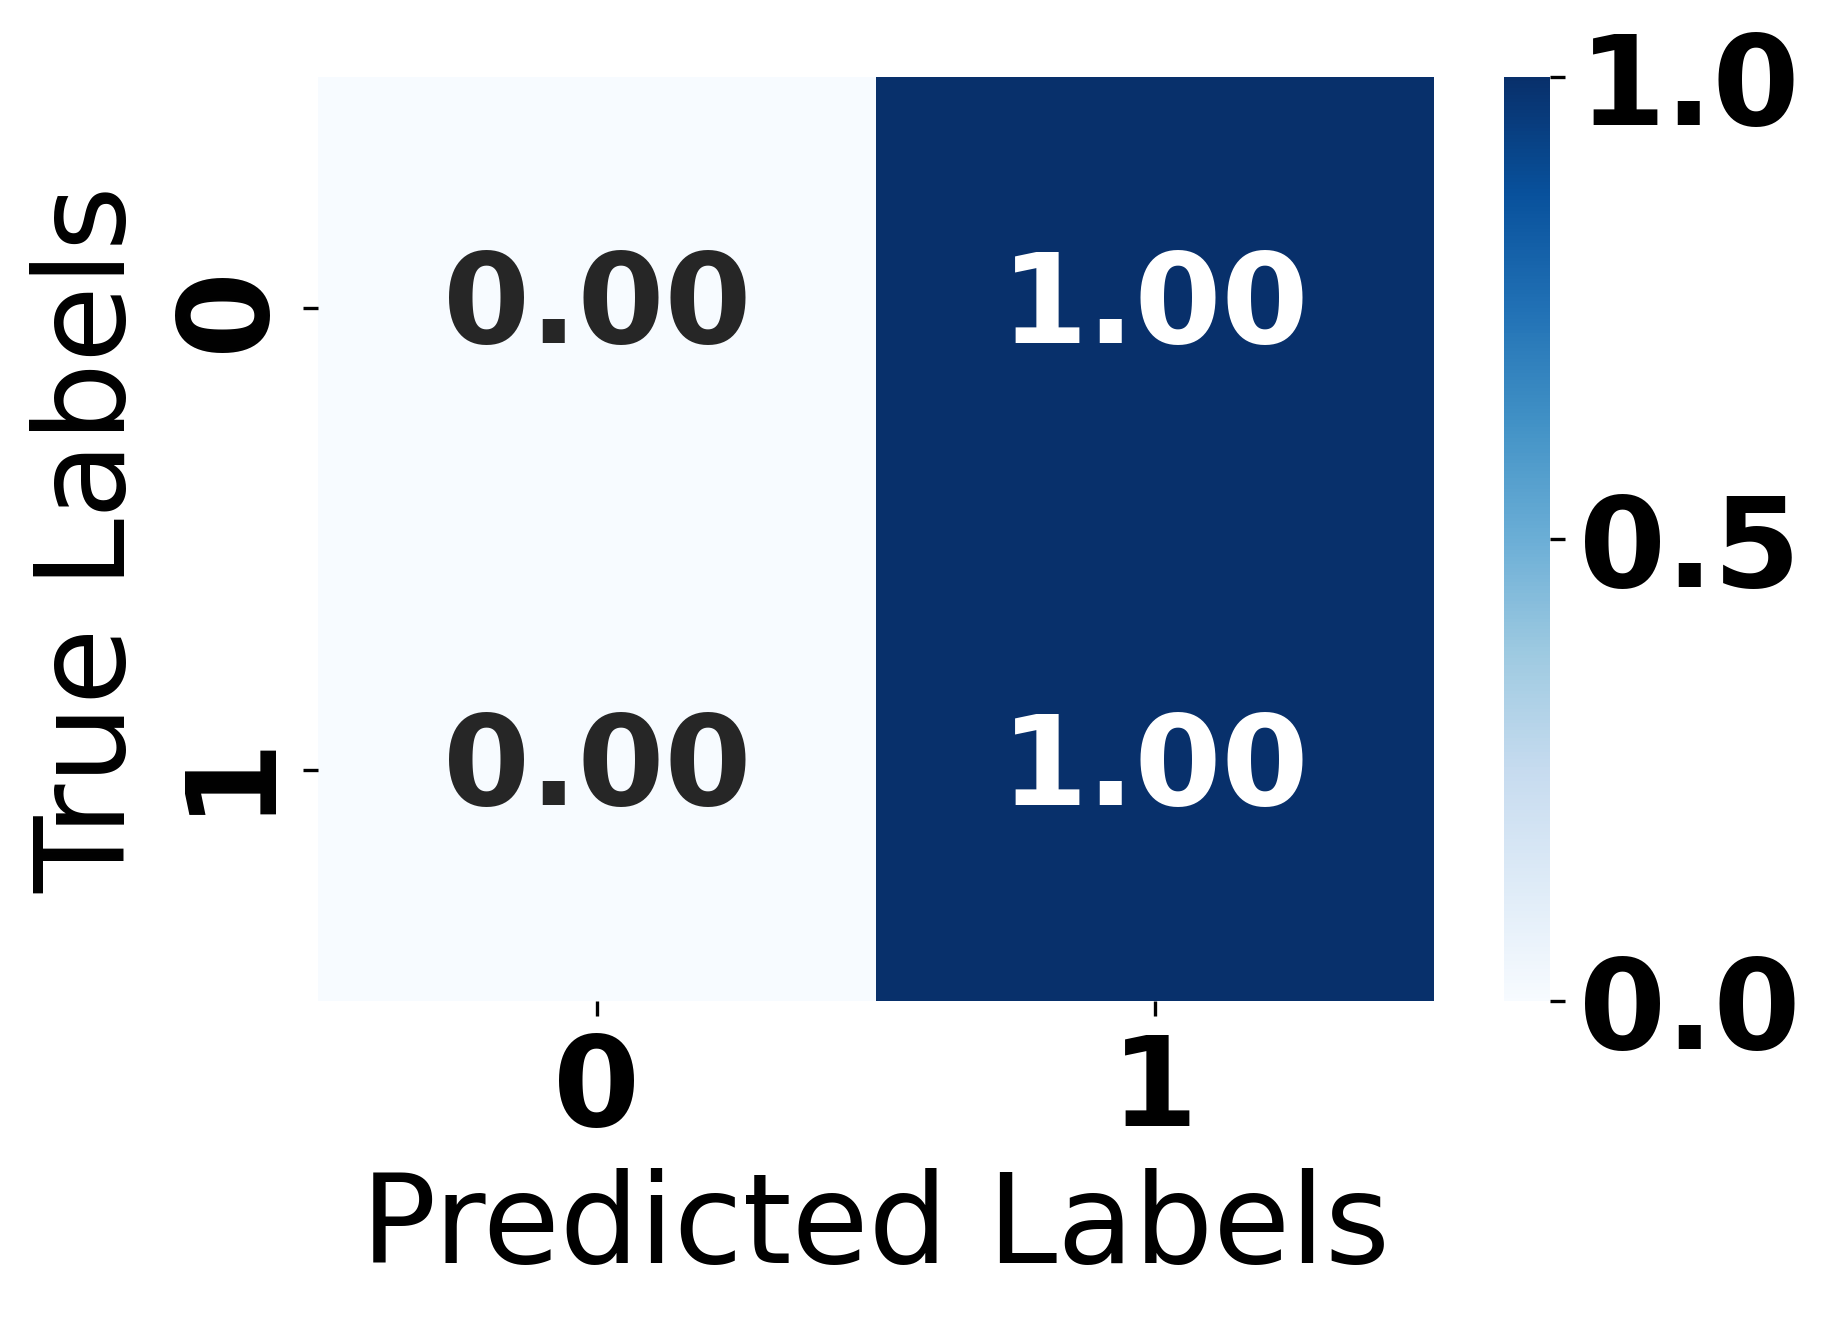

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.5768 - loss: 0.7623 - val_accuracy: 0.1800 - val_loss: 7.5102
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5645 - loss: 0.7627 - val_accuracy: 0.1800 - val_loss: 4.6036
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5290 - loss: 0.8125 - val_accuracy: 0.1800 - val_loss: 3.2335
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5576 - loss: 0.7030 - val_accuracy: 0.1800 - val_loss: 2.5293
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5471 - loss: 0.7125 - val_accuracy: 0.1800 - val_loss: 2.0363
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5863 - loss: 0.7222 - val_accuracy: 0.1800 - val_loss: 1.6874
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5244 - loss: 0.7234 - val_accuracy: 0.1800 - val_loss: 1.3954
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5541 - loss: 0.7039 - val_accuracy: 0.1800 - val_loss: 1.1894

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Normalized Confusion Matrix:
[[0.         1.        ]
 [0.11111111 0.88888889]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        41
     Class 1       0.16      0.89      0.28         9

    accuracy                           0.16        50
   macro avg       0.08      0.44      0.14        50
weighted avg       0.03      0.16      0.05        50



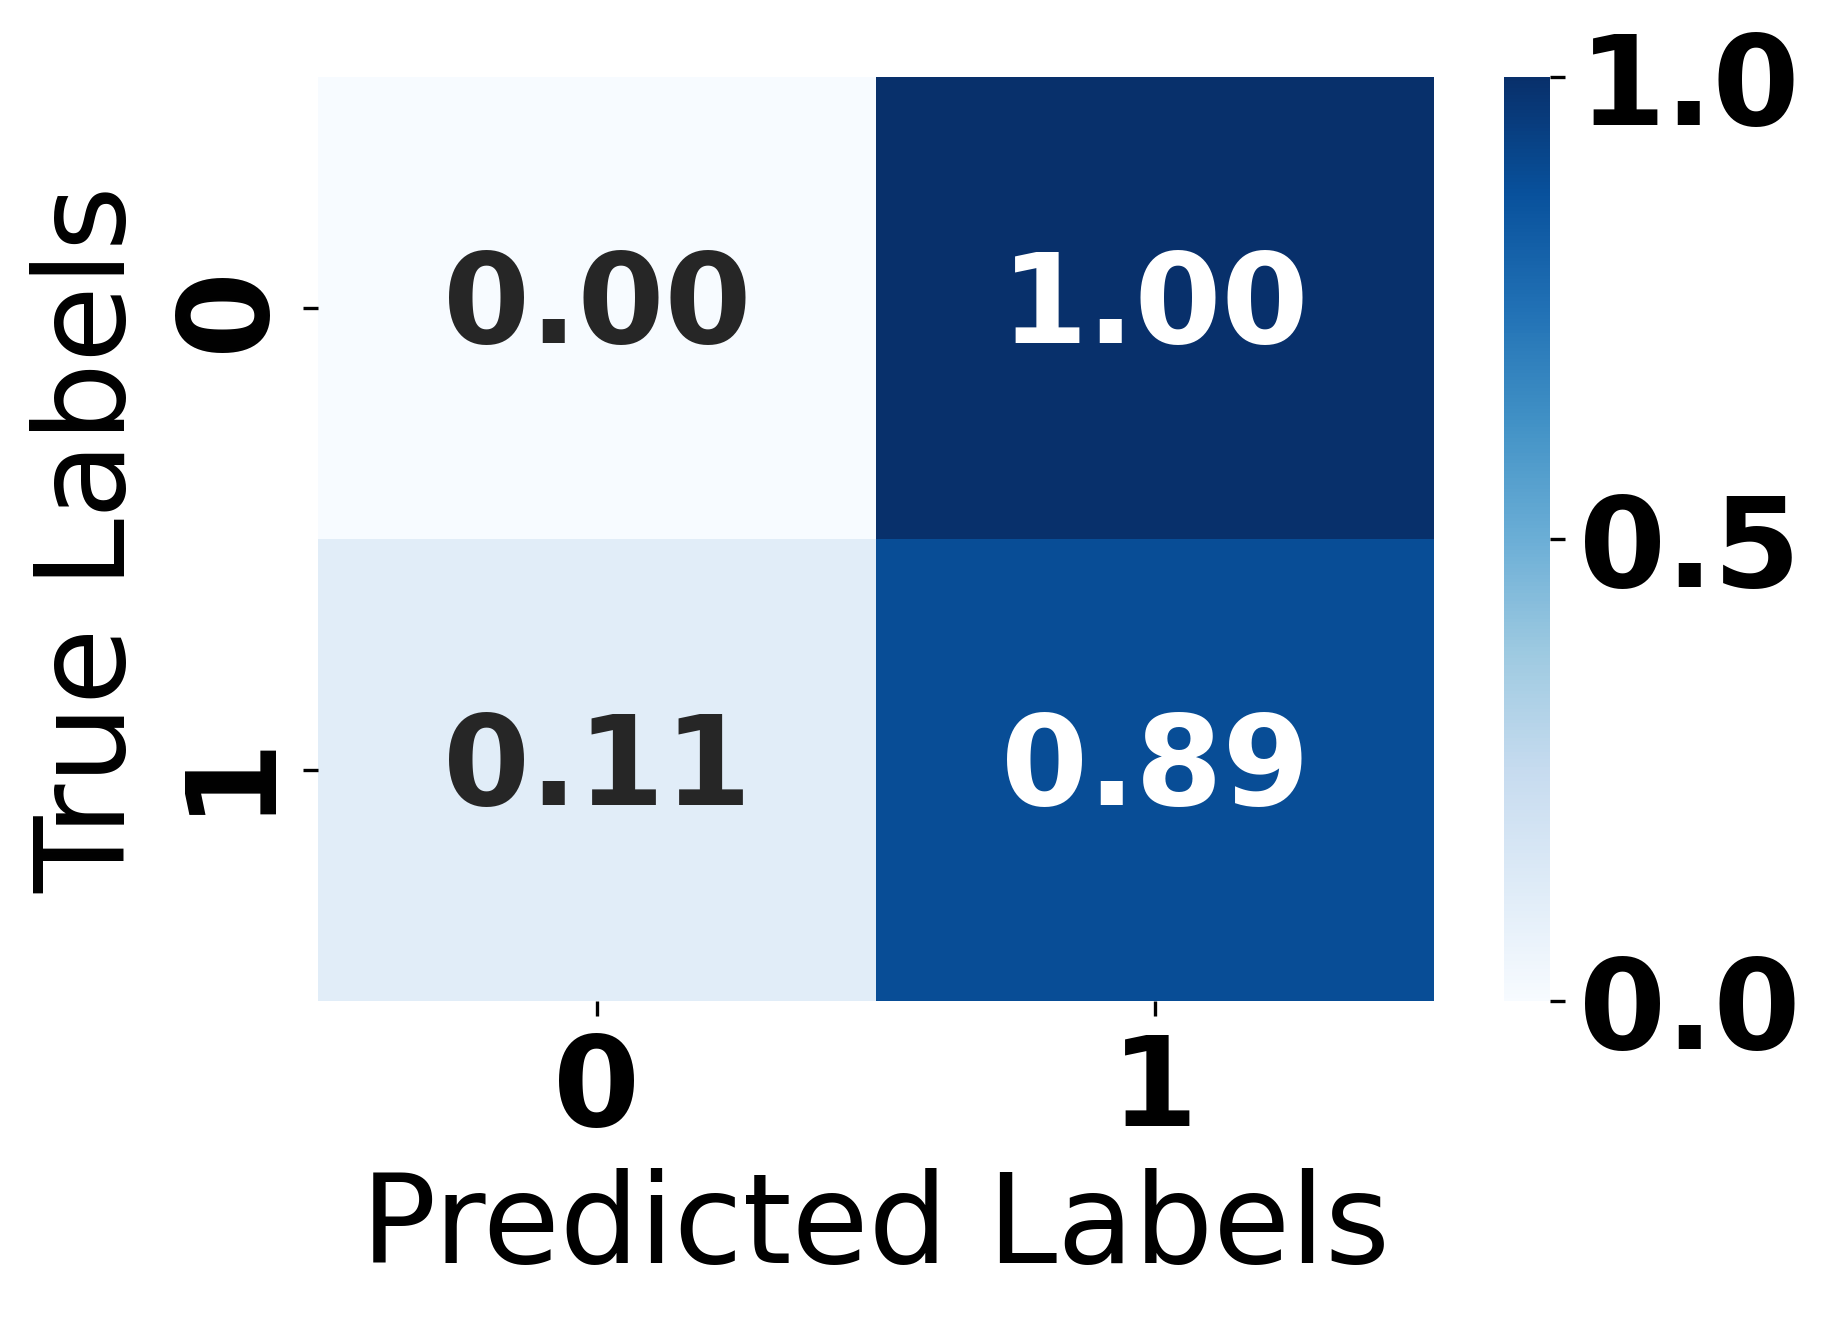

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time

# Dynamically determine input shape
input_shape = (x_train.shape[1],)  # Assuming x_train is already defined

# Dynamically determine vocab size from your data
vocab_size = int(np.max(x_train)) + 1  # Ensure embedding input covers all token indices
embed_dim = 128  # Embedding dimension
ff_dim = 128     # Feed-forward network dimension

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward block 1
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Feed-forward block 2
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model with time tracking
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time)

# Evaluate the model with time tracking
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 108800128 elements. This may consume a large amount of memory.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3896 - loss: 0.7352 - val_accuracy: 0.5000 - val_loss: 0.7008
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5501 - loss: 0.6891 - val_accuracy: 0.2400 - val_loss: 0.7453
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5958 - loss: 0.6742 - val_accuracy: 0.1800 - val_loss: 0.7750
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6632 - loss: 0.6483 - val_accuracy: 0.1800 - val_loss: 0.8038
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6921 - loss: 0.6345 - val_accuracy: 0.1800 - val_loss: 0.8302
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6929 - loss: 0.6424 - val_accuracy: 0.1800 - val_loss: 0.8534
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6856 - loss: 0.6325 - val_accuracy: 0.1800 - val_loss: 0.8732
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6928 - loss: 0.6206 - val_accuracy: 0.1800 - val_loss: 0.8912
Epoch 9/20
5/5 ━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Normalized Confusion Matrix:
[[0.02439024 0.97560976]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.02      0.05        41
     Class 1       0.18      1.00      0.31         9

    accuracy                           0.20        50
   macro avg       0.59      0.51      0.18        50
weighted avg       0.85      0.20      0.09        50



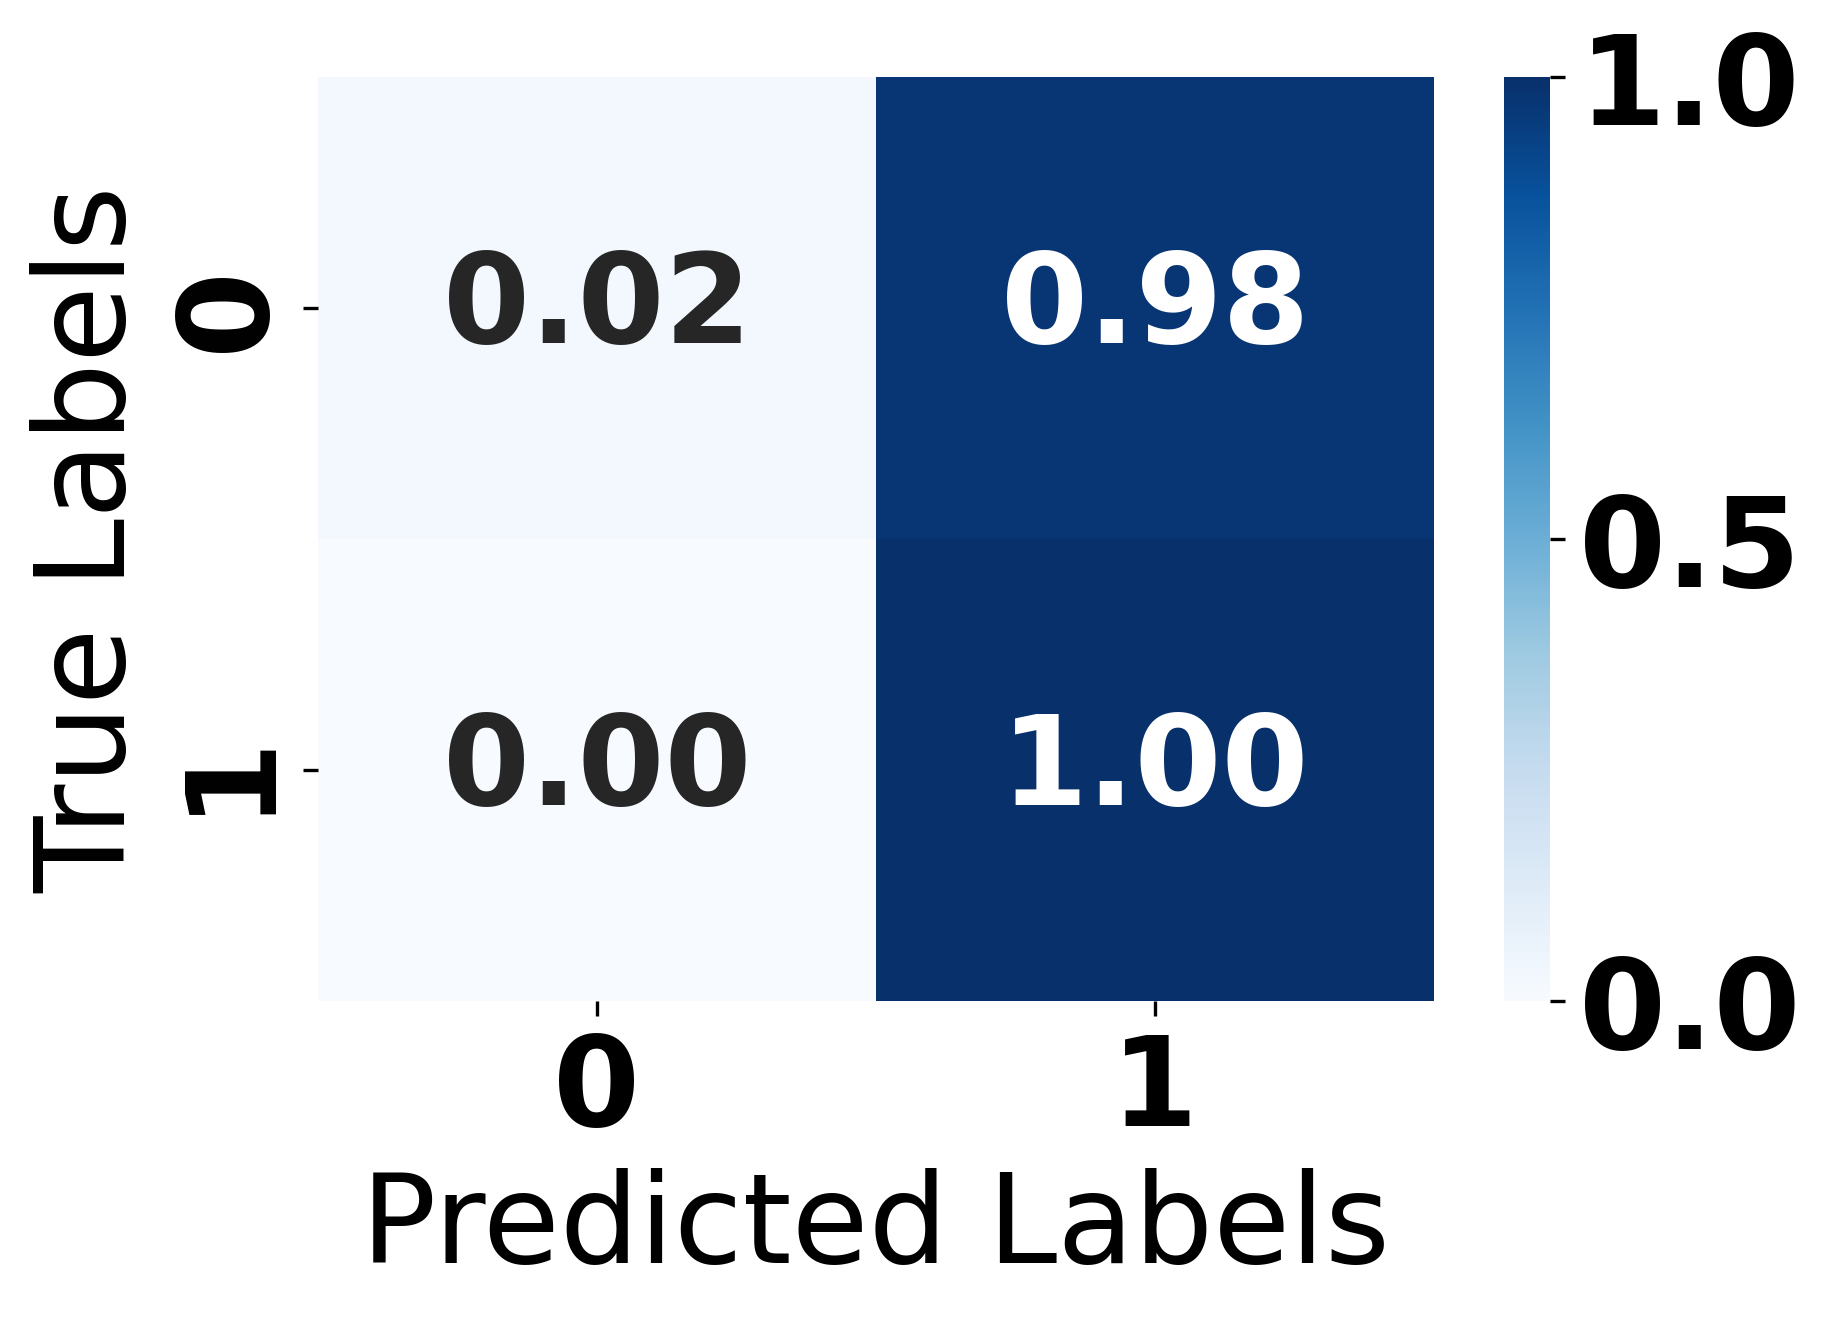

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/CTGAN/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=131, training_loss=0.4813508705328439, metrics={'train_runtime': 507.3236, 'train_samples_per_second': 1.033, 'train_steps_per_second': 0.258, 'total_flos': 0.0, 'train_loss': 0.4813508705328439, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.7857    0.8049    0.7952        41
           1     0.0000    0.0000    0.0000         9

    accuracy                         0.6600        50
   macro avg     0.3929    0.4024    0.3976        50
weighted avg     0.6443    0.6600    0.6520        50

Confusion Matrix:
 [[33  8]
 [ 9  0]]


### TVAE (Tabular Variational Autoencoder)

In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
from ctgan import TVAE
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices (UCI Heart Disease)
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before TVAE:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit TVAE on minority class
tvae = TVAE(epochs=300)
tvae.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = tvae.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After TVAE:", Counter(y_resampled_df))

Before TVAE: Counter({np.int64(0): 162, np.int64(1): 87})
After TVAE: Counter({1: 362, 0: 162})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
60.000000    28
50.000000    23
65.000000    23
70.000000    21
45.000000    14
             ..
57.946533     1
48.900876     1
59.247655     1
64.952657     1
55.767755     1
Name: count, Length: 319, dtype: int64

Counts for anaemia:
anaemia
0    288
1    236
Name: count, dtype: int64

Counts for creatinine_phosphokinase:
creatinine_phosphokinase
582     297
168       6
60        5
66        4
68        3
       ... 
131       1
805       1
99        1
166       1
2017      1
Name: count, Length: 181, dtype: int64

Counts for diabetes:
diabetes
0    311
1    213
Name: count, dtype: int64

Counts for ejection_fraction:
ejection_fraction
25    45
35    45
38    38
40    37
30    32
60    27
20    24
50    23
45    21
26    19
24    16
23    14
29    13
19    12
27    12
28     9
41     9
34     8
22     8
43     7
17     7
39     7
21     7
32     7
48     6
15     6
55     5
44     5
31     5
52     5
42     4
18     3
62     3
59     3
49     3
33     3
53     3
5

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

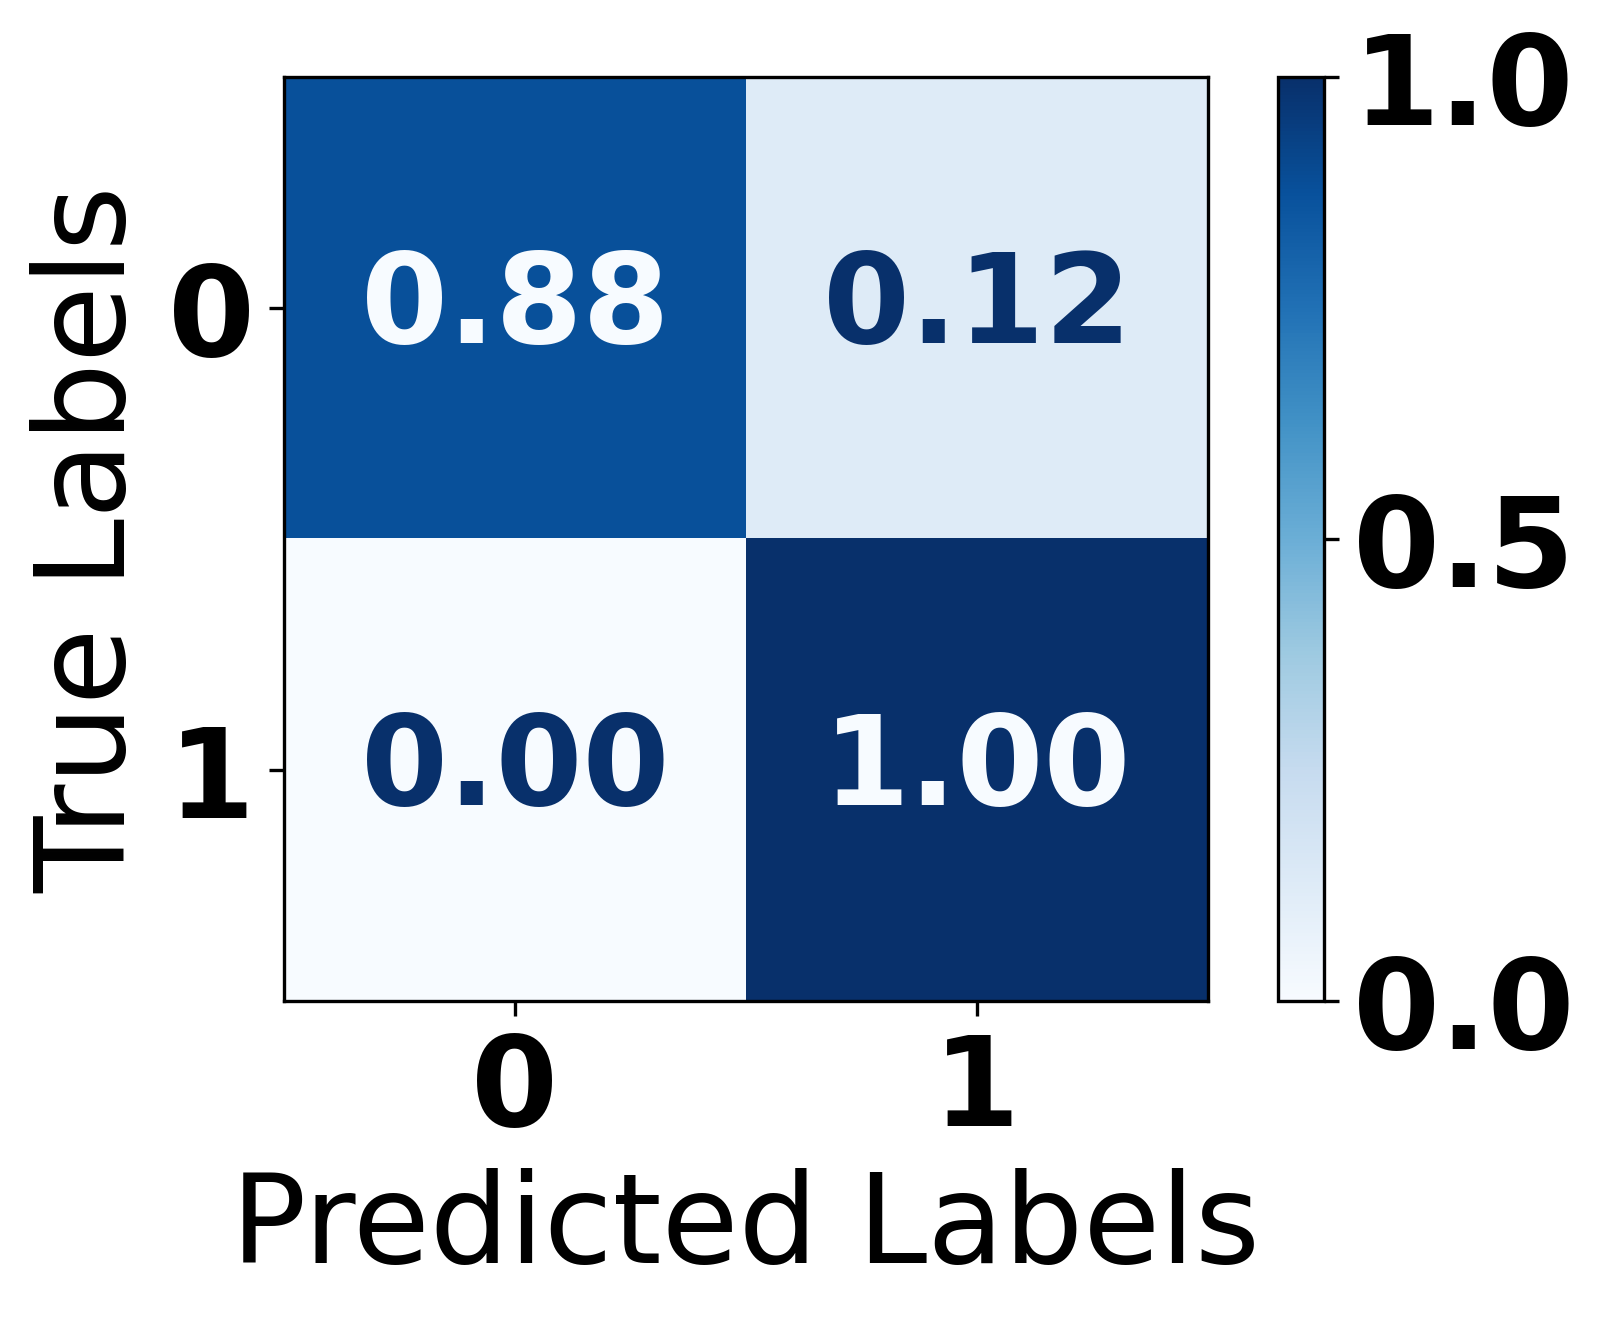

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.94        41
     Class 1       0.64      1.00      0.78         9

    accuracy                           0.90        50
   macro avg       0.82      0.94      0.86        50
weighted avg       0.94      0.90      0.91        50

Train Accuracy: 1.0
Test Accuracy: 0.9


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=42)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


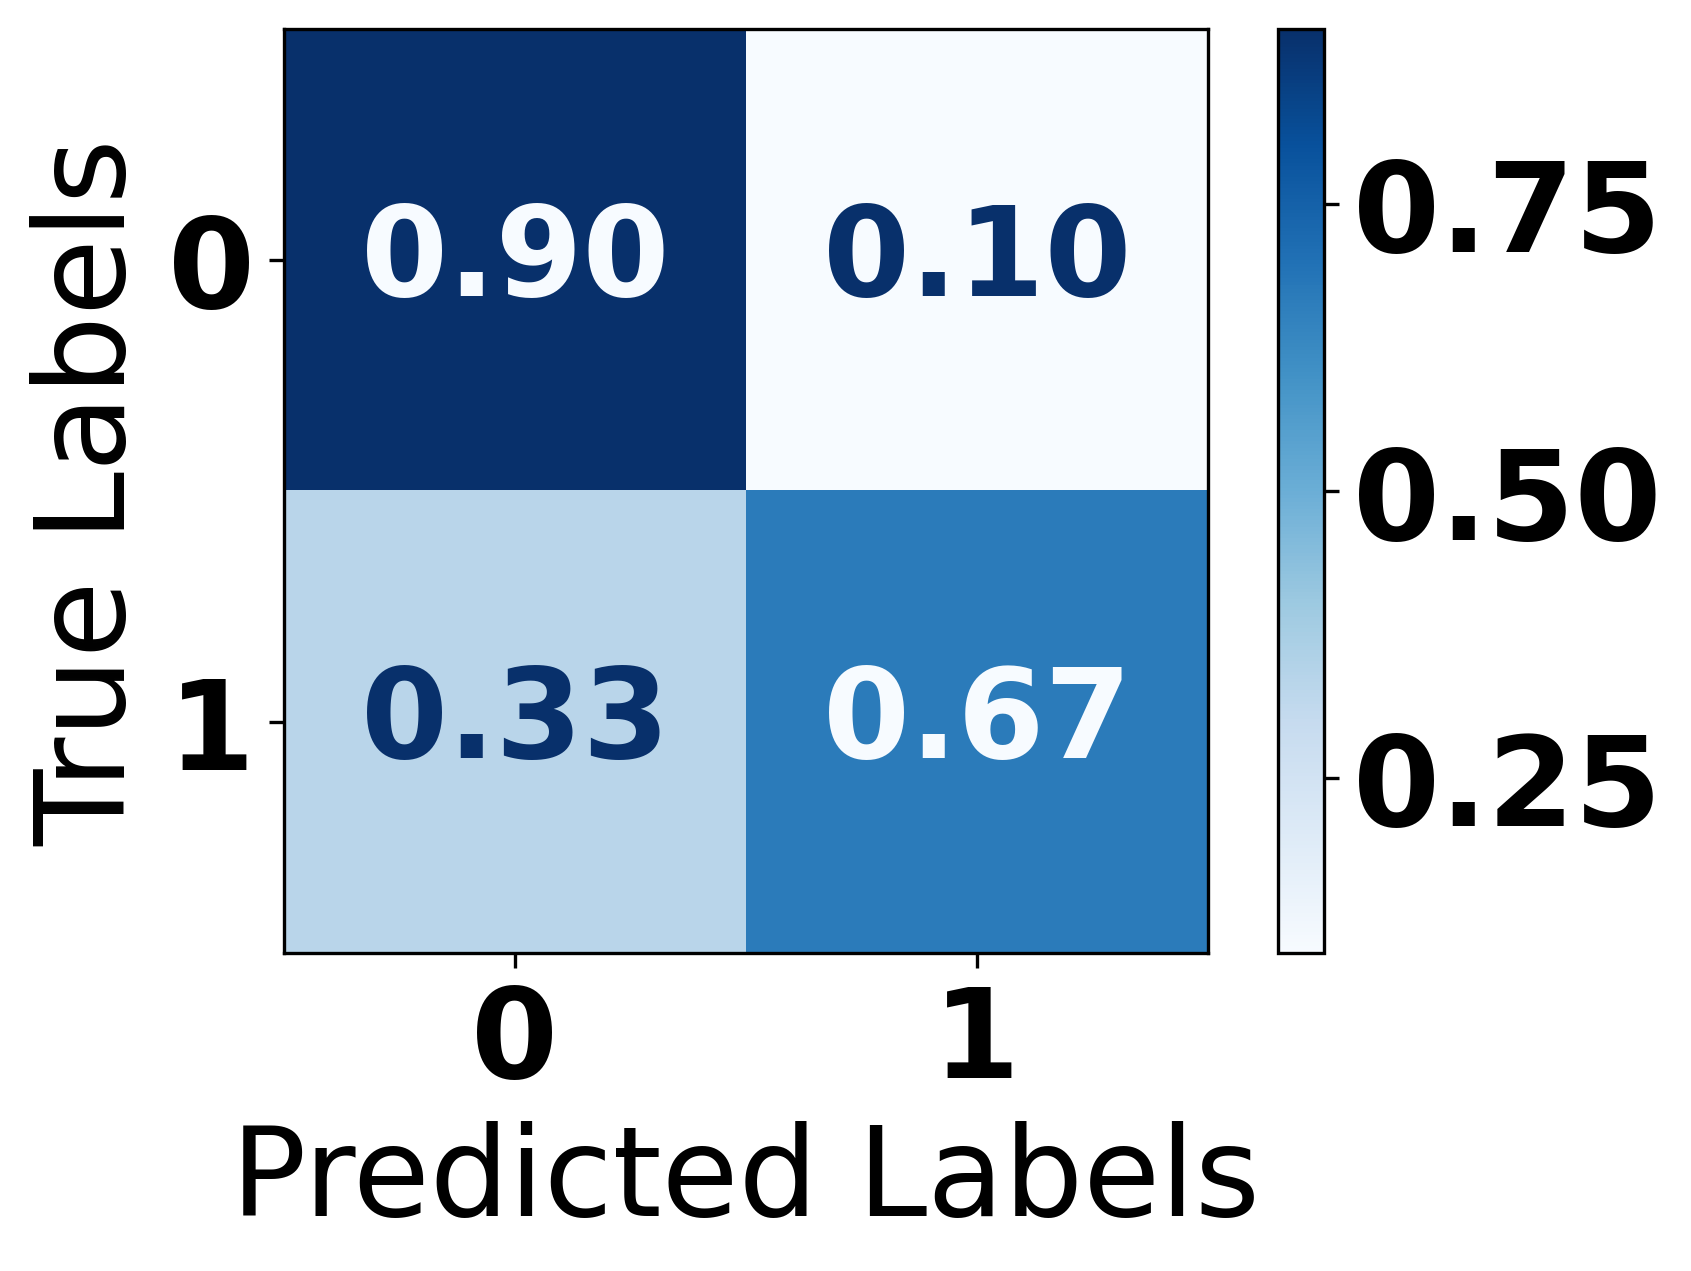

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.90      0.91        41
     Class 1       0.60      0.67      0.63         9

    accuracy                           0.86        50
   macro avg       0.76      0.78      0.77        50
weighted avg       0.87      0.86      0.86        50

Train Accuracy: 0.9312977099236641
Test Accuracy: 0.86


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=13, random_state=1)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


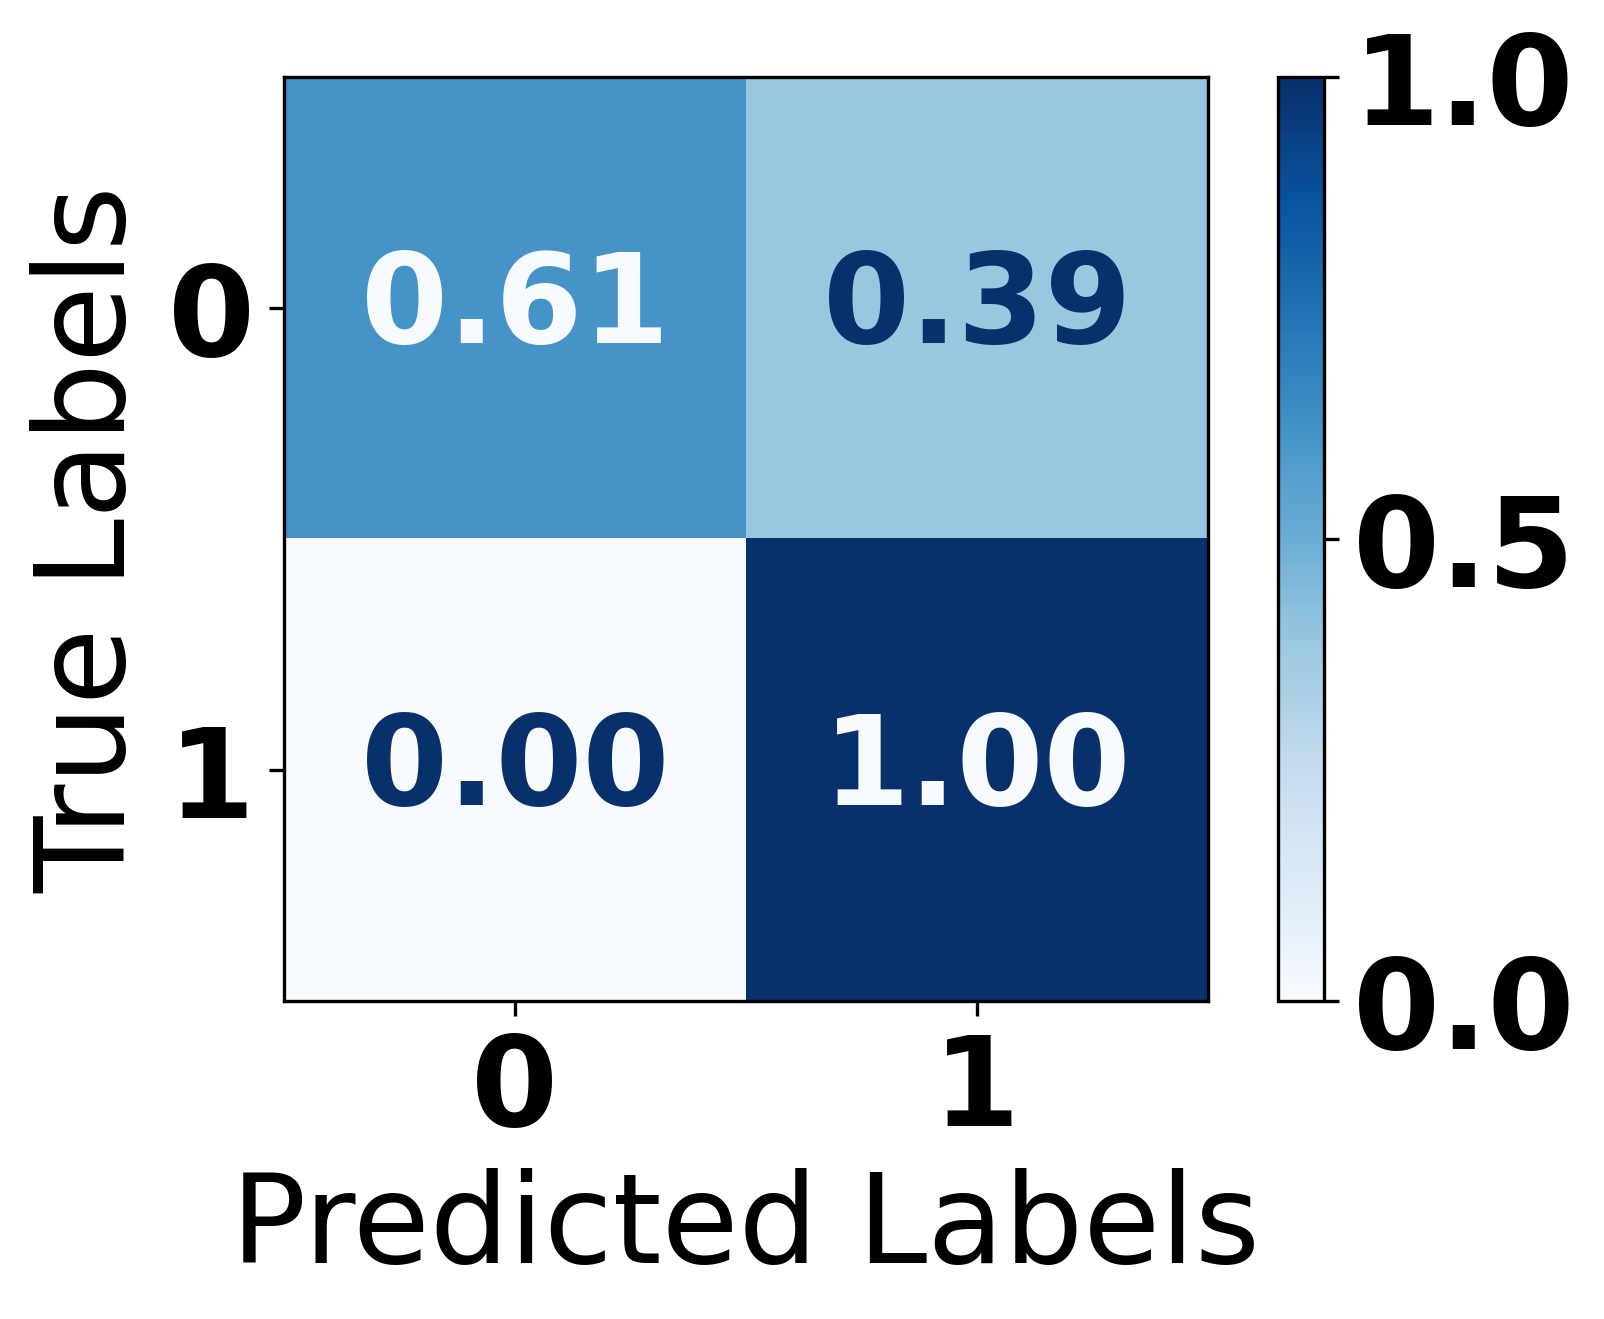

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76        41
           1       0.36      1.00      0.53         9

    accuracy                           0.68        50
   macro avg       0.68      0.80      0.64        50
weighted avg       0.88      0.68      0.72        50

Train Accuracy: 0.8263358778625954
Test Accuracy: 0.68


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=5, # Require lots of samples to split
    min_samples_leaf=1,  # Each leaf must have many samples
    random_state=8
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


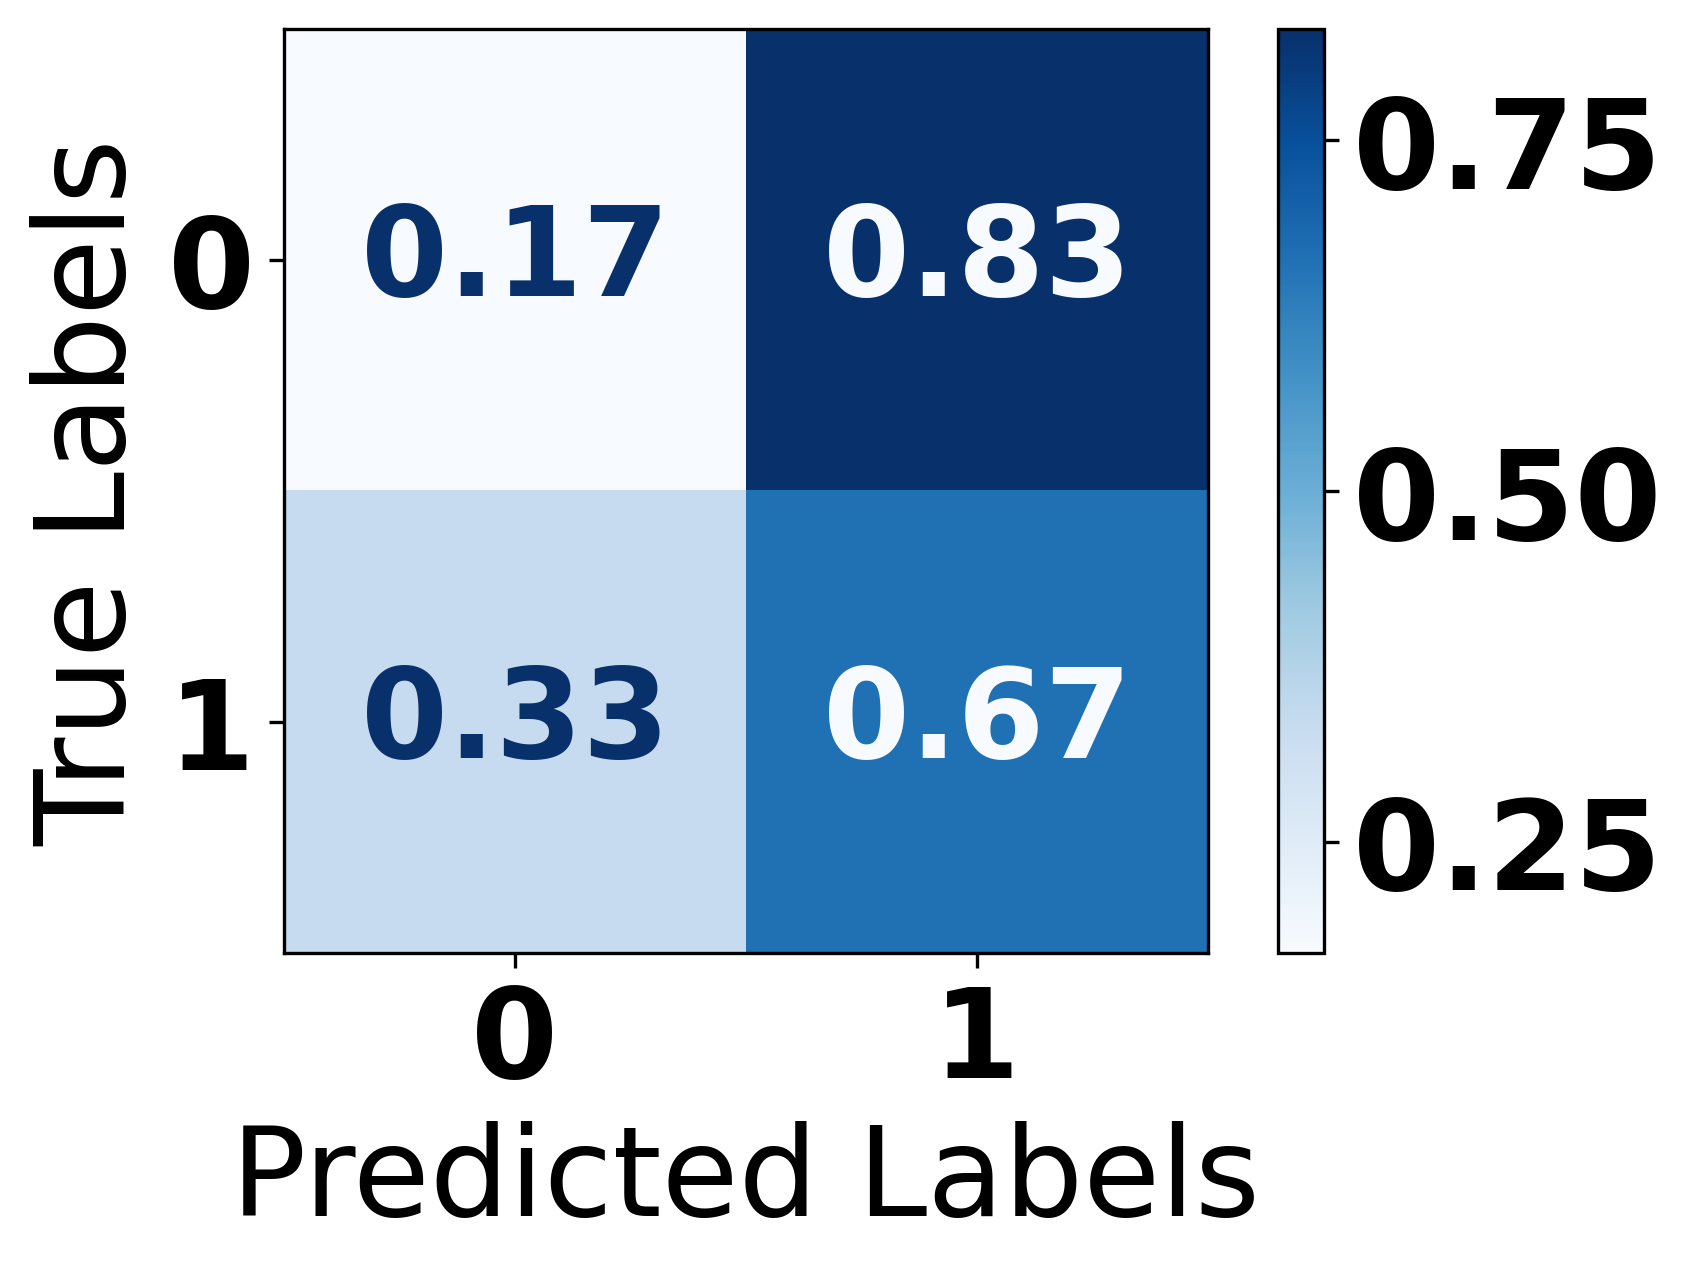

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.17      0.27        41
           1       0.15      0.67      0.24         9

    accuracy                           0.26        50
   macro avg       0.42      0.42      0.26        50
weighted avg       0.60      0.26      0.27        50

Train Accuracy: 0.700381679389313
Test Accuracy: 0.26


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.00004)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


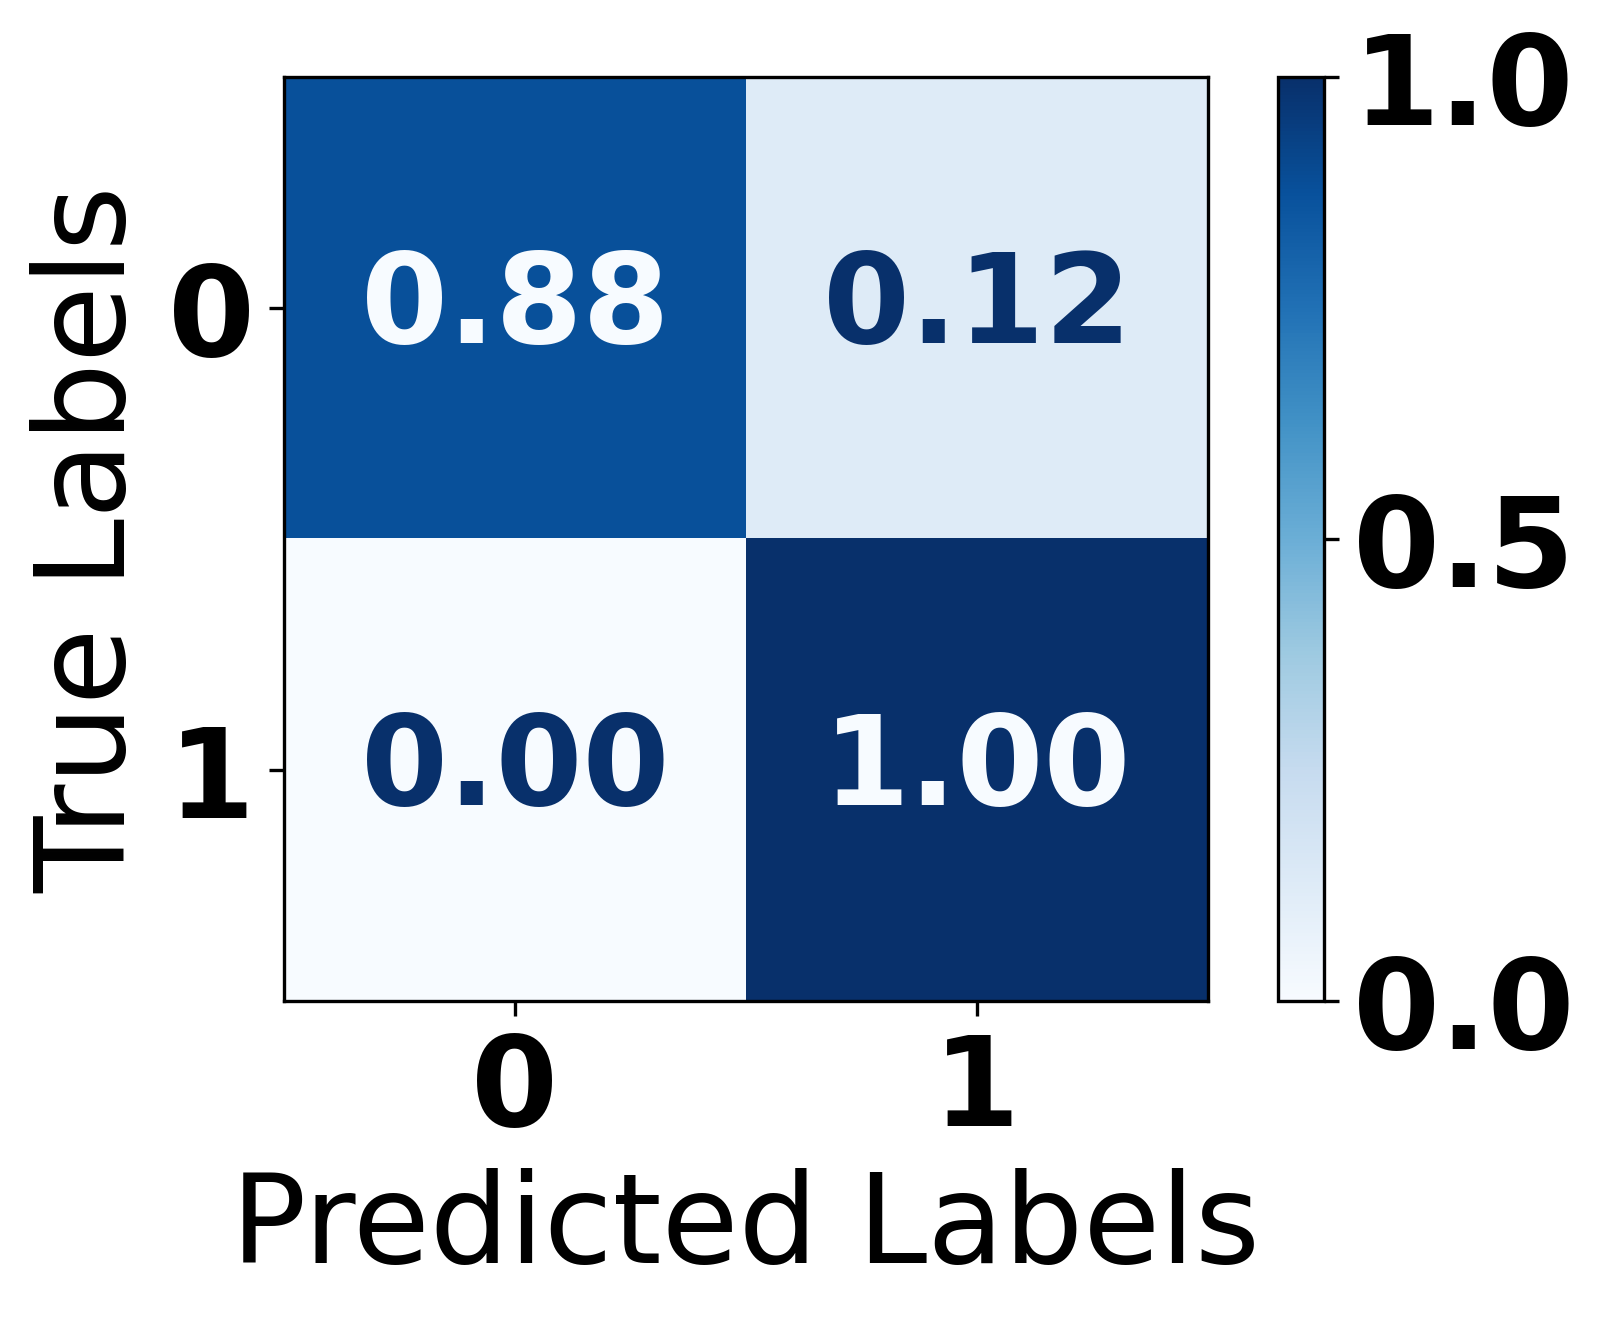

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        41
           1       0.64      1.00      0.78         9

    accuracy                           0.90        50
   macro avg       0.82      0.94      0.86        50
weighted avg       0.94      0.90      0.91        50

Train Accuracy: 0.9274809160305344
Test Accuracy: 0.9


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=21, learning_rate=1.5, random_state=15)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=20, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.31707317 0.68292683]
 [0.22222222 0.77777778]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.32      0.46        41
     Class 1       0.20      0.78      0.32         9

    accuracy                           0.40        50
   macro avg       0.53      0.55      0.39        50
weighted avg       0.75      0.40      0.44        50



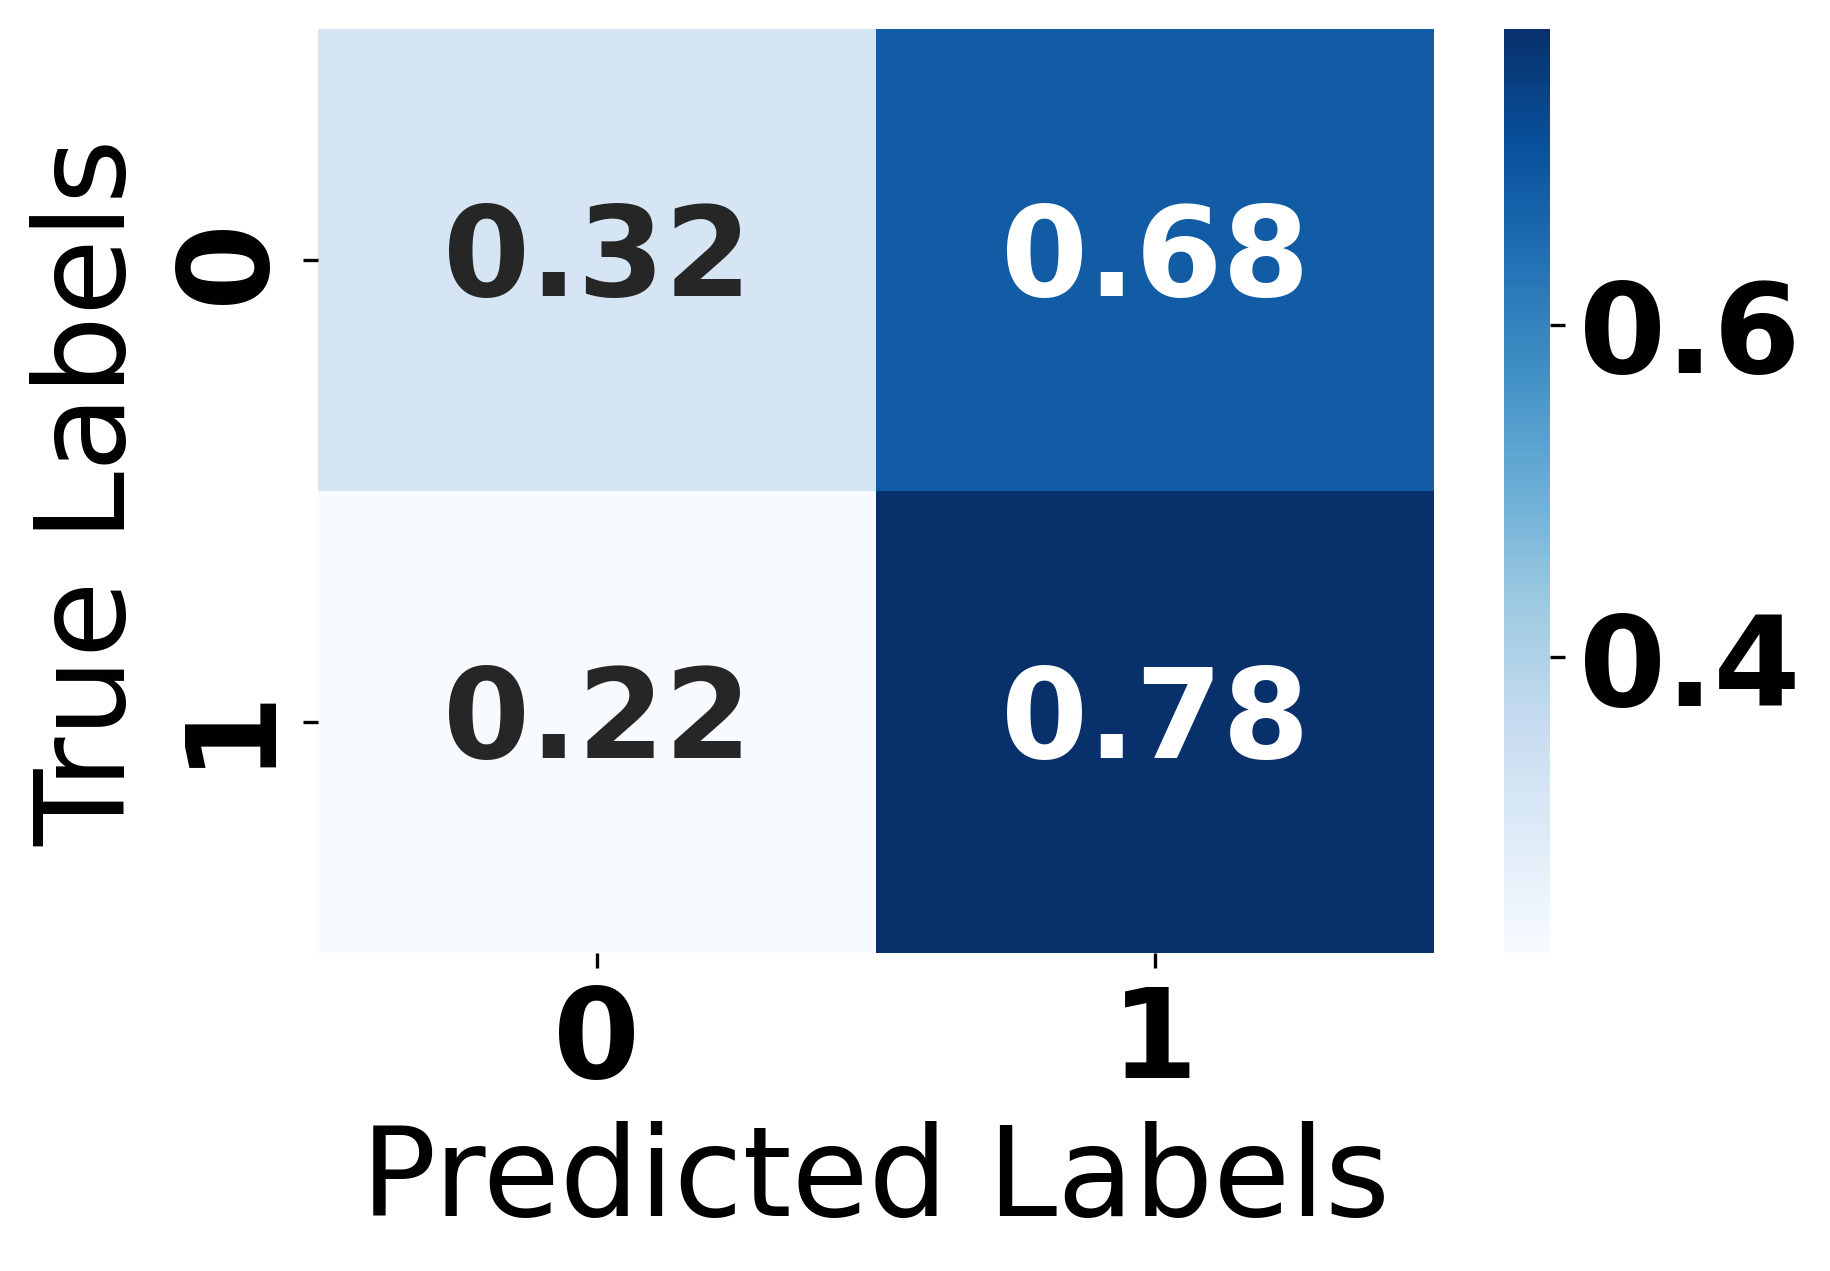

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.5012 - loss: 4854.9375 - val_accuracy: 0.1800 - val_loss: 5668.9004
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5520 - loss: 1187.0621 - val_accuracy: 0.1800 - val_loss: 566.9915
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5520 - loss: 680.0604 - val_accuracy: 0.1800 - val_loss: 1967.0933
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5737 - loss: 678.9843 - val_accuracy: 0.1800 - val_loss: 1342.0408
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6257 - loss: 357.4463 - val_accuracy: 0.8200 - val_loss: 278.4916
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4275 - loss: 763.2941 - val_accuracy: 0.1800 - val_loss: 1284.9355
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5465 - loss: 306.9823 - val_accuracy: 0.1800 - val_loss: 1432.3325
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5737 - loss: 591.8624 - va

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      1.00      0.90        41
     Class 1       0.00      0.00      0.00         9

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


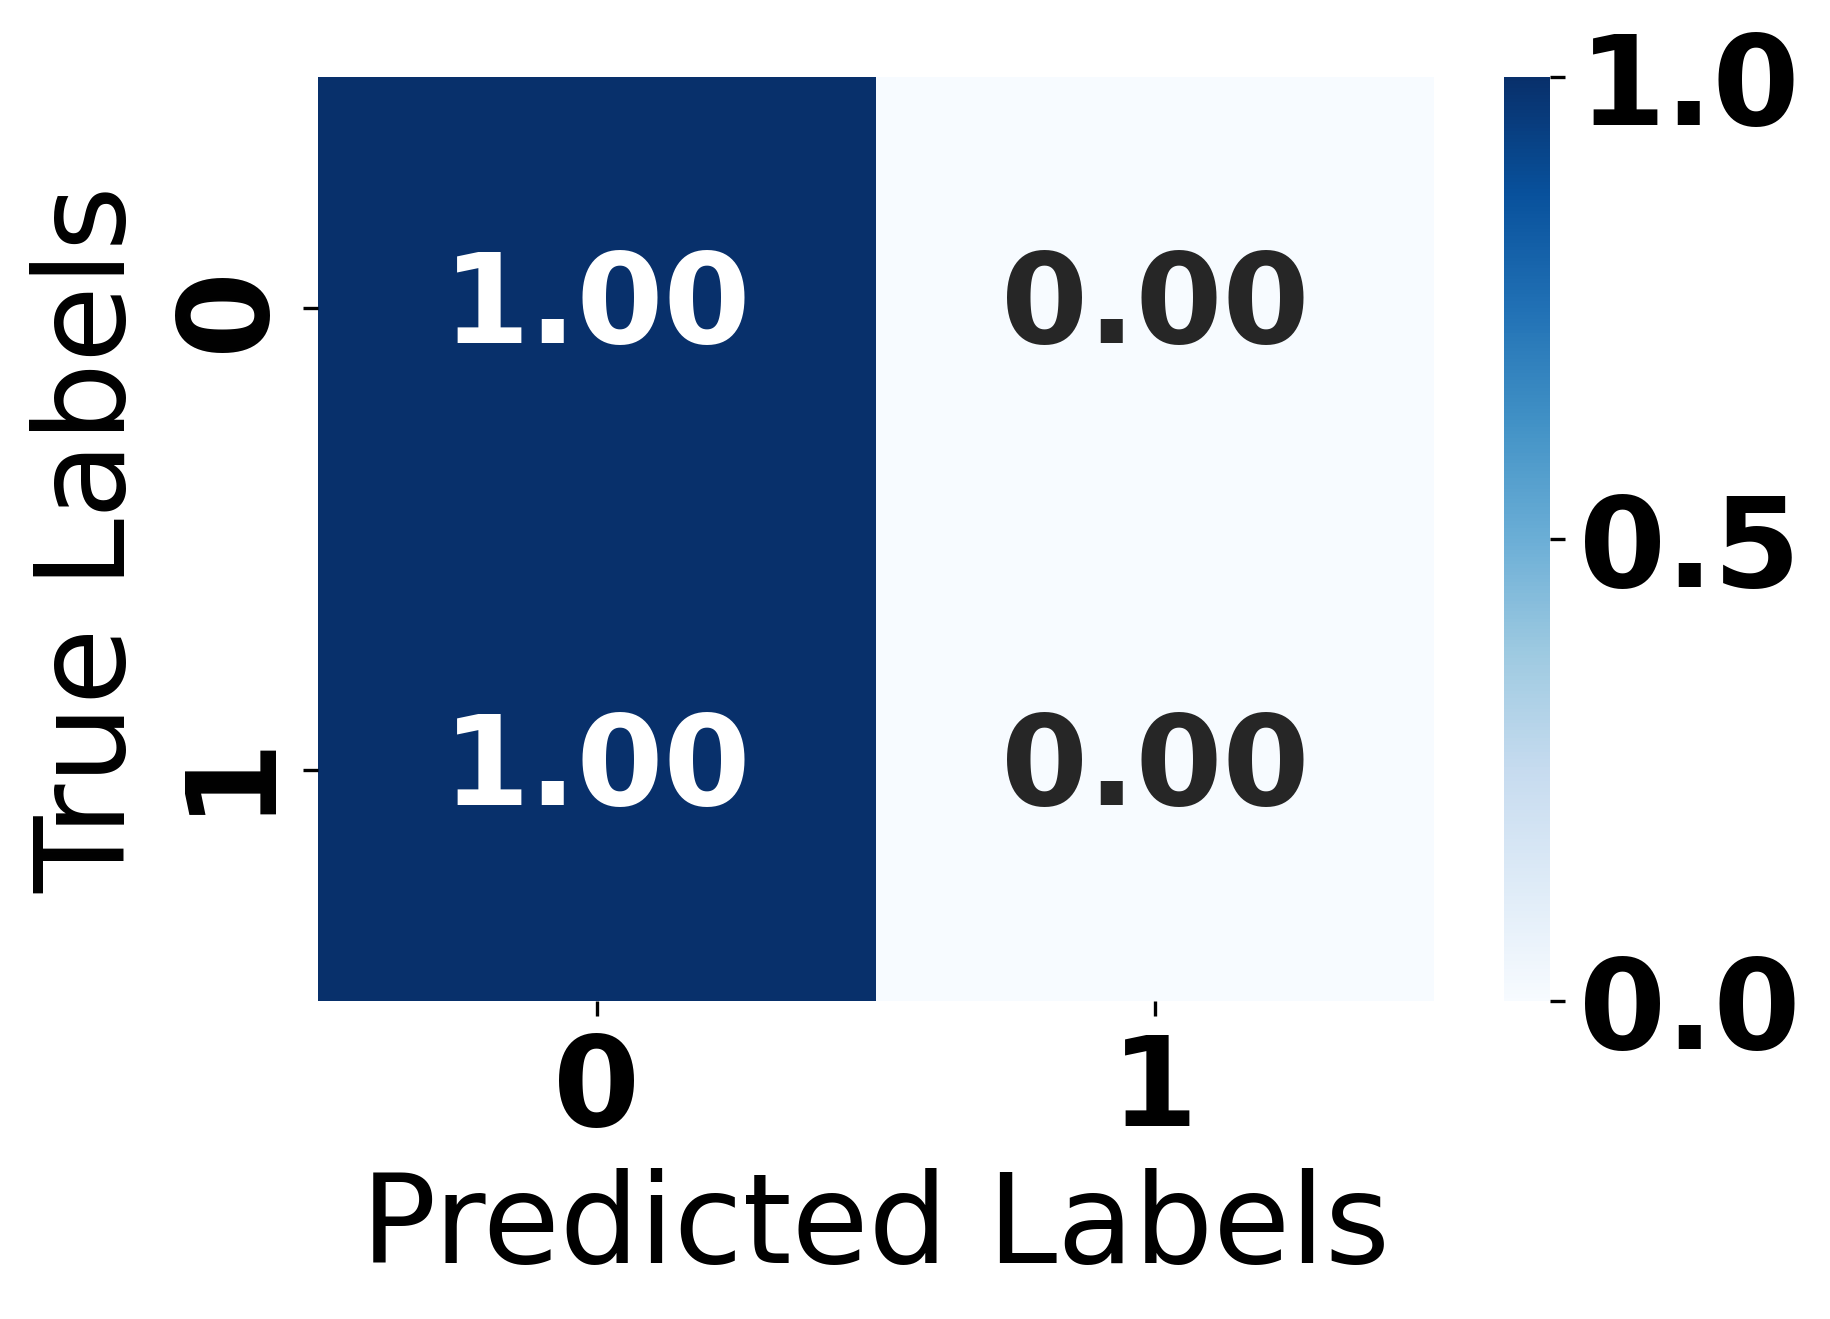

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.5781 - loss: 0.8895 - val_accuracy: 0.8200 - val_loss: 0.9474
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5974 - loss: 0.8365 - val_accuracy: 0.8200 - val_loss: 2.1234
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6318 - loss: 0.7835 - val_accuracy: 0.8200 - val_loss: 2.3423
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6279 - loss: 0.7721 - val_accuracy: 0.8200 - val_loss: 2.1008
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6479 - loss: 0.7454 - val_accuracy: 0.8200 - val_loss: 1.6920
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6324 - loss: 0.7291 - val_accuracy: 0.8200 - val_loss: 1.3670
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6638 - loss: 0.6977 - val_accuracy: 0.8200 - val_loss: 1.2001
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.6767 - loss: 0.7047 - val_accuracy: 0.8200 - val_loss: 1.049

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Normalized Confusion Matrix:
[[0.82926829 0.17073171]
 [0.77777778 0.22222222]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83        41
     Class 1       0.22      0.22      0.22         9

    accuracy                           0.72        50
   macro avg       0.53      0.53      0.53        50
weighted avg       0.72      0.72      0.72        50



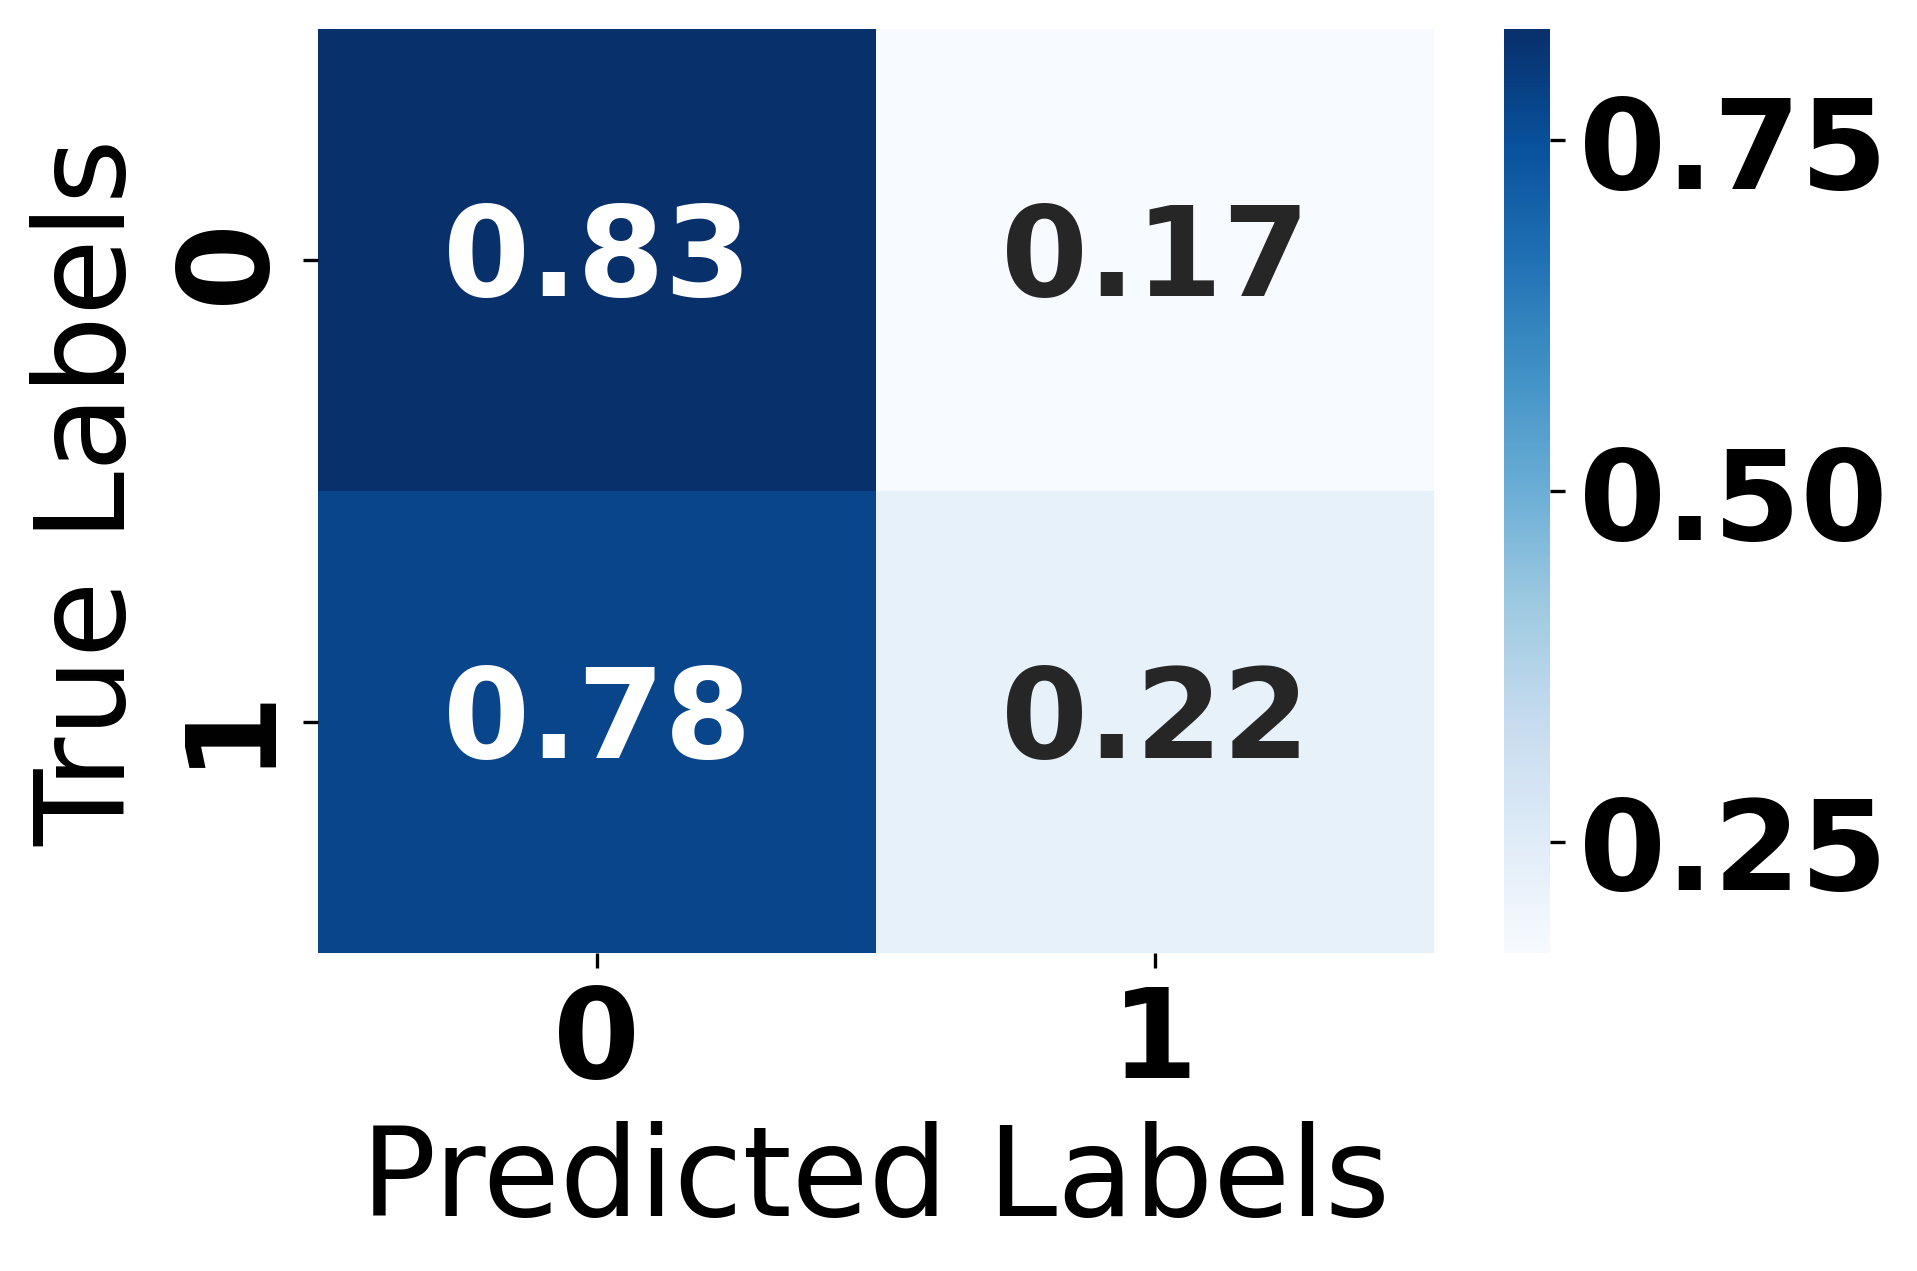

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time

# Define model parameters
vocab_size = 27000  # Increased to accommodate max token index in your data
embed_dim = 128
ff_dim = 128

# Clip tokens to avoid out-of-bound indices
x_train = np.clip(x_train, 0, vocab_size - 1)
x_test = np.clip(x_test, 0, vocab_size - 1)

# Define the input shape
input_shape = (x_train.shape[1],)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    inputs = Input(shape=input_shape)

    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = GlobalAveragePooling1D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
training_time = time.time() - start_time
print("Training Time:", training_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
test_time = time.time() - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step - accuracy: 0.6067 - loss: 0.6662 - val_accuracy: 0.1800 - val_loss: 0.8522
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.6773 - loss: 0.6325 - val_accuracy: 0.1800 - val_loss: 0.9003
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7061 - loss: 0.6073 - val_accuracy: 0.1800 - val_loss: 0.9286
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.6908 - loss: 0.5985 - val_accuracy: 0.1800 - val_loss: 0.9460
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7015 - loss: 0.5855 - val_accuracy: 0.1800 - val_loss: 0.9604
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7066 - loss: 0.5706 - val_accuracy: 0.1800 - val_loss: 0.9624
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7083 - loss: 0.5621 - val_accuracy: 0.1800 - val_loss: 0.9560
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7011 - loss: 0.5595 - val_accuracy: 0.2000 - val_loss: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step
Normalized Confusion Matrix:
[[0.53658537 0.46341463]
 [0.44444444 0.55555556]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.54      0.66        41
     Class 1       0.21      0.56      0.30         9

    accuracy                           0.54        50
   macro avg       0.53      0.55      0.48        50
weighted avg       0.73      0.54      0.59        50



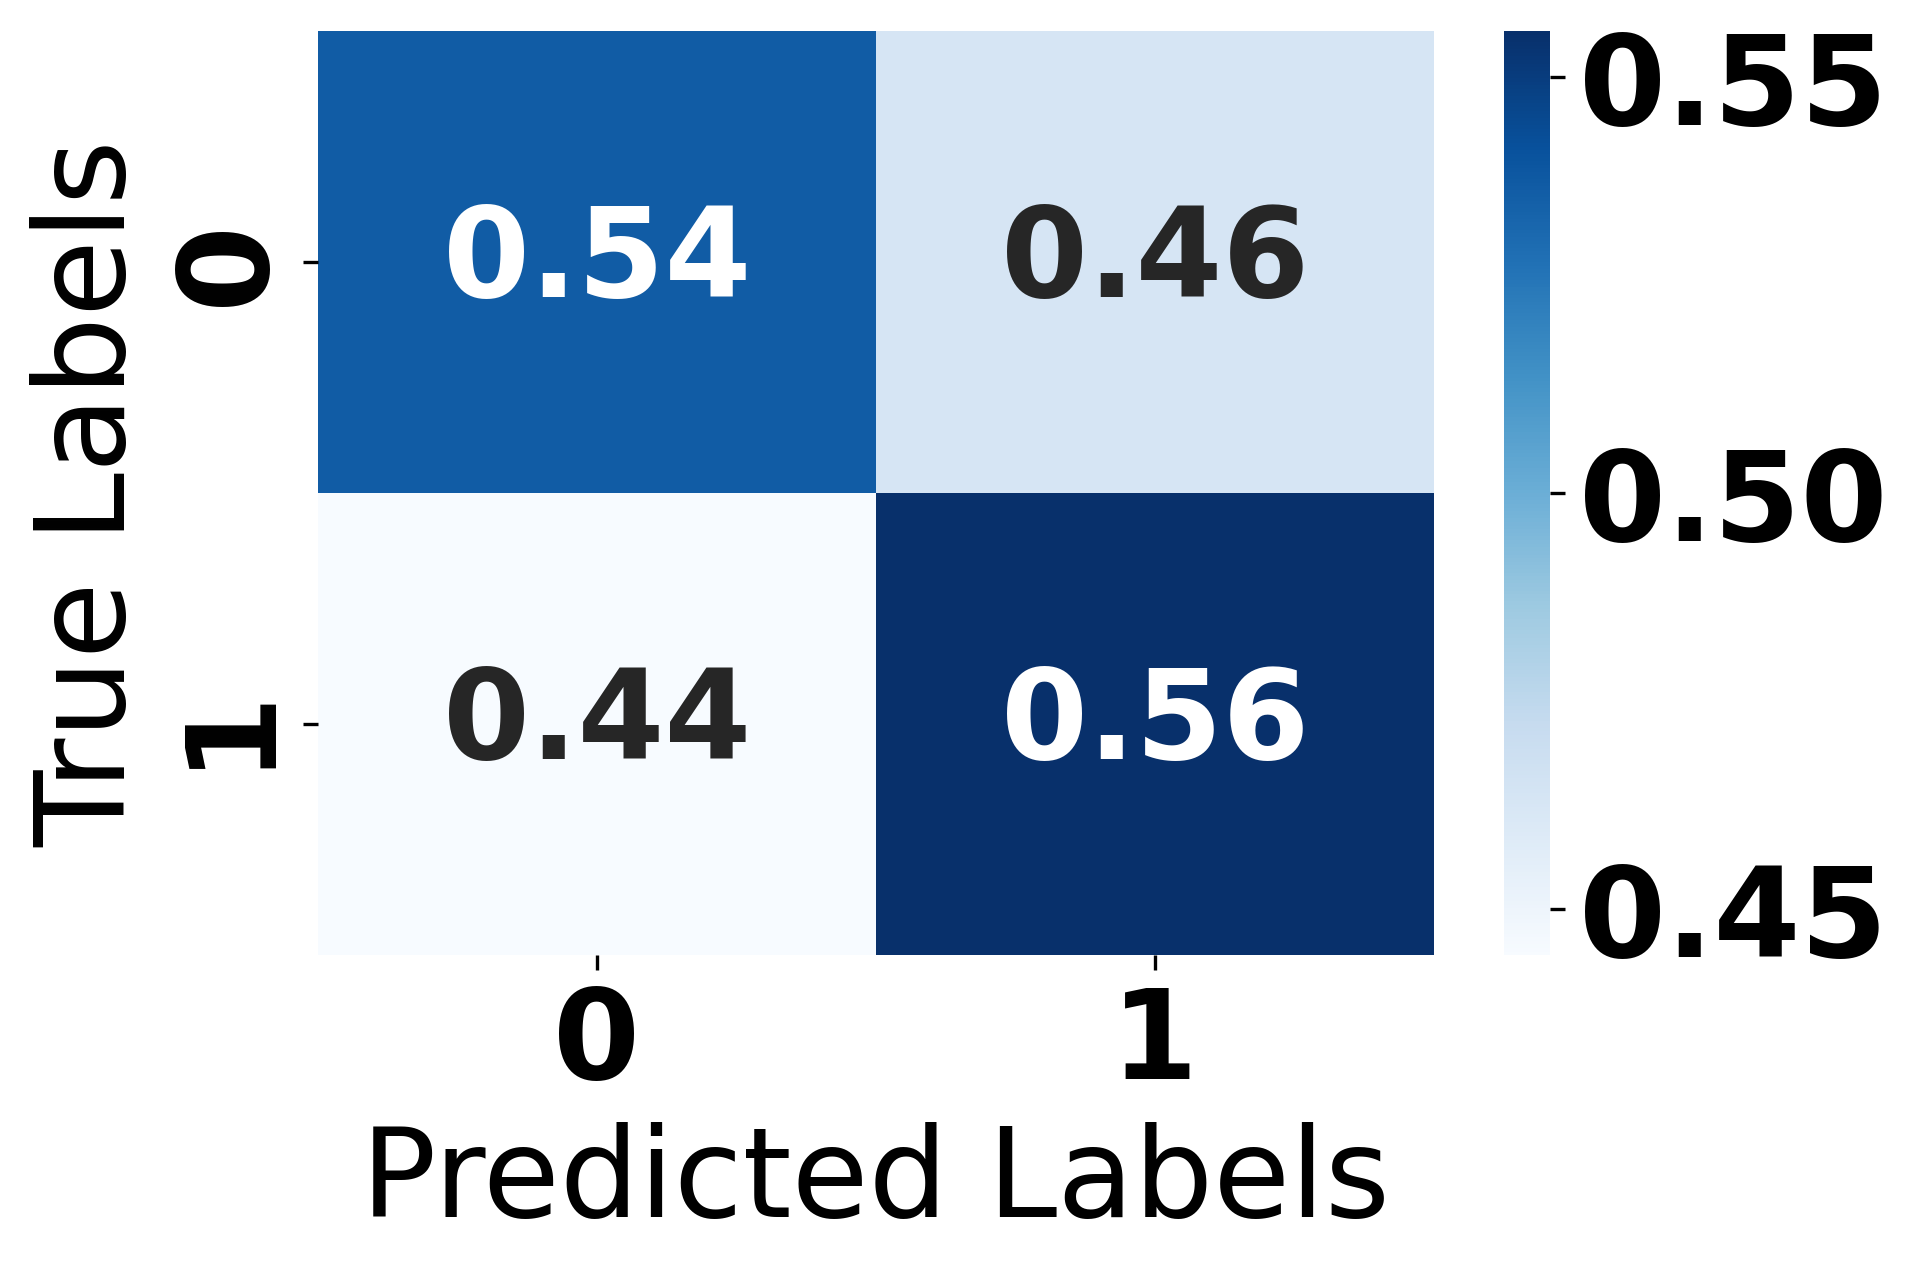

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/TAVE/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=131, training_loss=0.6563334394502276, metrics={'train_runtime': 575.3497, 'train_samples_per_second': 0.911, 'train_steps_per_second': 0.228, 'total_flos': 0.0, 'train_loss': 0.6563334394502276, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.8200    1.0000    0.9011        41
           1     0.0000    0.0000    0.0000         9

    accuracy                         0.8200        50
   macro avg     0.4100    0.5000    0.4505        50
weighted avg     0.6724    0.8200    0.7389        50

Confusion Matrix:
 [[41  0]
 [ 9  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Gaussian Copula (via SDV's CopulaGAN)

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Install latest SDV
!pip install -U sdv

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from collections import Counter

In [ ]:
# Define categorical feature indices (adjust for your dataset)
categorical_features = [1, 2, 5, 6, 8, 10, 11, 12]  # UCI Heart Disease

# Ensure y_train is 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Add target column
x_train['target'] = y_train

# Check class distribution
print("Before GaussianCopula:", Counter(y_train))

# Separate minority class (assuming class 1 is minority)
minority_df = x_train[x_train['target'] == 1]

# Calculate number of synthetic samples needed
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=minority_df)

# Mark categorical columns
for col in x_train.columns[categorical_features]:
    metadata.update_column(column_name=col, sdtype='categorical')
metadata.update_column(column_name='target', sdtype='categorical')

# Initialize synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(minority_df)

# Generate synthetic samples
synthetic_data = synthesizer.sample(num_rows=samples_to_generate)

# Keep only minority samples (if needed)
synthetic_data = synthetic_data[synthetic_data['target'] == 1]

# Split synthetic into X and y
synthetic_x_train = synthetic_data.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_data['target'].reset_index(drop=True)

# Combine with original
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final class distribution
print("After GaussianCopula:", Counter(y_resampled_df))

Before GaussianCopula: Counter({np.int64(0): 162, np.int64(1): 87})


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:126: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


After GaussianCopula: Counter({1: 362, 0: 162})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
60.000    28
50.000    23
65.000    23
70.000    21
45.000    14
          ..
69.561     1
74.389     1
60.838     1
83.632     1
62.884     1
Name: count, Length: 318, dtype: int64

Counts for anaemia:
anaemia
0    279
1    245
Name: count, dtype: int64

Counts for creatinine_phosphokinase:
creatinine_phosphokinase
582     64
68      11
60      11
47       9
66       9
        ..
135      1
103      1
369      1
211      1
1082     1
Name: count, Length: 181, dtype: int64

Counts for diabetes:
diabetes
0    292
1    232
Name: count, dtype: int64

Counts for ejection_fraction:
ejection_fraction
25    45
35    42
30    37
40    36
38    36
20    30
60    25
50    22
45    19
23    15
21    13
19    13
29    12
24    11
18    11
32    10
27    10
34     9
44     8
22     8
43     8
26     7
41     7
37     7
28     6
39     6
42     6
33     6
36     5
46     5
51     5
59     4
62     4
55     4
31     4
54     3
48     3
57     3
15     2
56     2
17     2
70     2


## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

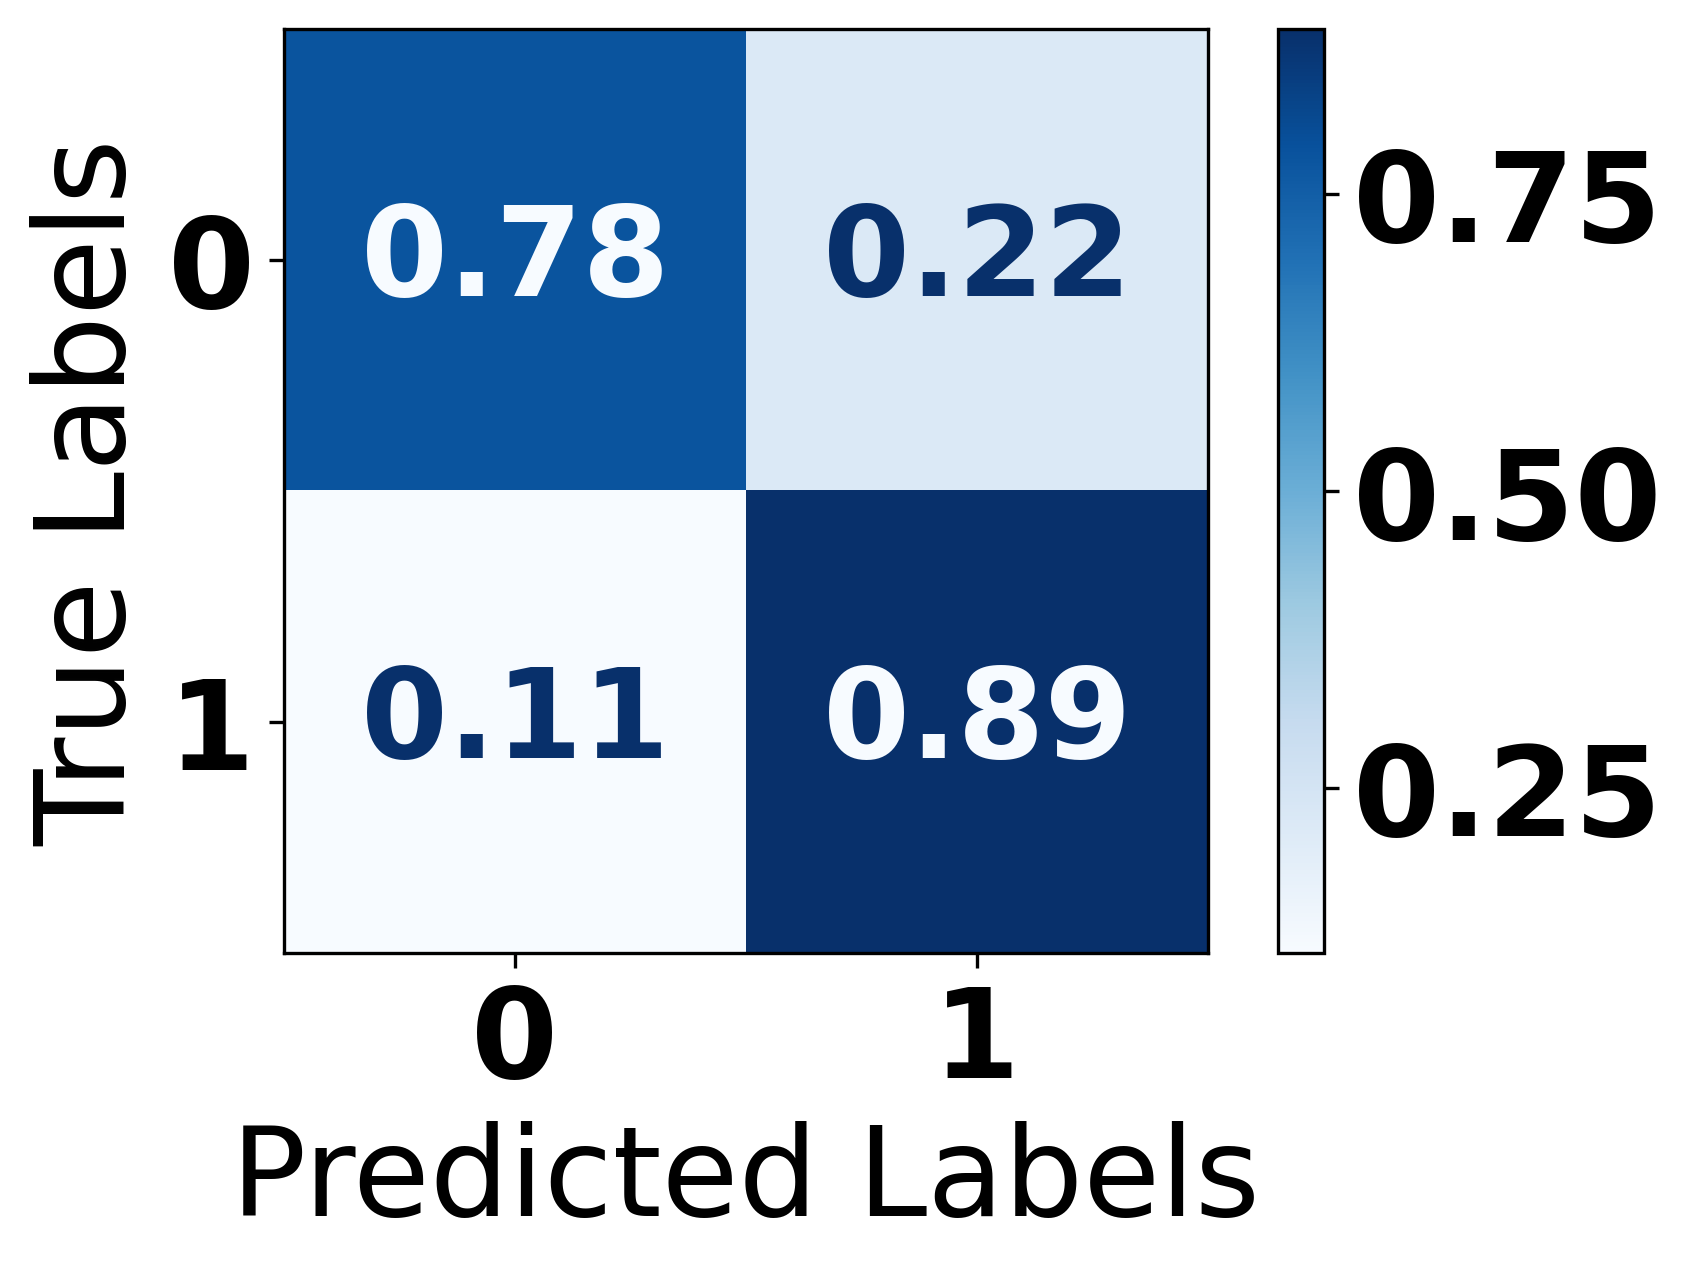

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.78      0.86        41
     Class 1       0.47      0.89      0.62         9

    accuracy                           0.80        50
   macro avg       0.72      0.83      0.74        50
weighted avg       0.88      0.80      0.82        50

Train Accuracy: 1.0
Test Accuracy: 0.8


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib
# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/DT.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


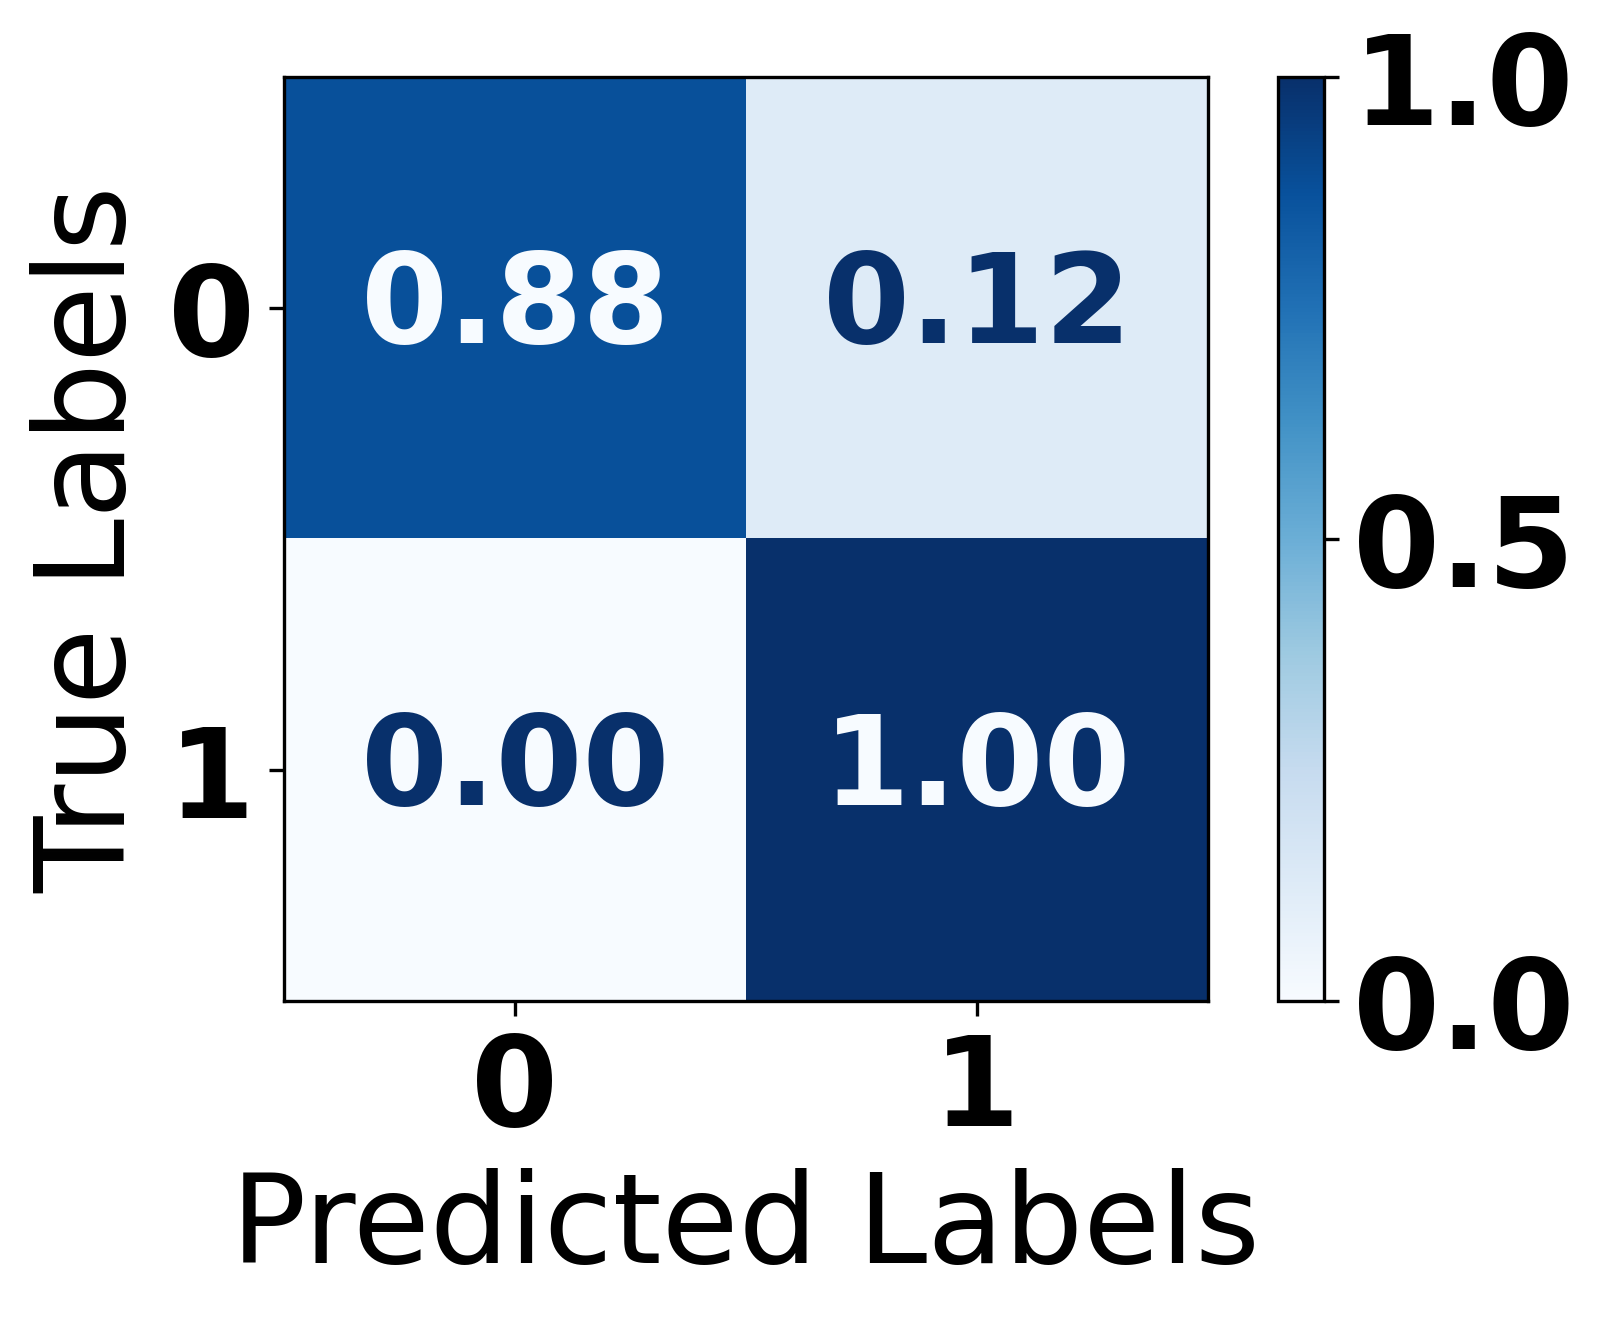

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.94        41
     Class 1       0.64      1.00      0.78         9

    accuracy                           0.90        50
   macro avg       0.82      0.94      0.86        50
weighted avg       0.94      0.90      0.91        50

Train Accuracy: 0.8282442748091603
Test Accuracy: 0.9


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=15, random_state=25)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RUSBoost.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


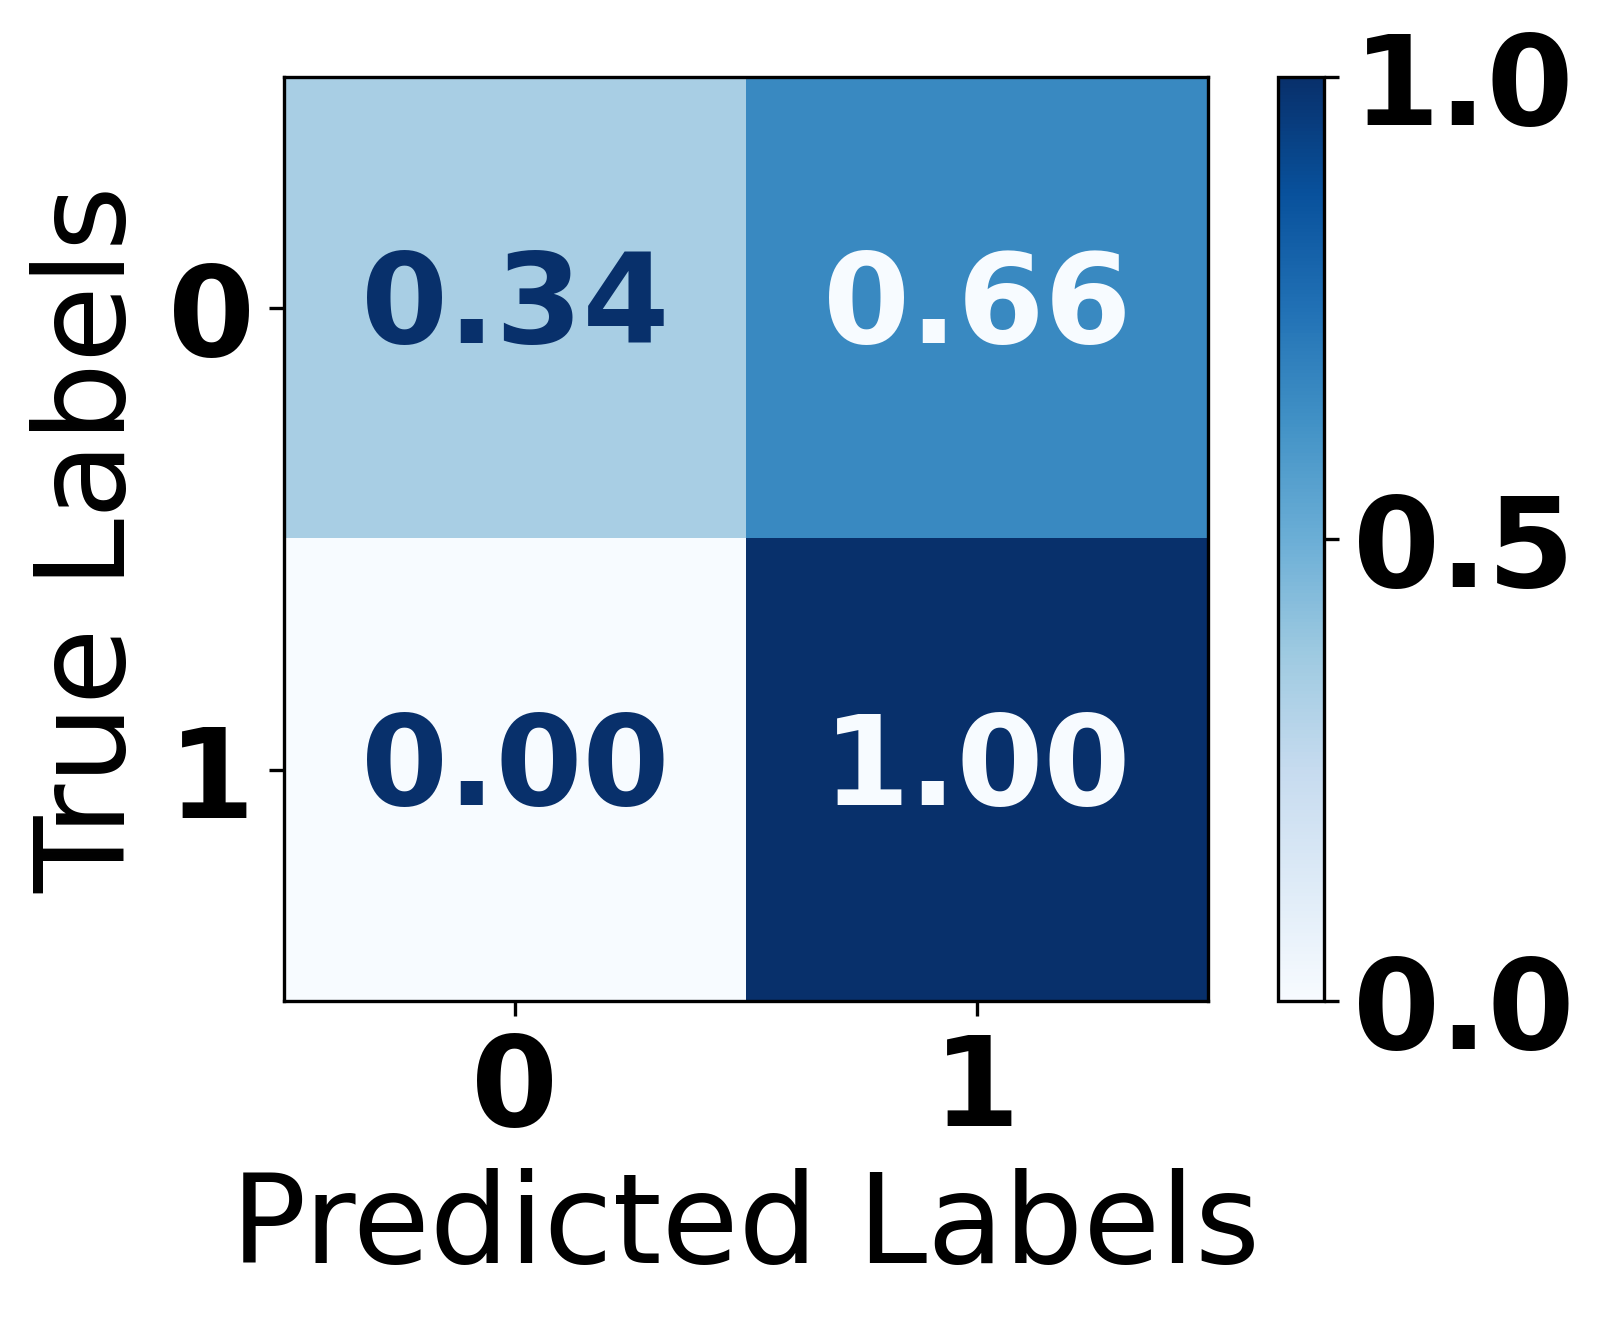

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.34      0.51        41
           1       0.25      1.00      0.40         9

    accuracy                           0.46        50
   macro avg       0.62      0.67      0.45        50
weighted avg       0.86      0.46      0.49        50

Train Accuracy: 0.7690839694656488
Test Accuracy: 0.46


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=1,      # Only one tree
    max_depth=1,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=2, # Require lots of samples to split
    min_samples_leaf=5,  # Each leaf must have many samples
    random_state=5
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/RF.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


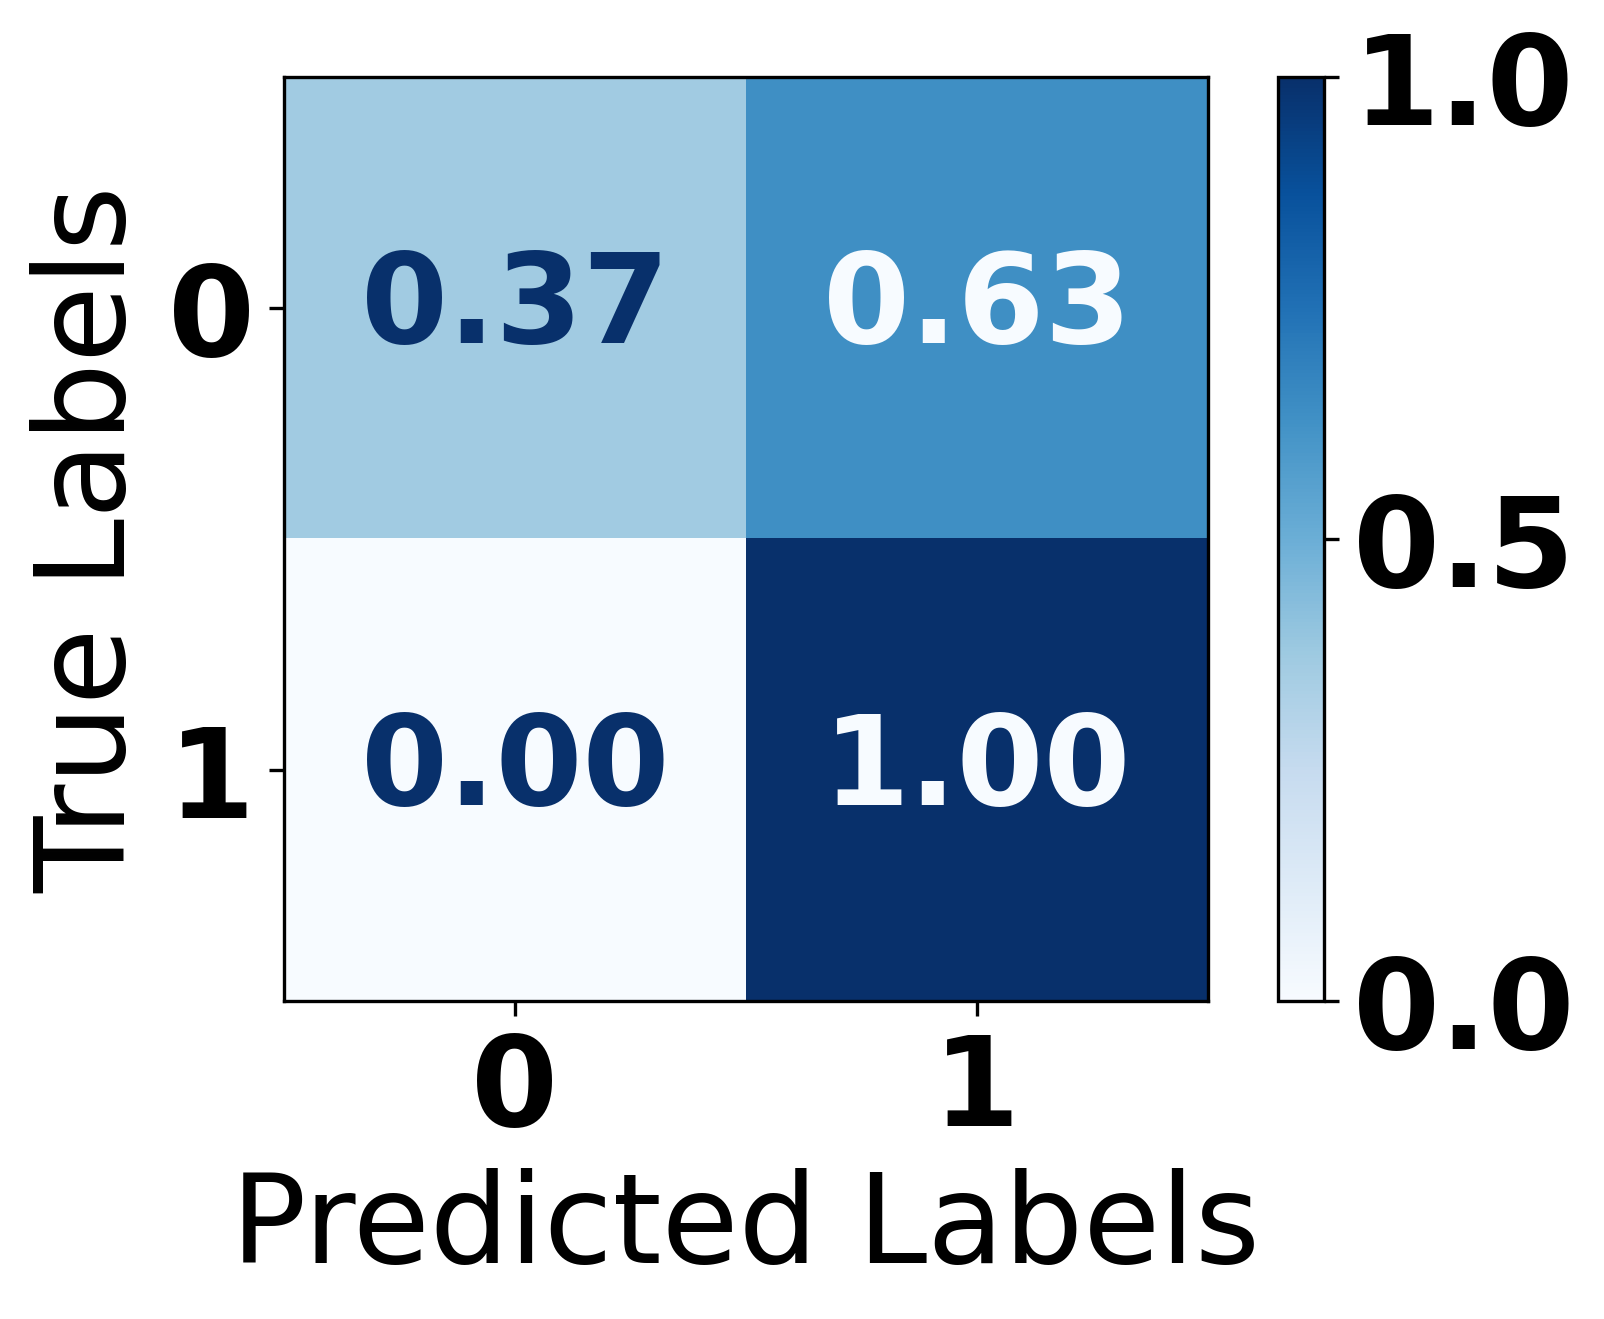

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54        41
           1       0.26      1.00      0.41         9

    accuracy                           0.48        50
   macro avg       0.63      0.68      0.47        50
weighted avg       0.87      0.48      0.51        50

Train Accuracy: 0.7366412213740458
Test Accuracy: 0.48


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.000002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/GNB.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


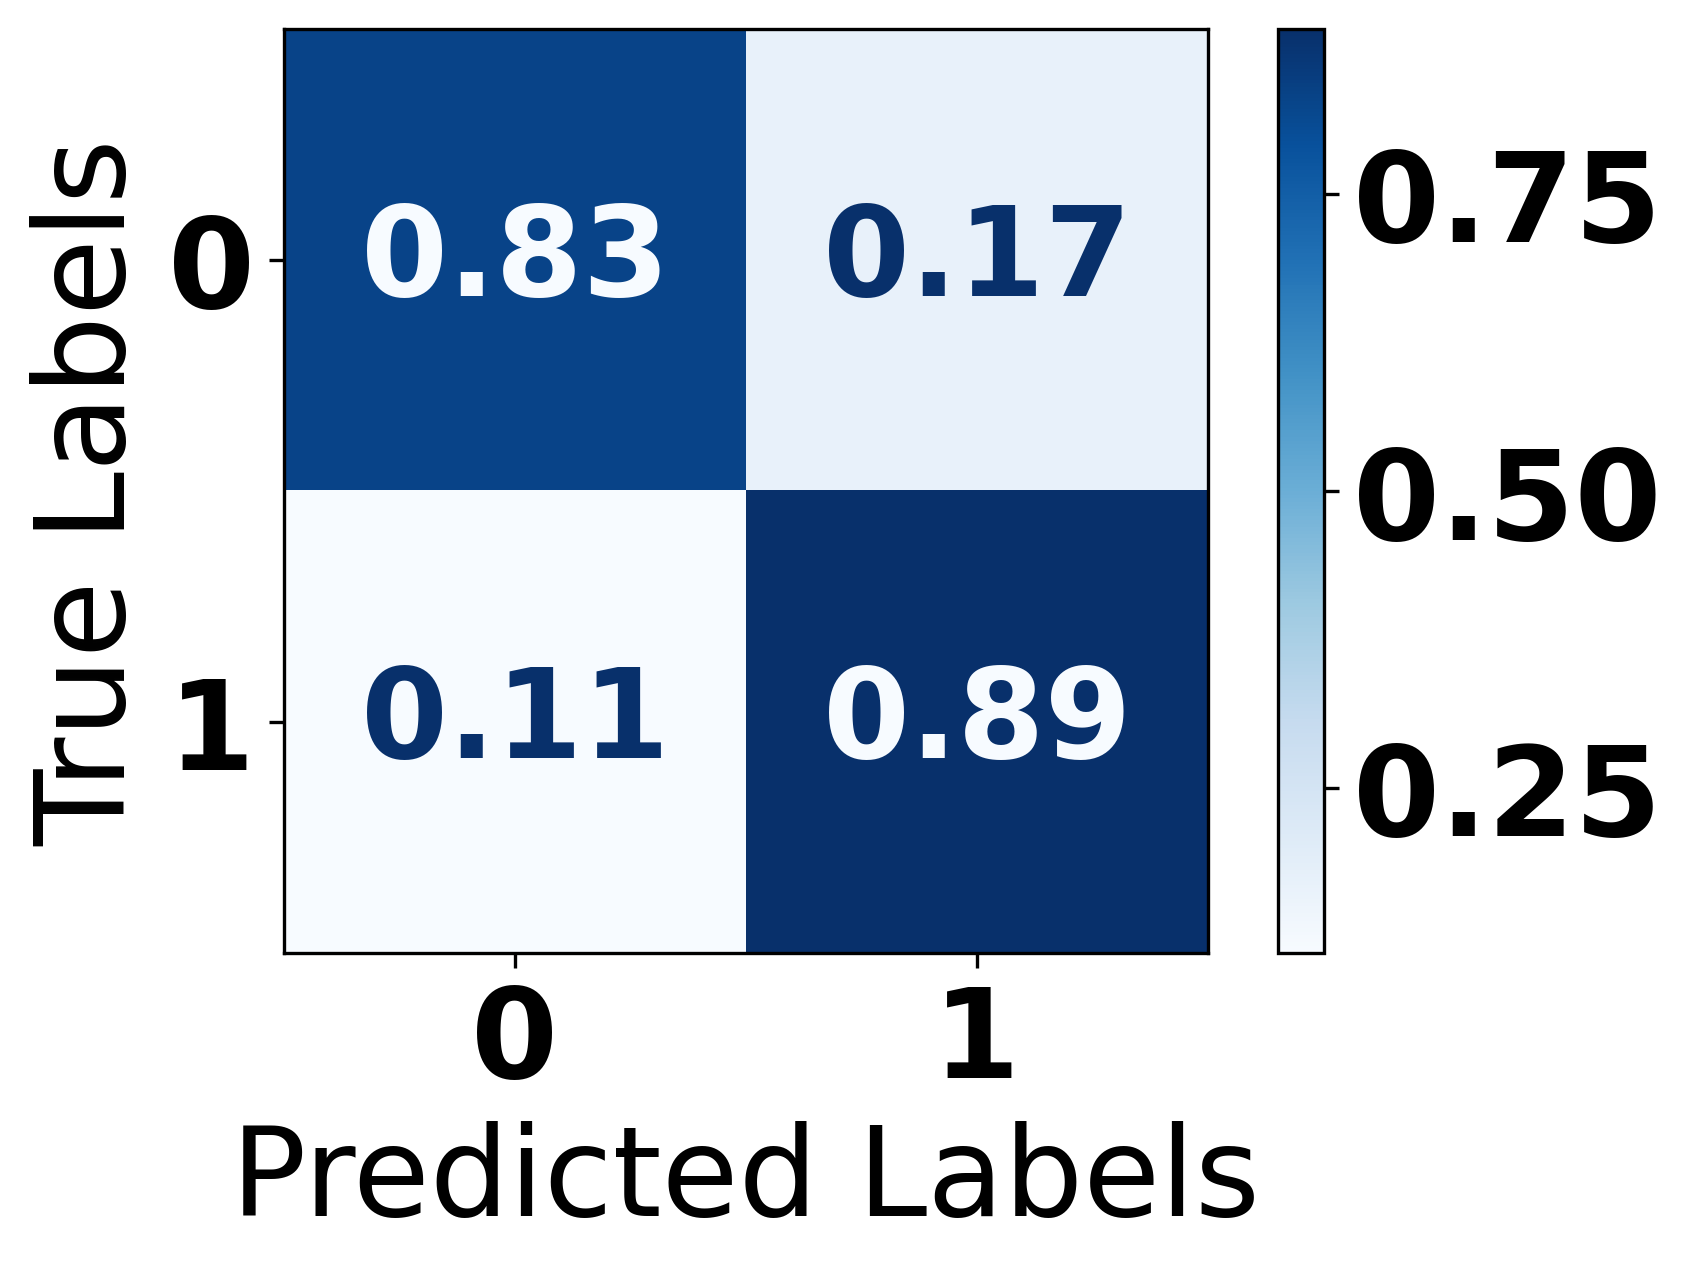

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.53      0.89      0.67         9

    accuracy                           0.84        50
   macro avg       0.75      0.86      0.78        50
weighted avg       0.89      0.84      0.85        50

Train Accuracy: 0.8778625954198473
Test Accuracy: 0.84


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=21, learning_rate=1.5, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=25, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Normalized Confusion Matrix:
[[0.09756098 0.90243902]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.10      0.18        41
     Class 1       0.20      1.00      0.33         9

    accuracy                           0.26        50
   macro avg       0.60      0.55      0.25        50
weighted avg       0.86      0.26      0.20        50



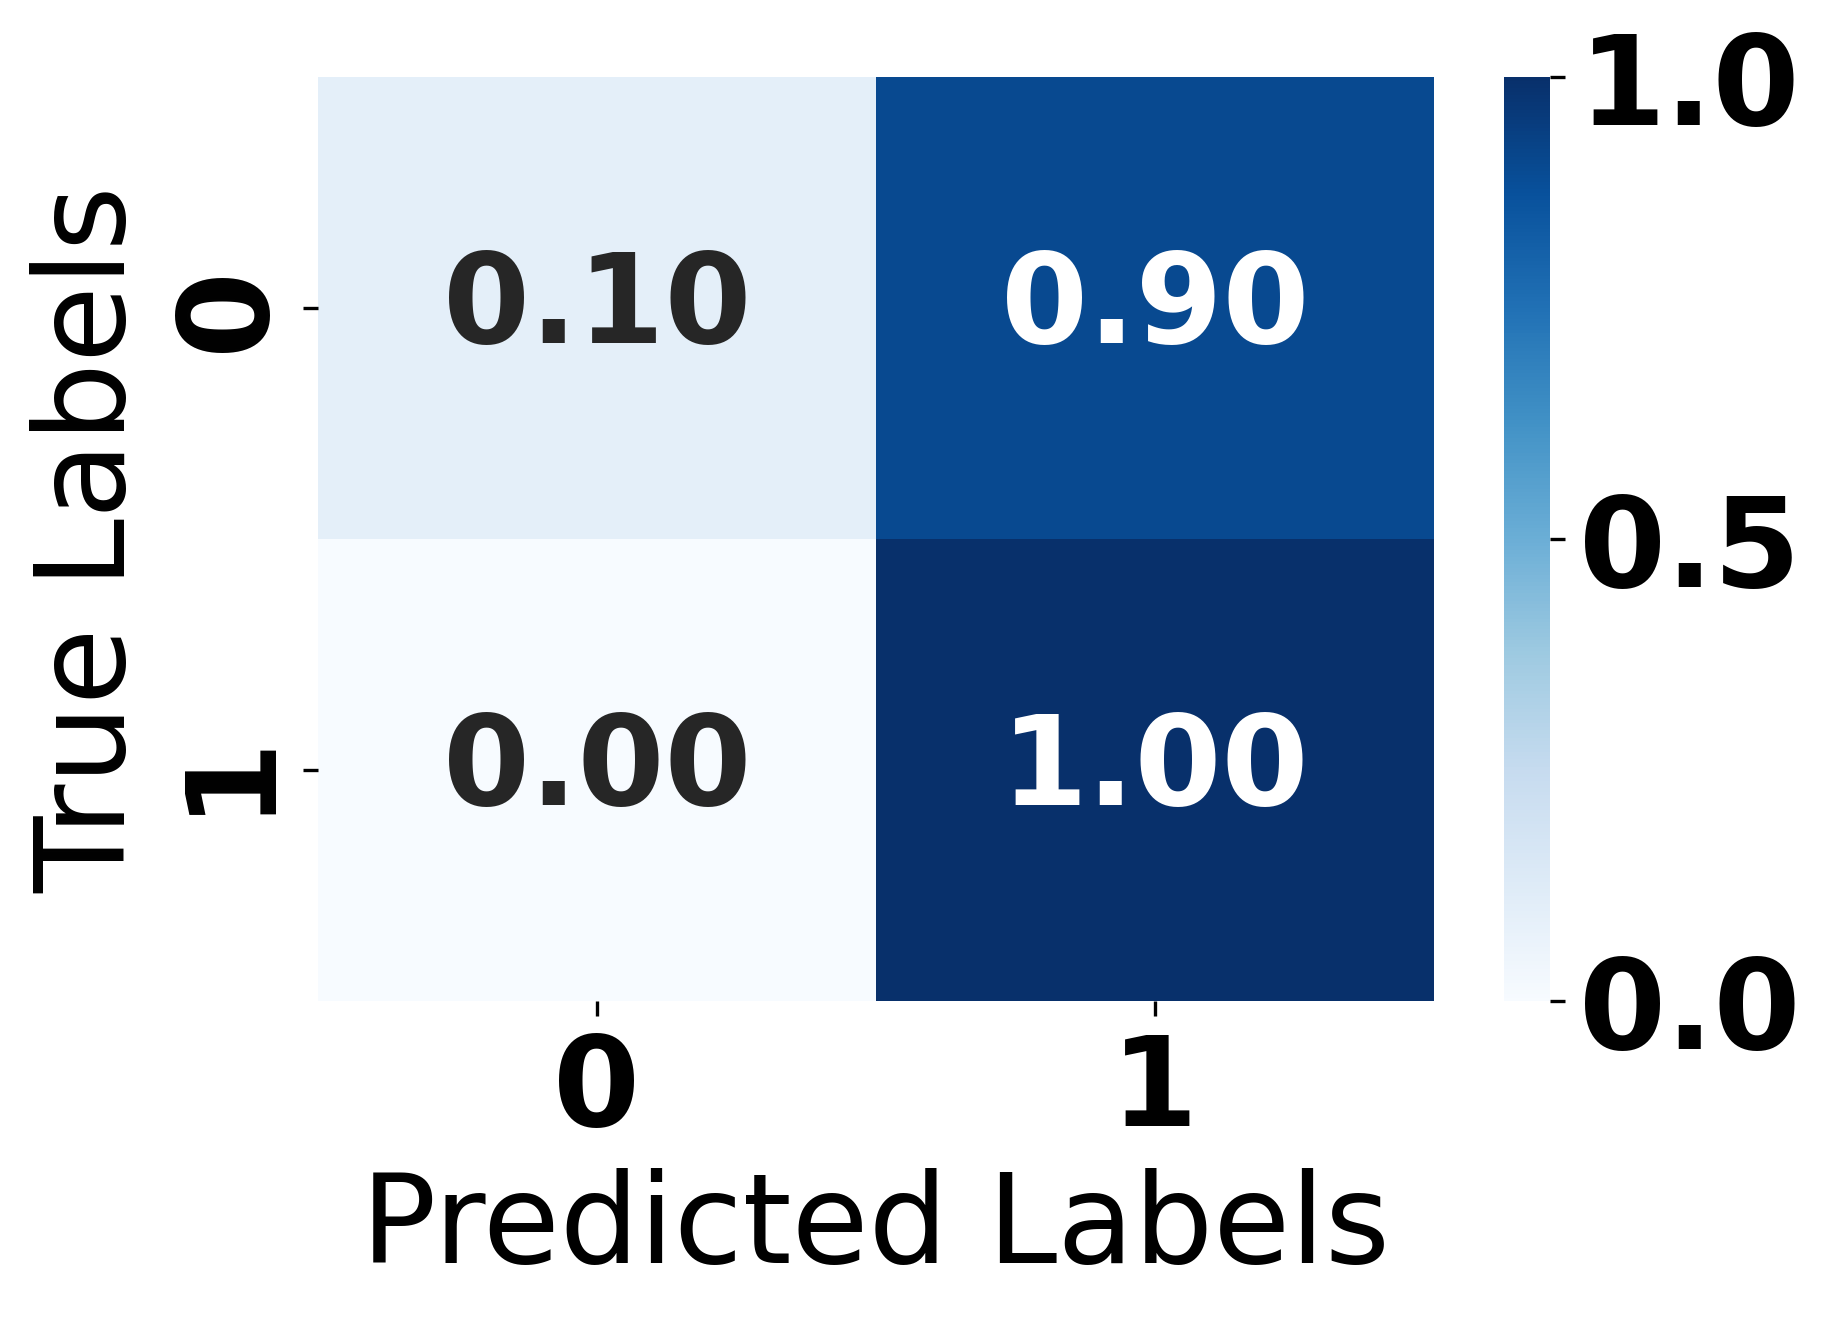

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.5012 - loss: 4985.5830 - val_accuracy: 0.1800 - val_loss: 6871.1875
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5725 - loss: 2695.0894 - val_accuracy: 0.8200 - val_loss: 457.3601
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5012 - loss: 1940.4355 - val_accuracy: 0.1800 - val_loss: 6778.4683
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6422 - loss: 1773.8193 - val_accuracy: 0.8200 - val_loss: 258.1509
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5012 - loss: 806.6443 - val_accuracy: 0.1800 - val_loss: 464.4037
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5001 - loss: 656.8857 - val_accuracy: 0.1800 - val_loss: 2676.4910
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6954 - loss: 1001.1634 - val_accuracy: 0.8200 - val_loss: 331.5918
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3578 - loss: 1149.2251 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        41
     Class 1       0.18      1.00      0.31         9

    accuracy                           0.18        50
   macro avg       0.09      0.50      0.15        50
weighted avg       0.03      0.18      0.05        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


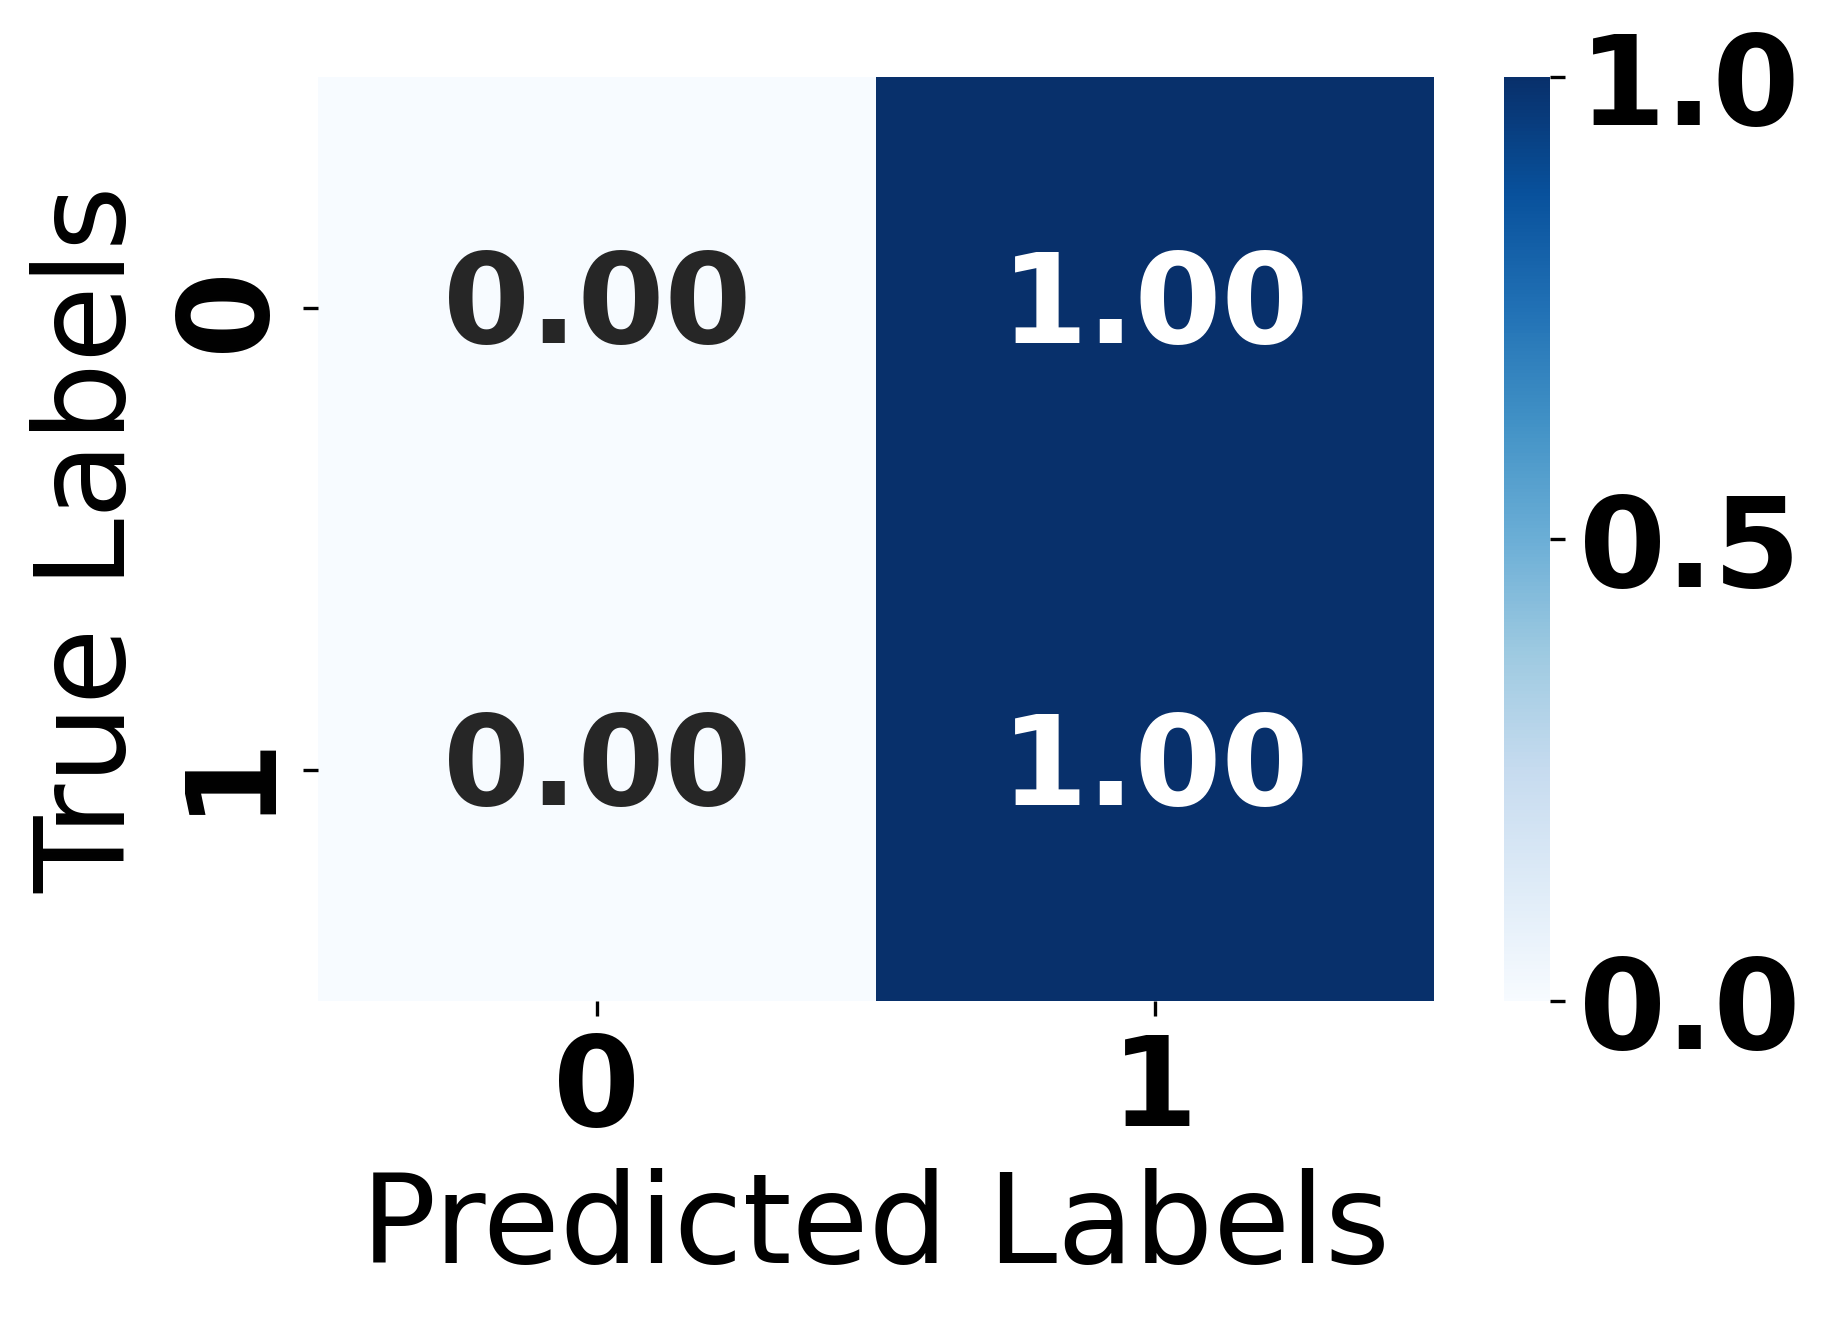

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4906 - loss: 0.9016 - val_accuracy: 0.1800 - val_loss: 7.7556
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4931 - loss: 0.9015 - val_accuracy: 0.1800 - val_loss: 2.7565
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4915 - loss: 0.8446 - val_accuracy: 0.1800 - val_loss: 0.8663
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5237 - loss: 0.8205 - val_accuracy: 0.8200 - val_loss: 0.5723
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5387 - loss: 0.7911 - val_accuracy: 0.8200 - val_loss: 0.5069
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5851 - loss: 0.7206 - val_accuracy: 0.8200 - val_loss: 0.5220
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5232 - loss: 0.8008 - val_accuracy: 0.8200 - val_loss: 0.5509
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5826 - loss: 0.7393 - val_accuracy: 0.8200 - val_loss: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step
Normalized Confusion Matrix:
[[0.58536585 0.41463415]
 [0.55555556 0.44444444]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.59      0.69        41
     Class 1       0.19      0.44      0.27         9

    accuracy                           0.56        50
   macro avg       0.51      0.51      0.48        50
weighted avg       0.71      0.56      0.61        50



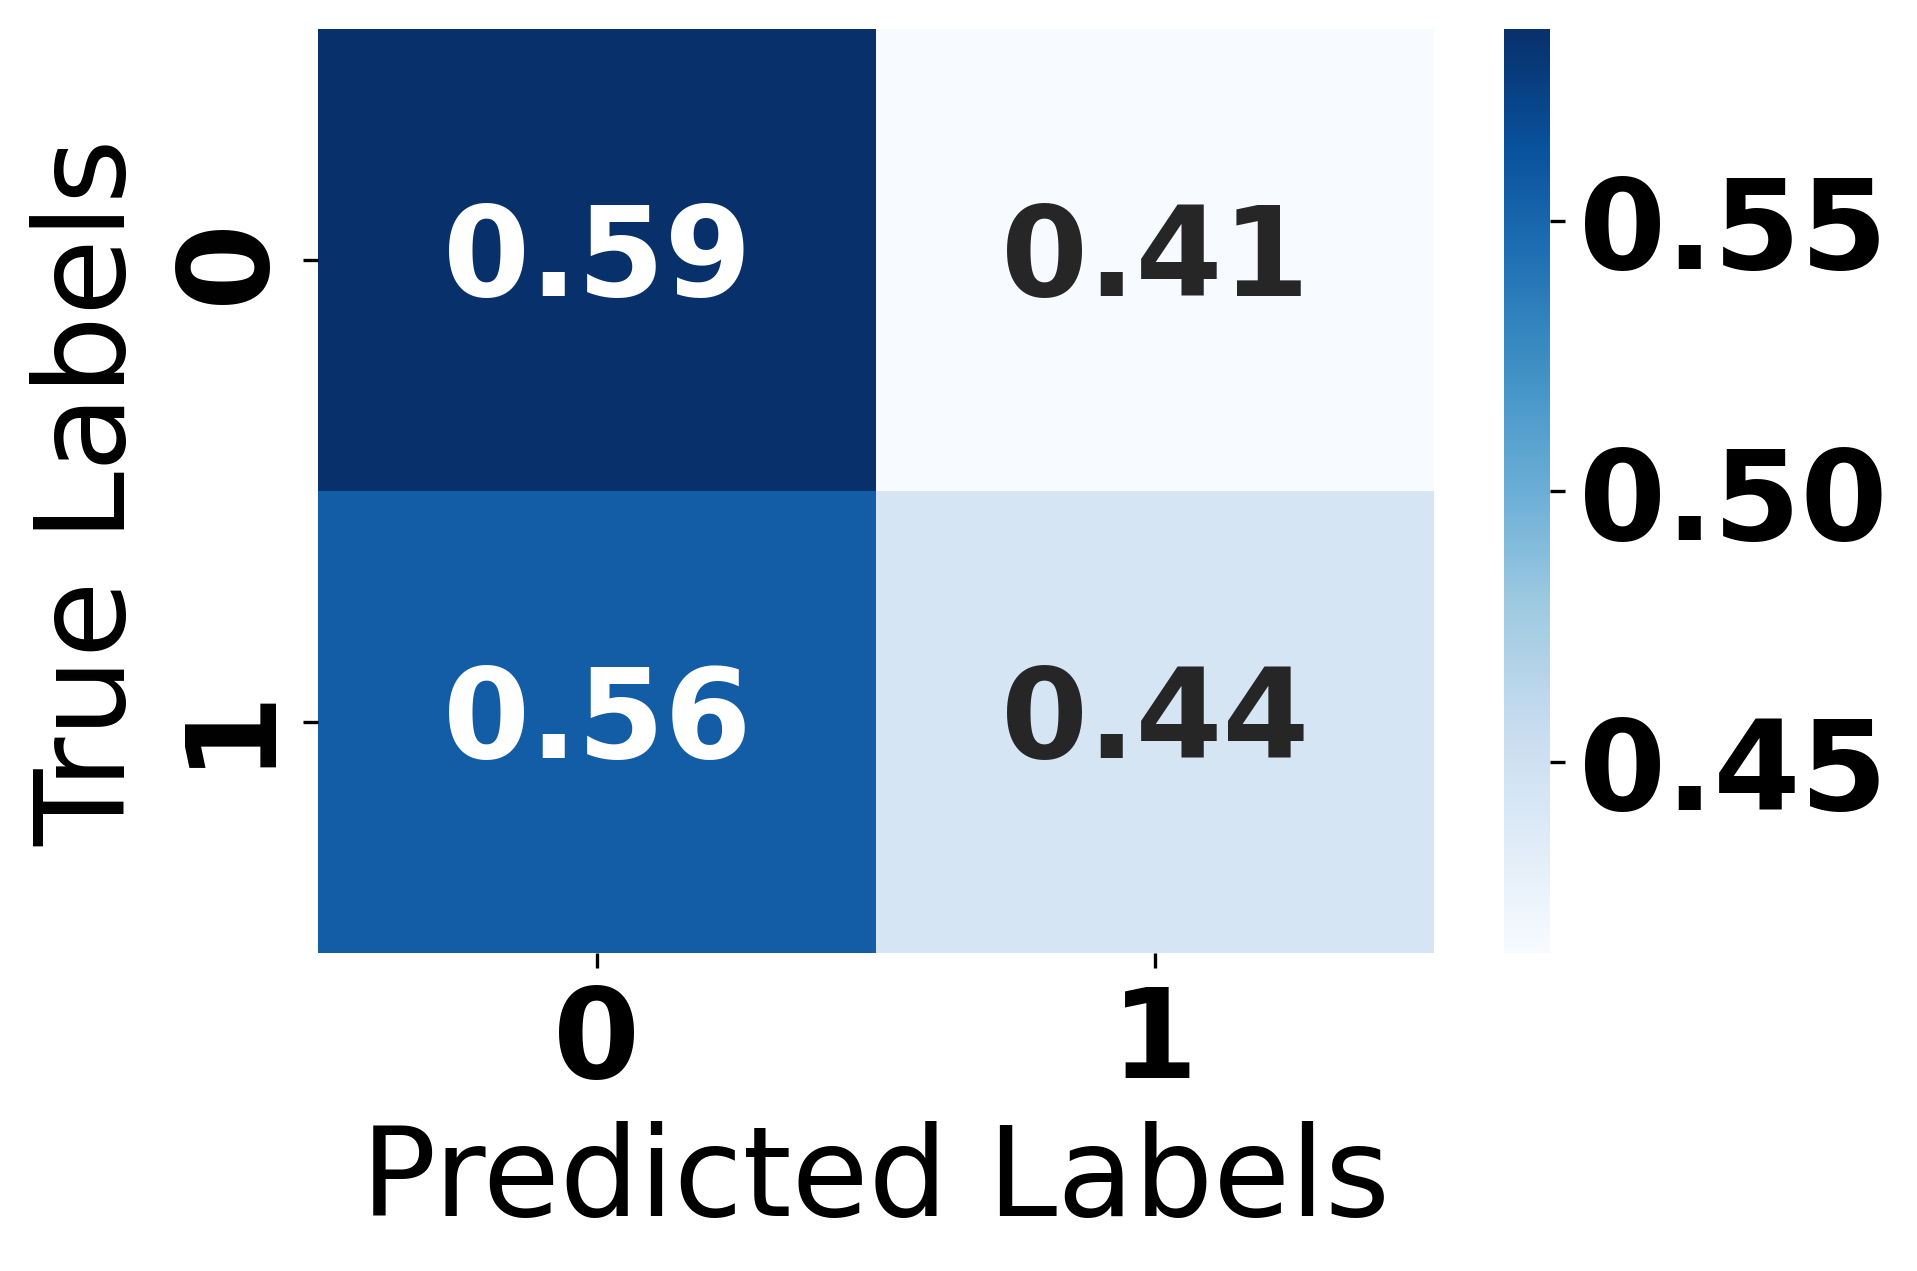

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import time

# Define model parameters
vocab_size = 27000  # Increased to accommodate max token index in your data
embed_dim = 128
ff_dim = 128

# Clip tokens to avoid out-of-bound indices
x_train = np.clip(x_train, 0, vocab_size - 1)
x_test = np.clip(x_test, 0, vocab_size - 1)

# Define the input shape
input_shape = (x_train.shape[1],)

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    inputs = Input(shape=input_shape)

    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    x = GlobalAveragePooling1D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
start_time = time.time()
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
training_time = time.time() - start_time
print("Training Time:", training_time)

# Evaluate the model
start_time = time.time()
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)
test_time = time.time() - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.6017 - loss: 0.6716 - val_accuracy: 0.1800 - val_loss: 0.8466
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6611 - loss: 0.6500 - val_accuracy: 0.1800 - val_loss: 0.8961
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6982 - loss: 0.6291 - val_accuracy: 0.1800 - val_loss: 0.9296
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6819 - loss: 0.6234 - val_accuracy: 0.1800 - val_loss: 0.9550
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6878 - loss: 0.6167 - val_accuracy: 0.1800 - val_loss: 0.9774
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7041 - loss: 0.6000 - val_accuracy: 0.1800 - val_loss: 0.9880
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6951 - loss: 0.5995 - val_accuracy: 0.1800 - val_loss: 0.9896
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6883 - loss: 0.5972 - val_accuracy: 0.1800 - val_loss: 0.9851

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
Normalized Confusion Matrix:
[[0.34146341 0.65853659]
 [0.44444444 0.55555556]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.34      0.47        41
     Class 1       0.16      0.56      0.24         9

    accuracy                           0.38        50
   macro avg       0.47      0.45      0.36        50
weighted avg       0.67      0.38      0.43        50



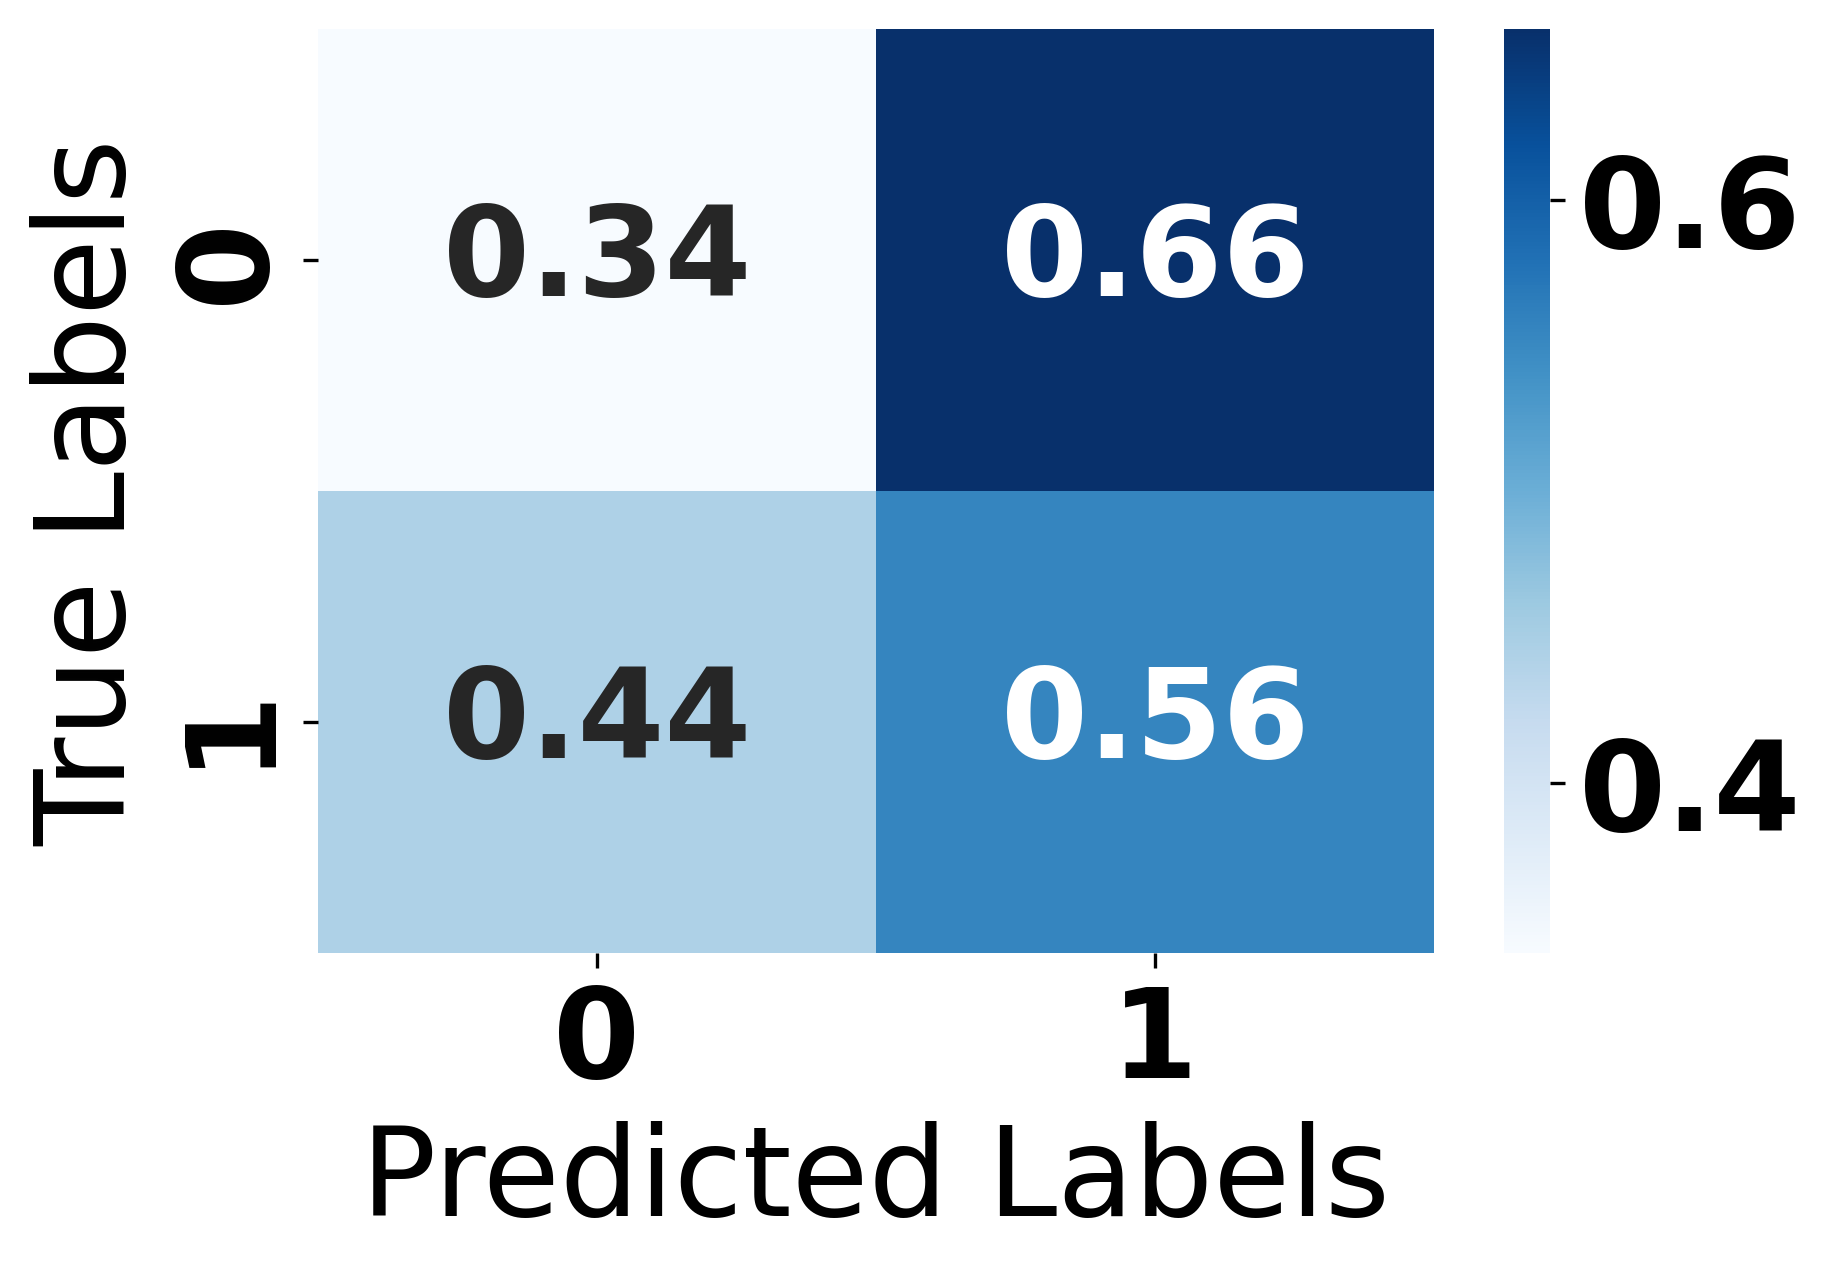

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/HeartFailureGPT/Table/GC/Model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=5,
    save_steps=10,
    eval_steps=10,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,
    gradient_accumulation_steps=2,
    fp16=torch.cuda.is_available()
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

TrainOutput(global_step=131, training_loss=0.812408838563293, metrics={'train_runtime': 525.6247, 'train_samples_per_second': 0.997, 'train_steps_per_second': 0.249, 'total_flos': 0.0, 'train_loss': 0.812408838563293, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9375    0.7317    0.8219        41
           1     0.3889    0.7778    0.5185         9

    accuracy                         0.7400        50
   macro avg     0.6632    0.7547    0.6702        50
weighted avg     0.8387    0.7400    0.7673        50

Confusion Matrix:
 [[30 11]
 [ 2  7]]
